# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [ ]:
# Import the libraries you will be using for analysis



In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

In [ ]:
try:
    df = pd.read_parquet('2023-1.parquet')
except ArrowInvalid as e:
    print(f"Error reading file '2023-1.parquet': {e}")
    # Handle the error, e.g., skip the file or try to repair it

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

In [ ]:
from google.colab import drive
drive.unmount('/content/drive')

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('Drive unmounted')

Drive unmounted


**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/sample_data/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm  # For progress tracking

os.chdir('/content/sample_data/trip_records')
file_list = [f for f in os.listdir() if f.endswith('.parquet')]
sample_fraction = 0.01
all_samples = []

# Use tqdm for progress tracking
for file_name in tqdm(file_list, desc="Processing files"):
    try:
        print(f"Processing {file_name}...")

        # Read in chunks to reduce memory pressure
        monthly_df = pd.read_parquet(file_name)

        if 'tpep_pickup_datetime' in monthly_df.columns:
            # Extract datetime components
            monthly_df['date'] = monthly_df['tpep_pickup_datetime'].dt.date
            monthly_df['hour'] = monthly_df['tpep_pickup_datetime'].dt.hour

            # Group by date and hour
            grouped = monthly_df.groupby(['date', 'hour'])

            # Method 1: Apply sampling with include_groups=False to fix deprecation warning
            sampled_data = grouped.apply(
                lambda x: x.sample(frac=sample_fraction, random_state=42)
                if len(x) > 0 else x,
                include_groups=False  # Fix for deprecation warning
            ).reset_index(drop=True)

            # Alternative Method 2: Use a list comprehension approach instead of apply
            # groups = []
            # for name, group in grouped:
            #     if not group.empty:
            #         sampled = group.sample(frac=sample_fraction, random_state=42)
            #         groups.append(sampled)
            # sampled_data = pd.concat(groups, ignore_index=True) if groups else pd.DataFrame()

            # Drop temporary columns
            if not sampled_data.empty and 'date' in sampled_data.columns:
                sampled_data = sampled_data.drop(['date', 'hour'], axis=1)

            all_samples.append(sampled_data)

            # Free up memory
            del monthly_df, sampled_data
            import gc
            gc.collect()  # Force garbage collection

        else:
            print(f"Column 'tpep_pickup_datetime' not found in {file_name}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Combine all samples at once
if all_samples:
    df = pd.concat(all_samples, ignore_index=True)
    print("Sampling completed. Total rows in df:", len(df))
else:
    print("No data was processed successfully.")

Processing files:   0%|          | 0/12 [00:00<?, ?it/s]

Processing 2023-6.parquet...
Processing 2023-11.parquet...
Processing 2023-10.parquet...
Processing 2023-4.parquet...
Processing 2023-8.parquet...
Processing 2023-5.parquet...
Processing 2023-1.parquet...
Processing 2023-7.parquet...
Processing 2023-12.parquet...
Processing 2023-9.parquet...
Processing 2023-3.parquet...
Processing 2023-2.parquet...
Sampling completed. Total rows in df: 379268


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
import os
import pandas as pd

# Assuming 'df' is your existing combined DataFrame
# If df has more than 300,000 rows, sample it down
target_size = 275000  # Target size (midpoint of 250k-300k range)

if len(df) > 300000:
    df = df.sample(n=target_size, random_state=42)
elif len(df) < 250000:
    print(f"Warning: DataFrame only has {len(df)} rows, which is below the target range.")

# Create output directory if it doesn't exist
output_dir = '/content/sample_data/processed_data'
os.makedirs(output_dir, exist_ok=True)

# Save as parquet (efficient storage and faster to read)
parquet_path = os.path.join(output_dir, 'taxi_sample.parquet')
df.to_parquet(parquet_path, index=False)
print(f"Data saved as Parquet to: {parquet_path}")

# Save as CSV (more universally compatible)
csv_path = os.path.join(output_dir, 'taxi_sample.csv')
df.to_csv(csv_path, index=False)
print(f"Data saved as CSV to: {csv_path}")

print(f"Final dataset contains {len(df)} rows")

Data saved as Parquet to: /content/sample_data/processed_data/taxi_sample.parquet
Data saved as CSV to: /content/sample_data/processed_data/taxi_sample.csv
Final dataset contains 275000 rows


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
306805,1,2023-09-25 18:44:03,2023-09-25 19:05:40,1.0,3.40,1.0,N,164,79,1,21.2,5.0,0.5,5.50,0.0,1.0,33.20,2.5,0.0,NaN
44548,2,2023-11-11 00:26:17,2023-11-11 00:52:18,1.0,2.76,1.0,N,211,256,1,22.6,1.0,0.5,2.00,0.0,1.0,29.60,2.5,0.0,NaN
95813,2,2023-10-27 19:37:42,2023-10-27 20:01:57,1.0,3.44,1.0,N,161,151,1,24.0,2.5,0.5,4.58,0.0,1.0,35.08,2.5,0.0,NaN
302814,2,2023-09-18 11:53:40,2023-09-18 12:07:13,6.0,0.36,1.0,N,141,229,1,12.1,0.0,0.5,3.22,0.0,1.0,19.32,2.5,0.0,NaN
74375,1,2023-10-08 23:54:36,2023-10-09 00:07:44,1.0,3.40,1.0,N,186,140,1,16.3,3.5,0.5,4.26,0.0,1.0,25.56,2.5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274661,2,2023-12-20 07:22:22,2023-12-20 07:27:19,1.0,1.24,1.0,N,236,163,1,7.9,0.0,0.5,2.38,0.0,1.0,14.28,2.5,0.0,NaN
34616,2,2023-11-02 18:16:46,2023-11-02 18:39:28,1.0,5.94,1.0,N,116,246,2,27.5,2.5,0.5,0.00,0.0,1.0,34.00,2.5,0.0,NaN
281723,2,2023-12-28 14:01:38,2023-12-28 14:09:17,4.0,0.70,1.0,N,100,100,1,8.6,0.0,0.5,1.00,0.0,1.0,13.60,2.5,0.0,NaN
164751,2,2023-02-08 15:59:50,2023-02-08 16:25:57,1.0,3.05,1.0,N,142,170,1,23.3,2.5,0.5,5.96,0.0,1.0,35.76,2.5,0.0,NaN


In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
306805,1,2023-09-25 18:44:03,2023-09-25 19:05:40,1.0,3.40,1.0,N,164,79,1,21.2,5.0,0.5,5.50,0.0,1.0,33.20,2.5,0.0,NaN
44548,2,2023-11-11 00:26:17,2023-11-11 00:52:18,1.0,2.76,1.0,N,211,256,1,22.6,1.0,0.5,2.00,0.0,1.0,29.60,2.5,0.0,NaN
95813,2,2023-10-27 19:37:42,2023-10-27 20:01:57,1.0,3.44,1.0,N,161,151,1,24.0,2.5,0.5,4.58,0.0,1.0,35.08,2.5,0.0,NaN
302814,2,2023-09-18 11:53:40,2023-09-18 12:07:13,6.0,0.36,1.0,N,141,229,1,12.1,0.0,0.5,3.22,0.0,1.0,19.32,2.5,0.0,NaN
74375,1,2023-10-08 23:54:36,2023-10-09 00:07:44,1.0,3.40,1.0,N,186,140,1,16.3,3.5,0.5,4.26,0.0,1.0,25.56,2.5,0.0,NaN


In [ ]:
df.VendorID.unique()


array([1, 2, 6])

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
# Check if the column exists before dropping
if 'store_and_fwd_flag' in df.columns:
    # Drop the column
    df = df.drop('store_and_fwd_flag', axis=1)
    print("'store_and_fwd_flag' column has been dropped.")
else:
    print("'store_and_fwd_flag' column does not exist in the DataFrame.")

# Verify the column is no longer in the DataFrame
print("\nCurrent columns:", df.columns.tolist())


'store_and_fwd_flag' column has been dropped.

Current columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee']


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

# Check if both airport fee columns exist
airport_fee_columns = [col for col in df.columns if 'airport_fee' in col.lower()]

if len(airport_fee_columns) == 2:
    # Print the column names
    print(f"Found two airport fee columns: {airport_fee_columns}")

    # Analyze both columns to understand their values
    for col in airport_fee_columns:
        print(f"\nColumn: {col}")
        print(f"Data type: {df[col].dtype}")
        print(f"Unique values: {df[col].unique()}")
        print(f"Count of values: \n{df[col].value_counts().head()}")
        print(f"Missing values: {df[col].isna().sum()}")
        print(f"Zeros: {(df[col] == 0).sum()}")

    # Check if the columns have identical values
    identical = df[airport_fee_columns[0]].equals(df[airport_fee_columns[1]])
    print(f"\nAre the columns identical? {identical}")

    # If not identical, check correlation
    if not identical:
        # Calculate where they differ
        diff_mask = df[airport_fee_columns[0]] != df[airport_fee_columns[1]]
        diff_count = diff_mask.sum()
        print(f"Number of rows where values differ: {diff_count} ({diff_count/len(df)*100:.2f}%)")

        if diff_count > 0:
            # Show some examples of differences
            print("\nSample differences:")
            print(df.loc[diff_mask, airport_fee_columns].head())

    # Create a combined column based on analysis
    # Strategy: take non-zero/non-null values from either column
    df['airport_fee_combined'] = df[airport_fee_columns[0]].fillna(0)

    # Where first column is zero but second has a value, use second column
    zero_mask = (df['airport_fee_combined'] == 0) & (df[airport_fee_columns[1]].notna())
    df.loc[zero_mask, 'airport_fee_combined'] = df.loc[zero_mask, airport_fee_columns[1]]

    # Summary of the new combined column
    print("\nCombined column summary:")
    print(f"Missing values: {df['airport_fee_combined'].isna().sum()}")
    print(f"Zeros: {(df['airport_fee_combined'] == 0).sum()}")
    print(f"Value counts: \n{df['airport_fee_combined'].value_counts().head()}")

    # Drop the original columns and keep the combined one
    df = df.drop(columns=airport_fee_columns)
    print(f"\nDropped original columns: {airport_fee_columns}")
    print(f"Added new column: 'airport_fee_combined'")

elif len(airport_fee_columns) == 1:
    print(f"Only one airport fee column found: {airport_fee_columns[0]}")
else:
    print("No airport fee columns found in the DataFrame.")

Found two airport fee columns: ['Airport_fee', 'airport_fee']

Column: Airport_fee
Data type: float64
Unique values: [ 0.     nan  1.25  1.75 -1.75]
Count of values: 
Airport_fee
 0.00    222835
 1.75     17391
 1.25      3949
-1.75         1
Name: count, dtype: int64
Missing values: 30824
Zeros: 222835

Column: airport_fee
Data type: float64
Unique values: [ nan 0.   1.25]
Count of values: 
airport_fee
0.00    19532
1.25     1885
Name: count, dtype: int64
Missing values: 253583
Zeros: 19532

Are the columns identical? False
Number of rows where values differ: 275000 (100.00%)

Sample differences:
        Airport_fee  airport_fee
306805          0.0          NaN
44548           0.0          NaN
95813           0.0          NaN
302814          0.0          NaN
74375           0.0          NaN

Combined column summary:
Missing values: 0
Zeros: 251774
Value counts: 
airport_fee_combined
 0.00    251774
 1.75     17391
 1.25      5834
-1.75         1
Name: count, dtype: int64

Dropped orig

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
306805,1,2023-09-25 18:44:03,2023-09-25 19:05:40,1.0,3.40,1.0,164,79,1,21.2,5.0,0.5,5.50,0.0,1.0,33.20,2.5,0.0
44548,2,2023-11-11 00:26:17,2023-11-11 00:52:18,1.0,2.76,1.0,211,256,1,22.6,1.0,0.5,2.00,0.0,1.0,29.60,2.5,0.0
95813,2,2023-10-27 19:37:42,2023-10-27 20:01:57,1.0,3.44,1.0,161,151,1,24.0,2.5,0.5,4.58,0.0,1.0,35.08,2.5,0.0
302814,2,2023-09-18 11:53:40,2023-09-18 12:07:13,6.0,0.36,1.0,141,229,1,12.1,0.0,0.5,3.22,0.0,1.0,19.32,2.5,0.0
74375,1,2023-10-08 23:54:36,2023-10-09 00:07:44,1.0,3.40,1.0,186,140,1,16.3,3.5,0.5,4.26,0.0,1.0,25.56,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274661,2,2023-12-20 07:22:22,2023-12-20 07:27:19,1.0,1.24,1.0,236,163,1,7.9,0.0,0.5,2.38,0.0,1.0,14.28,2.5,0.0
34616,2,2023-11-02 18:16:46,2023-11-02 18:39:28,1.0,5.94,1.0,116,246,2,27.5,2.5,0.5,0.00,0.0,1.0,34.00,2.5,0.0
281723,2,2023-12-28 14:01:38,2023-12-28 14:09:17,4.0,0.70,1.0,100,100,1,8.6,0.0,0.5,1.00,0.0,1.0,13.60,2.5,0.0
164751,2,2023-02-08 15:59:50,2023-02-08 16:25:57,1.0,3.05,1.0,142,170,1,23.3,2.5,0.5,5.96,0.0,1.0,35.76,2.5,0.0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
import pandas as pd
import numpy as np

# List of columns that should not have negative values (monetary columns)
monetary_columns = [
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'airport_fee_combined'  # If you've already combined the airport fee columns
]

# Check for negative values in these columns
negative_counts = {}
for col in monetary_columns:
    if col in df.columns:
        neg_count = (df[col] < 0).sum()
        if neg_count > 0:
            negative_counts[col] = neg_count

# Print summary of negative values
if negative_counts:
    print("Columns with negative values:")
    for col, count in negative_counts.items():
        print(f"  - {col}: {count} negative values ({count/len(df)*100:.2f}%)")
else:
    print("No negative values found in monetary columns.")

# Fix the negative values based on different strategies
for col in monetary_columns:
    if col in df.columns and col in negative_counts:
        # Strategy 1: Replace negatives with absolute values (if they're just recording errors)
        df[col] = df[col].abs()

        # Alternative strategies (commented out - choose one):

        # Strategy 2: Replace negatives with zero
        # df.loc[df[col] < 0, col] = 0

        # Strategy 3: Replace negatives with NaN and then with median of positive values
        # median_value = df.loc[df[col] > 0, col].median()
        # df.loc[df[col] < 0, col] = np.nan
        # df[col] = df[col].fillna(median_value)

        print(f"Fixed negative values in {col}")

# Verify the fix
remaining_negatives = {}
for col in monetary_columns:
    if col in df.columns:
        neg_count = (df[col] < 0).sum()
        if neg_count > 0:
            remaining_negatives[col] = neg_count

if not remaining_negatives:
    print("\nAll negative values in monetary columns have been fixed.")
else:
    print("\nRemaining negative values after fix:")
    for col, count in remaining_negatives.items():
        print(f"  - {col}: {count} negative values")

Columns with negative values:
  - mta_tax: 9 negative values (0.00%)
  - improvement_surcharge: 9 negative values (0.00%)
  - total_amount: 9 negative values (0.00%)
  - airport_fee_combined: 1 negative values (0.00%)
Fixed negative values in mta_tax
Fixed negative values in improvement_surcharge
Fixed negative values in total_amount
Fixed negative values in airport_fee_combined

All negative values in monetary columns have been fixed.


In [ ]:
# check where values of fare amount are negative

# Check if 'fare_amount' exists in the DataFrame
if 'fare_amount' in df.columns:
    # Filter rows where fare_amount is negative
    negative_fares = df[df['fare_amount'] < 0]

    # Count how many negative fare amounts exist
    negative_count = len(negative_fares)

    if negative_count > 0:
        print(f"Found {negative_count} rows with negative fare amounts ({negative_count/len(df)*100:.4f}% of data)")

        # Display the first few rows with negative fares
        print("\nSample of rows with negative fare amounts:")
        print(negative_fares.head())

        # Check statistics of these negative fares
        print("\nStatistics of negative fare amounts:")
        print(negative_fares['fare_amount'].describe())

        # Check if other monetary fields are also negative in these rows
        monetary_cols = ['tip_amount', 'total_amount', 'tolls_amount', 'extra']
        monetary_cols = [col for col in monetary_cols if col in df.columns]

        if monetary_cols:
            print("\nChecking other monetary fields in rows with negative fares:")
            for col in monetary_cols:
                neg_count = (negative_fares[col] < 0).sum()
                print(f"- {col}: {neg_count} negative values ({neg_count/negative_count*100:.2f}%)")

        # Check if there are patterns in pickup/dropoff locations
        if 'PULocationID' in df.columns and 'DOLocationID' in df.columns:
            print("\nCommon pickup locations for negative fares:")
            print(negative_fares['PULocationID'].value_counts().head())

            print("\nCommon dropoff locations for negative fares:")
            print(negative_fares['DOLocationID'].value_counts().head())
    else:
        print("No negative fare amounts found in the dataset.")
else:
    print("'fare_amount' column not found in the DataFrame.")

No negative fare amounts found in the dataset.


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
# Check if both 'fare_amount' and 'RatecodeID' exist in the DataFrame
if 'fare_amount' in df.columns and 'RatecodeID' in df.columns:
    # Filter rows where fare_amount is negative
    negative_fares = df[df['fare_amount'] < 0]

    # Count how many negative fare amounts exist
    negative_count = len(negative_fares)

    if negative_count > 0:
        print(f"Found {negative_count} rows with negative fare amounts")

        # Analyze RatecodeID for negative fares
        print("\nRatecodeID distribution for negative fare amounts:")
        ratecode_counts = negative_fares['RatecodeID'].value_counts(dropna=False)

        # Calculate percentages
        ratecode_percentages = ratecode_counts / negative_count * 100

        # Create a combined dataframe for better display
        ratecode_analysis = pd.DataFrame({
            'Count': ratecode_counts,
            'Percentage': ratecode_percentages
        })
        print(ratecode_analysis)

        # Compare with overall RatecodeID distribution
        print("\nOverall RatecodeID distribution in full dataset:")
        overall_counts = df['RatecodeID'].value_counts(dropna=False)
        overall_percentages = overall_counts / len(df) * 100

        overall_analysis = pd.DataFrame({
            'Count': overall_counts,
            'Percentage': overall_percentages
        })
        print(overall_analysis)

        # Interpretation guide
        print("\nRatecodeID reference:")
        print("1 = Standard rate")
        print("2 = JFK")
        print("3 = Newark")
        print("4 = Nassau or Westchester")
        print("5 = Negotiated fare")
        print("6 = Group ride")

        # Check for any correlation between RatecodeID and negative fares
        # Calculate negative fare percentage by RatecodeID
        print("\nPercentage of negative fares within each RatecodeID category:")
        for ratecode in df['RatecodeID'].unique():
            if pd.notna(ratecode):  # Skip NaN values
                total_with_ratecode = (df['RatecodeID'] == ratecode).sum()
                neg_with_ratecode = (negative_fares['RatecodeID'] == ratecode).sum()
                if total_with_ratecode > 0:  # Avoid division by zero
                    percentage = neg_with_ratecode / total_with_ratecode * 100
                    print(f"RatecodeID {ratecode}: {percentage:.4f}% are negative ({neg_with_ratecode} out of {total_with_ratecode})")

    else:
        print("No negative fare amounts found in the dataset.")
else:
    missing_cols = []
    if 'fare_amount' not in df.columns:
        missing_cols.append('fare_amount')
    if 'RatecodeID' not in df.columns:
        missing_cols.append('RatecodeID')
    print(f"Missing columns: {', '.join(missing_cols)}")


No negative fare amounts found in the dataset.


In [ ]:
# Find which columns have negative values
# Find which columns in the DataFrame have negative values
negative_value_summary = {}

# Check each numeric column for negative values
for column in df.select_dtypes(include=['int', 'float']).columns:
    neg_count = (df[column] < 0).sum()
    if neg_count > 0:
        negative_value_summary[column] = {
            'count': neg_count,
            'percentage': (neg_count / len(df)) * 100
        }

# Display the results
if negative_value_summary:
    print("Columns with negative values:")
    print("-----------------------------")
    for column, stats in negative_value_summary.items():
        print(f"{column}: {stats['count']} negative values ({stats['percentage']:.4f}% of data)")

    # Display a sample of rows with negative values for each affected column
    print("\nSample rows with negative values:")
    for column in negative_value_summary:
        print(f"\nSample for {column}:")
        sample_rows = df[df[column] < 0].head(3)
        display_cols = list(set([column, 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                             'PULocationID', 'DOLocationID', 'trip_distance', 'total_amount']
                             ).intersection(df.columns))
        print(sample_rows[display_cols])
else:
    print("No negative values found in any column of the DataFrame.")


Columns with negative values:
-----------------------------
congestion_surcharge: 6 negative values (0.0022% of data)

Sample rows with negative values:

Sample for congestion_surcharge:
        DOLocationID  total_amount  PULocationID tpep_pickup_datetime  \
12077            232           4.0            68  2023-04-12 19:12:27   
339698           170           4.0            90  2023-06-25 05:59:41   
42847            143           4.0           143  2023-11-09 18:20:22   

        congestion_surcharge  trip_distance tpep_dropoff_datetime  
12077                   -2.5           3.61   2023-04-12 19:37:09  
339698                  -2.5           1.09   2023-06-25 06:08:22  
42847                   -2.5           0.79   2023-11-09 18:26:46  


In [ ]:
# fix these negative values
df.congestion_surcharge.median()

2.5

In [ ]:
# Check if congestion_surcharge exists in the DataFrame
if 'congestion_surcharge' in df.columns:
    # Count negative values
    neg_count = (df['congestion_surcharge'] < 0).sum()

    if neg_count > 0:
        print(f"Found {neg_count} negative values in congestion_surcharge column")

        # Calculate mean of non-negative values
        mean_value = df[df['congestion_surcharge'] >= 0]['congestion_surcharge'].mean()
        print(f"Mean congestion_surcharge (excluding negatives): {mean_value:.4f}")

        # Replace negative values with the mean
        df.loc[df['congestion_surcharge'] < 0, 'congestion_surcharge'] = mean_value

        print(f"Replaced {neg_count} negative values with the mean ({mean_value:.4f})")

        # Verify fix
        remaining_neg = (df['congestion_surcharge'] < 0).sum()
        if remaining_neg == 0:
            print("All negative values successfully fixed!")
        else:
            print(f"WARNING: {remaining_neg} negative values still remain")
    else:
        print("No negative values found in congestion_surcharge column")
else:
    print("congestion_surcharge column not found in the DataFrame")

Found 6 negative values in congestion_surcharge column
Mean congestion_surcharge (excluding negatives): 2.3085
Replaced 6 negative values with the mean (2.3085)
All negative values successfully fixed!


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column



In [ ]:
# Calculate the proportion of missing values in each column
missing_values = df.isnull().sum()
missing_proportions = missing_values / len(df)
missing_percentages = missing_proportions * 100

# Create a DataFrame to display the results in a more readable format
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Proportion': missing_proportions,
    'Percentage': missing_percentages
})

# Sort by the percentage of missing values (highest to lowest)
missing_data = missing_data.sort_values('Percentage', ascending=False)

# Filter to show only columns that have at least one missing value
missing_data = missing_data[missing_data['Missing Values'] > 0]

if len(missing_data) > 0:
    print("Columns with missing values:")
    print(missing_data)

    # Visualize the results
    print("\nMissing value percentages:")
    for col, percentage in zip(missing_data.index, missing_data['Percentage']):
        bar_length = int(percentage / 2)  # Scale to make bars reasonable length
        bar = '█' * bar_length
        print(f"{col.ljust(25)} {percentage:.2f}% {bar}")

    # Provide recommendations based on missing percentages
    print("\nRecommendations:")
    for col, percentage in zip(missing_data.index, missing_data['Percentage']):
        if percentage > 50:
            print(f"- {col}: Consider dropping this column ({percentage:.2f}% missing)")
        elif percentage > 20:
            print(f"- {col}: Consider imputing values or creating a 'missing' category ({percentage:.2f}% missing)")
        else:
            print(f"- {col}: Can be imputed with mean/median/mode ({percentage:.2f}% missing)")
else:
    print("No missing values found in any column!")

Columns with missing values:
                      Missing Values  Proportion  Percentage
congestion_surcharge            9407    0.034207    3.420727
passenger_count                 9407    0.034207    3.420727
RatecodeID                      9407    0.034207    3.420727

Missing value percentages:
congestion_surcharge      3.42% █
passenger_count           3.42% █
RatecodeID                3.42% █

Recommendations:
- congestion_surcharge: Can be imputed with mean/median/mode (3.42% missing)
- passenger_count: Can be imputed with mean/median/mode (3.42% missing)
- RatecodeID: Can be imputed with mean/median/mode (3.42% missing)


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'


In [ ]:
# First, check how many null values exist in passenger_count
null_count = df['passenger_count'].isnull().sum()
print(f"Number of null values in passenger_count: {null_count} ({null_count/len(df)*100:.2f}% of data)")

# Display sample rows with null passenger_count
if null_count > 0:
    print("\nSample rows with null passenger_count:")
    null_rows = df[df['passenger_count'].isnull()]
    display_cols = ['passenger_count', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                    'trip_distance', 'fare_amount', 'total_amount']
    display_cols = [col for col in display_cols if col in df.columns]
    print(null_rows[display_cols].head())

    # Check the distribution of non-null passenger_count values
    print("\nDistribution of passenger_count values:")
    print(df['passenger_count'].value_counts().sort_index())

    # Calculate the most common value (mode)
    mode_value = df['passenger_count'].mode()[0]
    print(f"\nMost common passenger_count value (mode): {mode_value}")

    # Calculate the mean value
    mean_value = df['passenger_count'].mean()
    print(f"Mean passenger_count value: {mean_value:.2f}")

    # Impute missing values with the mode (most common value)
    df['passenger_count'] = df['passenger_count'].fillna(mode_value)

    print(f"\nImputed {null_count} null values with the mode value: {mode_value}")

    # Verify the imputation
    remaining_nulls = df['passenger_count'].isnull().sum()
    if remaining_nulls == 0:
        print("All null values successfully imputed!")
    else:
        print(f"WARNING: {remaining_nulls} null values still remain")

    # Show the new distribution
    print("\nNew distribution of passenger_count values after imputation:")
    print(df['passenger_count'].value_counts().sort_index())
else:
    print("No null values found in passenger_count column")

Number of null values in passenger_count: 9407 (3.42% of data)

Sample rows with null passenger_count:
        passenger_count tpep_pickup_datetime tpep_dropoff_datetime  \
274783              NaN  2023-12-20 10:04:08   2023-12-20 10:17:24   
267893              NaN  2023-12-14 17:55:00   2023-12-14 17:59:00   
181008              NaN  2023-02-24 03:01:00   2023-02-24 03:15:00   
154496              NaN  2023-07-29 00:28:03   2023-07-29 00:48:19   
181929              NaN  2023-02-24 21:09:59   2023-02-24 21:34:42   

        trip_distance  fare_amount  total_amount  
274783           1.61        13.09         20.51  
267893           0.19        14.16         21.79  
181008           8.16        31.50         50.46  
154496           0.00        32.84         36.84  
181929          13.36        44.74         55.29  

Distribution of passenger_count values:
passenger_count
0.0      4247
1.0    200187
2.0     39989
3.0      9919
4.0      5530
5.0      3458
6.0      2258
7.0         2
8

Did you find zeroes in passenger_count? Handle these.

In [ ]:
# Check if passenger_count exists in the DataFrame
if 'passenger_count' in df.columns:
    # Count zero values
    zero_count = (df['passenger_count'] == 0).sum()

    print(f"Number of zero values in passenger_count: {zero_count} ({zero_count/len(df)*100:.2f}% of data)")

    if zero_count > 0:
        # Display sample rows with zero passenger_count
        print("\nSample rows with zero passenger_count:")
        zero_rows = df[df['passenger_count'] == 0]
        display_cols = ['passenger_count', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                        'trip_distance', 'fare_amount', 'total_amount']
        display_cols = [col for col in display_cols if col in df.columns]
        print(zero_rows[display_cols].head())

        # Check the distribution of non-zero passenger_count values
        print("\nDistribution of non-zero passenger_count values:")
        print(df[df['passenger_count'] > 0]['passenger_count'].value_counts().sort_index())

        # Calculate the most common value (mode) excluding zeros
        mode_value = df[df['passenger_count'] > 0]['passenger_count'].mode()[0]
        print(f"\nMost common passenger_count value (mode) excluding zeros: {mode_value}")

        # Replace zero values with the mode of non-zero values
        df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode_value

        print(f"\nReplaced {zero_count} zero values with the mode value: {mode_value}")

        # Verify the replacement
        remaining_zeros = (df['passenger_count'] == 0).sum()
        if remaining_zeros == 0:
            print("All zero values successfully replaced!")
        else:
            print(f"WARNING: {remaining_zeros} zero values still remain")

        # Show the new distribution
        print("\nNew distribution of passenger_count values after fixing zeros:")
        print(df['passenger_count'].value_counts().sort_index())
    else:
        print("No zero values found in passenger_count column")
else:
    print("passenger_count column not found in the DataFrame")

Number of zero values in passenger_count: 4247 (1.54% of data)

Sample rows with zero passenger_count:
        passenger_count tpep_pickup_datetime tpep_dropoff_datetime  \
271782              0.0  2023-12-17 13:29:42   2023-12-17 13:39:15   
10142               0.0  2023-04-10 21:05:14   2023-04-10 21:19:19   
93129               0.0  2023-10-25 17:18:29   2023-10-25 17:26:09   
355793              0.0  2023-03-10 10:23:07   2023-03-10 10:28:14   
375934              0.0  2023-03-29 07:20:17   2023-03-29 07:29:37   

        trip_distance  fare_amount  total_amount  
271782            0.7          8.6         12.60  
10142             2.7         16.3         25.55  
93129             0.7          8.6         18.10  
355793            0.7          5.8         11.75  
375934            1.5         10.0         14.00  

Distribution of non-zero passenger_count values:
passenger_count
1.0    209594
2.0     39989
3.0      9919
4.0      5530
5.0      3458
6.0      2258
7.0         2
8.0   

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'


In [ ]:
# Check if RatecodeID exists in the DataFrame
if 'RatecodeID' in df.columns:
    # Count null values
    null_count = df['RatecodeID'].isnull().sum()

    print(f"Number of null values in RatecodeID: {null_count} ({null_count/len(df)*100:.2f}% of data)")

    if null_count > 0:
        # Display sample rows with null RatecodeID
        print("\nSample rows with null RatecodeID:")
        null_rows = df[df['RatecodeID'].isnull()]
        display_cols = ['RatecodeID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                       'PULocationID', 'DOLocationID', 'fare_amount', 'total_amount']
        display_cols = [col for col in display_cols if col in df.columns]
        print(null_rows[display_cols].head())

        # Check the distribution of non-null RatecodeID values
        print("\nDistribution of non-null RatecodeID values:")
        print(df['RatecodeID'].value_counts(dropna=False).sort_index())

        # Calculate the most common value (mode)
        mode_value = df['RatecodeID'].mode()[0]
        print(f"\nMost common RatecodeID value (mode): {mode_value}")

        # Provide reference for RatecodeID values
        print("\nRatecodeID reference:")
        print("1 = Standard rate")
        print("2 = JFK")
        print("3 = Newark")
        print("4 = Nassau or Westchester")
        print("5 = Negotiated fare")
        print("6 = Group ride")

        # Impute missing values with the mode (most common value)
        df['RatecodeID'] = df['RatecodeID'].fillna(mode_value)

        print(f"\nImputed {null_count} null values with the mode value: {mode_value}")

        # Verify the imputation
        remaining_nulls = df['RatecodeID'].isnull().sum()
        if remaining_nulls == 0:
            print("All null values successfully imputed!")
        else:
            print(f"WARNING: {remaining_nulls} null values still remain")

        # Show the new distribution
        print("\nNew distribution of RatecodeID values after imputation:")
        print(df['RatecodeID'].value_counts().sort_index())
    else:
        print("No null values found in RatecodeID column")
else:
    print("RatecodeID column not found in the DataFrame")

Number of null values in RatecodeID: 9407 (3.42% of data)

Sample rows with null RatecodeID:
        RatecodeID tpep_pickup_datetime tpep_dropoff_datetime  PULocationID  \
274783         NaN  2023-12-20 10:04:08   2023-12-20 10:17:24           239   
267893         NaN  2023-12-14 17:55:00   2023-12-14 17:59:00           140   
181008         NaN  2023-02-24 03:01:00   2023-02-24 03:15:00           263   
154496         NaN  2023-07-29 00:28:03   2023-07-29 00:48:19           249   
181929         NaN  2023-02-24 21:09:59   2023-02-24 21:34:42           162   

        DOLocationID  fare_amount  total_amount  
274783           163        13.09         20.51  
267893           140        14.16         21.79  
181008           138        31.50         50.46  
154496            75        32.84         36.84  
181929           215        44.74         55.29  

Distribution of non-null RatecodeID values:
RatecodeID
1.0     250877
2.0      10341
3.0        850
4.0        506
5.0       1493
9

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
# Check if congestion_surcharge exists in the DataFrame
if 'congestion_surcharge' in df.columns:
    # Count null values
    null_count = df['congestion_surcharge'].isnull().sum()

    print(f"Number of null values in congestion_surcharge: {null_count} ({null_count/len(df)*100:.2f}% of data)")

    if null_count > 0:
        # Display sample rows with null congestion_surcharge
        print("\nSample rows with null congestion_surcharge:")
        null_rows = df[df['congestion_surcharge'].isnull()]
        display_cols = ['congestion_surcharge', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                       'PULocationID', 'DOLocationID', 'fare_amount', 'total_amount']
        display_cols = [col for col in display_cols if col in df.columns]
        print(null_rows[display_cols].head())

        # Check the distribution of non-null congestion_surcharge values
        print("\nDistribution of non-null congestion_surcharge values:")
        value_counts = df['congestion_surcharge'].value_counts(dropna=False).sort_index()
        print(value_counts)

        # Calculate the median and mode of non-null values
        median_value = df['congestion_surcharge'].median()
        mode_value = df['congestion_surcharge'].mode()[0]
        print(f"\nMedian congestion_surcharge: {median_value}")
        print(f"Most common congestion_surcharge (mode): {mode_value}")

        # Check if there's a relationship between PULocationID and congestion_surcharge
        # (congestion charge typically applies to specific areas like Manhattan)
        if 'PULocationID' in df.columns:
            print("\nAnalyzing pickup locations for null congestion_surcharge:")
            print("Most common pickup locations in rows with null congestion_surcharge:")
            print(null_rows['PULocationID'].value_counts().head(5))

            print("\nMost common pickup locations in rows with non-null congestion_surcharge:")
            non_null_rows = df[df['congestion_surcharge'].notnull()]
            print(non_null_rows['PULocationID'].value_counts().head(5))

            # If the congestion charge is location-dependent, we can use a more intelligent imputation
            # Find the most common congestion_surcharge value for each PULocationID
            location_to_charge = df.groupby('PULocationID')['congestion_surcharge'].agg(
                lambda x: x.mode()[0] if not x.mode().empty else 0
            ).to_dict()

            # Count how many locations have a common value of 0
            zero_locations = sum(1 for val in location_to_charge.values() if val == 0)

            print(f"\nNumber of pickup locations with typical congestion_surcharge of 0: {zero_locations}")

            # Decide on imputation strategy based on analysis
            if zero_locations > len(location_to_charge) / 2:
                # If most locations typically have 0 charge, use location-based imputation
                print("\nUsing location-based imputation since many locations have 0 charge")

                # For each null value, use the most common value for that location
                for location_id in null_rows['PULocationID'].unique():
                    charge = location_to_charge.get(location_id, mode_value)
                    location_mask = (df['congestion_surcharge'].isnull()) & (df['PULocationID'] == location_id)
                    df.loc[location_mask, 'congestion_surcharge'] = charge

                print("Applied location-based imputation")
            else:
                # If most locations have non-zero charges, use the overall mode
                print("\nUsing overall mode for imputation")
                df['congestion_surcharge'] = df['congestion_surcharge'].fillna(mode_value)
                print(f"Imputed all null values with mode: {mode_value}")
        else:
            # If PULocationID is not available, just use the mode
            df['congestion_surcharge'] = df['congestion_surcharge'].fillna(mode_value)
            print(f"\nImputed {null_count} null values with the mode value: {mode_value}")

        # Verify the imputation
        remaining_nulls = df['congestion_surcharge'].isnull().sum()
        if remaining_nulls == 0:
            print("\nAll null values successfully imputed!")
        else:
            print(f"\nWARNING: {remaining_nulls} null values still remain")

        # Show the new distribution
        print("\nNew distribution of congestion_surcharge values after imputation:")
        print(df['congestion_surcharge'].value_counts(dropna=False).sort_index())
    else:
        print("No null values found in congestion_surcharge column")
else:
    print("congestion_surcharge column not found in the DataFrame")



Number of null values in congestion_surcharge: 9407 (3.42% of data)

Sample rows with null congestion_surcharge:
        congestion_surcharge tpep_pickup_datetime tpep_dropoff_datetime  \
274783                   NaN  2023-12-20 10:04:08   2023-12-20 10:17:24   
267893                   NaN  2023-12-14 17:55:00   2023-12-14 17:59:00   
181008                   NaN  2023-02-24 03:01:00   2023-02-24 03:15:00   
154496                   NaN  2023-07-29 00:28:03   2023-07-29 00:48:19   
181929                   NaN  2023-02-24 21:09:59   2023-02-24 21:34:42   

        PULocationID  DOLocationID  fare_amount  total_amount  
274783           239           163        13.09         20.51  
267893           140           140        14.16         21.79  
181008           263           138        31.50         50.46  
154496           249            75        32.84         36.84  
181929           162           215        44.74         55.29  

Distribution of non-null congestion_surcharge value

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values

# Comprehensive check for any remaining missing values in the entire DataFrame
missing_values = df.isnull().sum()
remaining_missing = missing_values[missing_values > 0]

if len(remaining_missing) > 0:
    print("Remaining columns with missing values:")
    for column, count in remaining_missing.items():
        print(f"- {column}: {count} missing values ({count/len(df)*100:.2f}%)")

    print("\nHandling each column with remaining missing values:")

    # Process each column with missing values
    for column in remaining_missing.index:
        print(f"\nHandling missing values in '{column}':")

        # Get column data type
        col_type = df[column].dtype

        # Different handling strategies based on data type and column name
        if pd.api.types.is_numeric_dtype(col_type):
            # For numeric columns
            if column in ['fare_amount', 'total_amount', 'extra', 'mta_tax', 'tip_amount',
                         'tolls_amount', 'improvement_surcharge']:
                # Monetary columns - use median
                median_val = df[column].median()
                df[column] = df[column].fillna(median_val)
                print(f"  Filled missing values with median: {median_val}")

            elif column in ['trip_distance']:
                # Distance - use median
                median_val = df[column].median()
                df[column] = df[column].fillna(median_val)
                print(f"  Filled missing values with median: {median_val}")

            elif column in ['passenger_count']:
                # Count columns - use mode
                mode_val = df[column].mode()[0]
                df[column] = df[column].fillna(mode_val)
                print(f"  Filled missing values with mode: {mode_val}")

            else:
                # Generic numeric handling - use median
                median_val = df[column].median()
                df[column] = df[column].fillna(median_val)
                print(f"  Filled missing values with median: {median_val}")

        elif pd.api.types.is_categorical_dtype(col_type) or column in ['PULocationID', 'DOLocationID', 'RatecodeID', 'payment_type']:
            # Categorical columns - use mode
            mode_val = df[column].mode()[0]
            df[column] = df[column].fillna(mode_val)
            print(f"  Filled missing values with mode: {mode_val}")

        elif pd.api.types.is_datetime64_dtype(col_type) or column in ['tpep_pickup_datetime', 'tpep_dropoff_datetime']:
            # Handle datetime columns
            print(f"  WARNING: Found missing datetime values in {column}")
            print("  This requires special attention as datetime imputation can affect analysis")

            # For demonstration, drop rows with missing datetime values
            # (Alternative would be to impute with median time, but this can distort data)
            missing_rows = df[df[column].isnull()].index
            df = df.drop(missing_rows)
            print(f"  Dropped {len(missing_rows)} rows with missing datetime values")

        else:
            # For all other columns - use mode as a fallback
            if df[column].nunique() < 10:  # If few unique values, likely categorical
                mode_val = df[column].mode()[0]
                df[column] = df[column].fillna(mode_val)
                print(f"  Filled missing values with mode: {mode_val}")
            else:
                # For columns with many unique values, create a special "Unknown" category
                df[column] = df[column].fillna("Unknown")
                print("  Filled missing values with 'Unknown'")

    # Final verification
    final_missing = df.isnull().sum()
    final_remaining = final_missing[final_missing > 0]

    if len(final_remaining) > 0:
        print("\nWARNING: Still have missing values after imputation:")
        for column, count in final_remaining.items():
            print(f"- {column}: {count} missing values")
    else:
        print("\nAll missing values have been successfully handled!")
else:
    print("Great! No missing values found in any column.")

Great! No missing values found in any column.


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get basic statistics for all numeric columns
numeric_stats = df.describe()
print("Basic statistics for numeric columns:")
print(numeric_stats)

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Check key columns for outliers
key_columns = ['fare_amount', 'trip_distance', 'tip_amount', 'total_amount', 'passenger_count']
key_columns = [col for col in key_columns if col in df.columns]

for column in key_columns:
    print(f"\n--- Analyzing {column} ---")

    # Get column statistics
    print(f"Min: {df[column].min()}, Max: {df[column].max()}, Mean: {df[column].mean():.2f}, Median: {df[column].median():.2f}")

    # Detect outliers
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    outlier_percentage = (len(outliers) / len(df)) * 100

    print(f"Outlier bounds: {lower_bound:.2f} to {upper_bound:.2f}")
    print(f"Found {len(outliers)} outliers ({outlier_percentage:.2f}% of data)")

    if len(outliers) > 0:
        print(f"Sample outlier values: {outliers.head(5).values}")

        # Extreme values
        extreme_high = df[df[column] > upper_bound * 5][column]
        if len(extreme_high) > 0:
            print(f"Extreme high values (>5x upper bound): {len(extreme_high)} values")
            print(f"Sample extreme values: {extreme_high.head(3).values}")

# Check for specific data integrity issues
print("\n--- Check for data integrity issues ---")

# 1. Check for trips with zero distance but non-zero fare
if 'trip_distance' in df.columns and 'fare_amount' in df.columns:
    zero_dist_with_fare = df[(df['trip_distance'] == 0) & (df['fare_amount'] > 0)]
    print(f"Trips with zero distance but positive fare: {len(zero_dist_with_fare)} ({len(zero_dist_with_fare)/len(df)*100:.2f}%)")

# 2. Check for unrealistically high speeds
if 'trip_distance' in df.columns and 'tpep_pickup_datetime' in df.columns and 'tpep_dropoff_datetime' in df.columns:
    # Calculate trip duration in hours
    df['trip_duration_hrs'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

    # Calculate speed in mph
    df['speed_mph'] = df['trip_distance'] / df['trip_duration_hrs']

    # Check for unrealistic speeds (> 100 mph)
    high_speed = df[df['speed_mph'] > 100]
    print(f"Trips with speeds > 100 mph: {len(high_speed)} ({len(high_speed)/len(df)*100:.2f}%)")

    # Drop the temporary columns
    df = df.drop(['trip_duration_hrs', 'speed_mph'], axis=1)

# 3. Check for negative trip durations
if 'tpep_pickup_datetime' in df.columns and 'tpep_dropoff_datetime' in df.columns:
    negative_duration = df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]
    print(f"Trips with negative duration: {len(negative_duration)} ({len(negative_duration)/len(df)*100:.2f}%)")

# 4. Check for unrealistically high passenger counts
if 'passenger_count' in df.columns:
    high_passengers = df[df['passenger_count'] > 6]
    print(f"Trips with more than 6 passengers: {len(high_passengers)} ({len(high_passengers)/len(df)*100:.2f}%)")

# 5. Check for unrealistically high tip percentages
if 'tip_amount' in df.columns and 'fare_amount' in df.columns:
    df['tip_percentage'] = np.where(df['fare_amount'] > 0, (df['tip_amount'] / df['fare_amount']) * 100, 0)
    high_tip = df[df['tip_percentage'] > 50]
    print(f"Trips with tip > 50% of fare: {len(high_tip)} ({len(high_tip)/len(df)*100:.2f}%)")
    df = df.drop('tip_percentage', axis=1)

# Summary of findings
print("\n--- Summary of potential data quality issues ---")
print("1. Check fare_amount and total_amount columns for extreme values")
print("2. Review trip_distance outliers (very long trips)")
print("3. Investigate cases of zero distance with positive fares")
print("4. Check trips with unrealistically high speeds")
print("5. Fix any negative trip durations")
print("6. Review passenger counts exceeding vehicle capacity")
print("7. Investigate unusually high tip percentages")

Basic statistics for numeric columns:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  275000.000000                      275000                      275000   
mean        1.734698  2023-07-02 16:41:32.061232  2023-07-02 16:58:48.258923   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:13:09   
25%         1.000000         2023-04-02 14:34:38  2023-04-02 14:51:15.500000   
50%         2.000000  2023-06-27 11:44:12.500000  2023-06-27 11:58:06.500000   
75%         2.000000  2023-10-06 16:01:31.750000  2023-10-06 16:18:39.750000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 00:20:49   
std         0.447060                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    275000.000000  275000.000000  275000.000000  275000.000000   
mean          1.369356       3.620364       1.614833     165.231182   
min           1.000000      

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6

# Check if passenger_count column exists
if 'passenger_count' in df.columns:
    # Count rows before filtering
    original_count = len(df)

    # Find trips with more than 6 passengers
    high_passengers = df[df['passenger_count'] > 6]
    high_passengers_count = len(high_passengers)

    if high_passengers_count > 0:
        print(f"Found {high_passengers_count} trips with passenger count > 6")

        # Remove these rows
        df = df[df['passenger_count'] <= 6]

        # Verify removal
        final_count = len(df)
        removed_count = original_count - final_count
        removed_percentage = (removed_count / original_count) * 100

        print(f"Removed {removed_count} rows ({removed_percentage:.2f}% of the data)")
        print(f"Dataset now has {final_count} rows")
    else:
        print("No trips found with passenger count > 6")
else:
    print("passenger_count column not found in the DataFrame")

Found 5 trips with passenger count > 6
Removed 5 rows (0.00% of the data)
Dataset now has 274995 rows


In [ ]:
# Continue with outlier handling
# Save original length for comparison
original_count = len(df)
print(f"Original dataset size: {original_count} rows")

# 1. Fix entries where trip_distance is nearly 0 and fare_amount is more than 300
if 'trip_distance' in df.columns and 'fare_amount' in df.columns:
    suspicious_fare = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
    suspicious_fare_count = len(suspicious_fare)

    if suspicious_fare_count > 0:
        print(f"\nFound {suspicious_fare_count} trips with distance < 0.1 miles but fare > $300")
        print("Sample of suspicious fares:")
        display_cols = ['trip_distance', 'fare_amount', 'total_amount', 'PULocationID', 'DOLocationID']
        display_cols = [col for col in display_cols if col in df.columns]
        print(suspicious_fare[display_cols].head())

        # Remove these suspicious entries
        df = df.drop(suspicious_fare.index)
        print(f"Removed {suspicious_fare_count} suspicious fare entries")

# 2. Fix entries where trip_distance and fare_amount are 0 but pickup/dropoff zones differ
if 'trip_distance' in df.columns and 'fare_amount' in df.columns and 'PULocationID' in df.columns and 'DOLocationID' in df.columns:
    zero_dist_fare_diff_loc = df[(df['trip_distance'] == 0) &
                                (df['fare_amount'] == 0) &
                                (df['PULocationID'] != df['DOLocationID'])]
    zero_count = len(zero_dist_fare_diff_loc)

    if zero_count > 0:
        print(f"\nFound {zero_count} trips with zero distance & fare but different locations")
        print("Sample entries:")
        display_cols = ['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']
        print(zero_dist_fare_diff_loc[display_cols].head())

        # Remove these inconsistent entries
        df = df.drop(zero_dist_fare_diff_loc.index)
        print(f"Removed {zero_count} inconsistent zero distance/fare entries")

# 3. Fix entries where trip_distance is more than 250 miles
if 'trip_distance' in df.columns:
    long_trips = df[df['trip_distance'] > 250]
    long_trips_count = len(long_trips)

    if long_trips_count > 0:
        print(f"\nFound {long_trips_count} trips with distance > 250 miles")
        print("Sample of extremely long trips:")
        display_cols = ['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']
        display_cols = [col for col in display_cols if col in df.columns]
        print(long_trips[display_cols].head())

        # Remove these extreme outliers
        df = df.drop(long_trips.index)
        print(f"Removed {long_trips_count} extremely long trips")

# 4. Fix entries where payment_type is 0
if 'payment_type' in df.columns:
    invalid_payment = df[df['payment_type'] == 0]
    invalid_payment_count = len(invalid_payment)

    if invalid_payment_count > 0:
        print(f"\nFound {invalid_payment_count} trips with invalid payment_type (0)")

        # Get most common payment type to use as replacement
        most_common_payment = df['payment_type'].mode()[0]

        # Replace invalid payment type with most common value
        df.loc[df['payment_type'] == 0, 'payment_type'] = most_common_payment
        print(f"Changed {invalid_payment_count} invalid payment types to {most_common_payment}")

# 5. Remove trips with negative duration
if 'tpep_pickup_datetime' in df.columns and 'tpep_dropoff_datetime' in df.columns:
    negative_duration = df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]
    negative_duration_count = len(negative_duration)

    if negative_duration_count > 0:
        print(f"\nFound {negative_duration_count} trips with negative duration")
        df = df.drop(negative_duration.index)
        print(f"Removed {negative_duration_count} trips with negative duration")

# Print summary of changes
final_count = len(df)
removed_count = original_count - final_count
removed_percentage = (removed_count / original_count) * 100 if original_count > 0 else 0

print(f"\n--- Outlier Cleaning Summary ---")
print(f"Original dataset: {original_count} rows")
print(f"Final dataset: {final_count} rows")
print(f"Removed: {removed_count} rows ({removed_percentage:.2f}% of original data)")


Original dataset size: 274995 rows

Found 2 trips with distance < 0.1 miles but fare > $300
Sample of suspicious fares:
        trip_distance  fare_amount  total_amount  PULocationID  DOLocationID
165407            0.0        910.0         911.0           246           246
238701            0.0        318.0         319.0           265           265
Removed 2 suspicious fare entries

Found 7 trips with zero distance & fare but different locations
Sample entries:
        trip_distance  fare_amount  PULocationID  DOLocationID
327679            0.0          0.0           265           264
272533            0.0          0.0           138           264
281220            0.0          0.0           132           215
157748            0.0          0.0           193             7
157292            0.0          0.0           145           264
Removed 7 inconsistent zero distance/fare entries

Found 4 trips with distance > 250 miles
Sample of extremely long trips:
        trip_distance  fare_amoun

In [ ]:
# Do any columns need standardising?

# Check which columns might need standardization
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Basic statistics for all numeric columns
print("Statistics for numeric columns:")
for col in numeric_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()

    # Calculate coefficient of variation to assess spread
    cv = std_val / mean_val if mean_val != 0 else float('inf')

    print(f"\n{col}:")
    print(f"  Range: {min_val} to {max_val}")
    print(f"  Mean: {mean_val:.4f}, Median: {median_val:.4f}")
    print(f"  Standard Deviation: {std_val:.4f}")
    print(f"  Coefficient of Variation: {cv:.4f}")

    # Check if standardization might be useful
    if cv > 1:  # High variation
        print(f"  Recommendation: Consider standardizing {col} (high variation)")
    elif max_val > 100 * min_val and min_val != 0:  # Large range
        print(f"  Recommendation: Consider standardizing {col} (large range)")
    else:
        print(f"  Recommendation: Standardization likely not needed")

# Check for categorical columns that might need encoding
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_columns) > 0:
    print("\nCategorical columns that might need encoding:")
    for col in categorical_columns:
        unique_values = df[col].nunique()
        print(f"{col}: {unique_values} unique values")

        if unique_values == 2:
            print(f"  Recommendation: Consider binary encoding for {col}")
        elif 2 < unique_values <= 15:
            print(f"  Recommendation: Consider one-hot encoding for {col}")
        elif unique_values > 15:
            print(f"  Recommendation: Consider label encoding or embedding for {col}")

# Check if datetime columns need processing
datetime_columns = [col for col in df.columns if 'time' in col.lower() or 'date' in col.lower() or
                   pd.api.types.is_datetime64_any_dtype(df[col])]

if datetime_columns:
    print("\nDatetime columns that might need feature extraction:")
    for col in datetime_columns:
        print(f"{col}: Consider extracting hour, day of week, month, etc.")

Statistics for numeric columns:

VendorID:
  Range: 1 to 6
  Mean: 1.7345, Median: 2.0000
  Standard Deviation: 0.4463
  Coefficient of Variation: 0.2573
  Recommendation: Standardization likely not needed

passenger_count:
  Range: 1.0 to 6.0
  Mean: 1.3692, Median: 1.0000
  Standard Deviation: 0.8607
  Coefficient of Variation: 0.6286
  Recommendation: Standardization likely not needed

trip_distance:
  Range: 0.0 to 105.0
  Mean: 3.4337, Median: 1.7900
  Standard Deviation: 4.5139
  Coefficient of Variation: 1.3146
  Recommendation: Consider standardizing trip_distance (high variation)

RatecodeID:
  Range: 1.0 to 99.0
  Mean: 1.6140, Median: 1.0000
  Standard Deviation: 7.2806
  Coefficient of Variation: 4.5108
  Recommendation: Consider standardizing RatecodeID (high variation)

PULocationID:
  Range: 1 to 265
  Mean: 165.2287, Median: 162.0000
  Standard Deviation: 64.0028
  Coefficient of Variation: 0.3874
  Recommendation: Consider standardizing PULocationID (large range)

DOLo

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

Here's how I would categorize these variables:

## Categorical Variables
* `VendorID`: Categorical (identifies the provider/company)
* `RatecodeID`: Categorical (represents different rate types like standard, JFK, etc.)
* `PULocationID`: Categorical (taxi zone codes for pickup location)
* `DOLocationID`: Categorical (taxi zone codes for dropoff location)
* `payment_type`: Categorical (represents payment methods like credit card, cash, etc.)

## Numerical Variables
* `passenger_count`: Numerical (discrete count)
* `trip_distance`: Numerical (continuous)
* `pickup_hour`: Numerical (can be treated as either numerical or categorical depending on analysis)
* `trip_duration`: Numerical (continuous)

## Datetime Variables (special type)
* `tpep_pickup_datetime`: Datetime
* `tpep_dropoff_datetime`: Datetime

## Monetary Variables
All the monetary parameters are numerical (continuous):
* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

Hourly distribution of taxi pickups:
             Pickup Count  Percentage
pickup_hour                          
0                    7704        2.80
1                    5250        1.91
2                    3457        1.26
3                    2268        0.82
4                    1527        0.56
5                    1608        0.58
6                    3802        1.38
7                    7558        2.75
8                   10391        3.78
9                   11729        4.27
10                  12798        4.65
11                  13856        5.04
12                  14939        5.43
13                  15457        5.62
14                  16569        6.03
15                  17054        6.20
16                  17005        6.18
17                  18617        6.77
18                  19533        7.10
19                  17333        6.30
20                  15451        5.62
21                  15478        5.63
22                  14266        5.19
23           

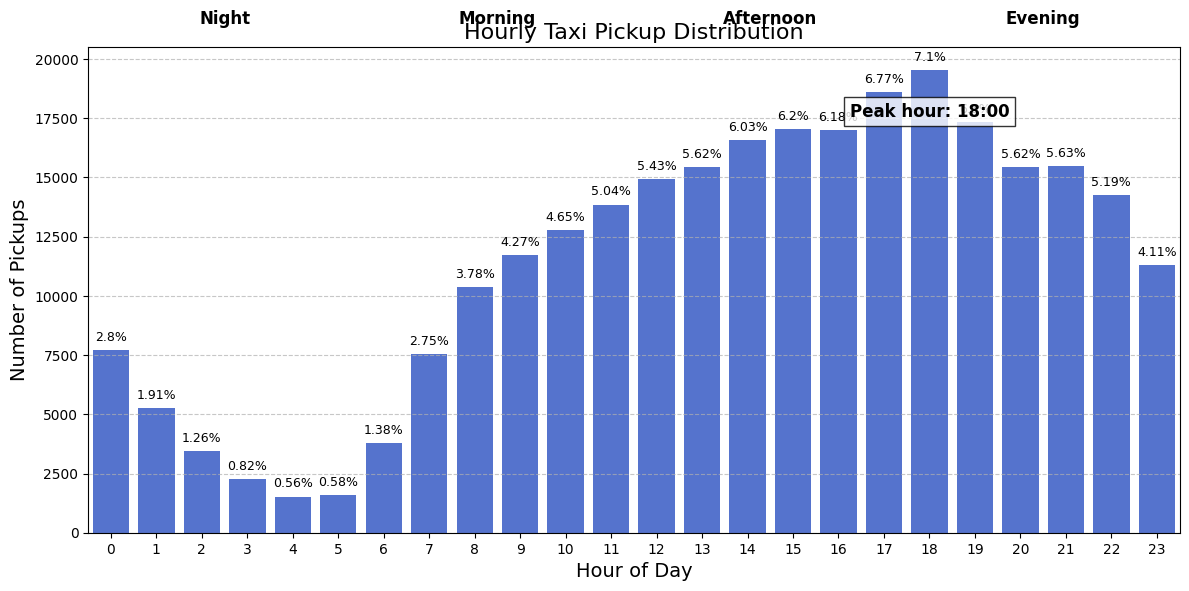


Key Insights:
- Peak pickup hour: 18:00 with 19533 pickups (7.1% of total)
- Morning rush hours (6-10 AM): 46278 pickups (16.83% of total)
- Evening rush hours (4-8 PM): 87939 pickups (31.98% of total)
- Late night hours (10 PM - 2 AM): 38533 pickups (14.01% of total)


In [ ]:
# Find and show the hourly trends in taxi pickups

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if tpep_pickup_datetime exists in the DataFrame
if 'tpep_pickup_datetime' in df.columns:
    # Extract hour from pickup datetime
    if not hasattr(df['tpep_pickup_datetime'].iloc[0], 'hour'):
        # If the column isn't already a datetime type, convert it
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract hour
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

    # Count pickups by hour
    hourly_pickups = df['pickup_hour'].value_counts().sort_index()

    # Calculate percentage of total pickups
    total_pickups = len(df)
    hourly_percentage = (hourly_pickups / total_pickups * 100).round(2)

    # Create a DataFrame for better display
    hourly_data = pd.DataFrame({
        'Pickup Count': hourly_pickups,
        'Percentage': hourly_percentage
    })

    print("Hourly distribution of taxi pickups:")
    print(hourly_data)

    # Visualize hourly pickup trends
    plt.figure(figsize=(12, 6))

    # Bar plot
    sns.barplot(x=hourly_data.index, y='Pickup Count', data=hourly_data, color='royalblue')

    # Add labels and title
    plt.title('Hourly Taxi Pickup Distribution', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=14)
    plt.ylabel('Number of Pickups', fontsize=14)
    plt.xticks(range(0, 24))

    # Add percentage labels on top of bars
    for i, (count, percentage) in enumerate(zip(hourly_pickups, hourly_percentage)):
        plt.text(i, count + (max(hourly_pickups) * 0.02), f"{percentage}%",
                 ha='center', fontsize=9)

    # Add time period labels
    time_periods = ['Night', 'Morning', 'Afternoon', 'Evening']
    period_ranges = [(0, 6), (6, 12), (12, 18), (18, 24)]

    for period, (start, end) in zip(time_periods, period_ranges):
        mid_point = (start + end - 1) / 2
        y_pos = max(hourly_pickups) * 1.1
        plt.text(mid_point, y_pos, period, ha='center', fontsize=12, fontweight='bold')

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate peak hours
    peak_hour = hourly_pickups.idxmax()
    peak_count = hourly_pickups.max()
    plt.text(peak_hour, peak_count * 0.9, f"Peak hour: {peak_hour}:00",
             fontsize=12, fontweight='bold', ha='center',
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Additional insights
    print("\nKey Insights:")
    print(f"- Peak pickup hour: {peak_hour}:00 with {peak_count} pickups ({hourly_percentage[peak_hour]}% of total)")

    # Morning rush hours (6-10 AM)
    morning_rush = hourly_data.loc[6:10, 'Pickup Count'].sum()
    morning_percentage = (morning_rush / total_pickups * 100).round(2)
    print(f"- Morning rush hours (6-10 AM): {morning_rush} pickups ({morning_percentage}% of total)")

    # Evening rush hours (4-8 PM)
    evening_rush = hourly_data.loc[16:20, 'Pickup Count'].sum()
    evening_percentage = (evening_rush / total_pickups * 100).round(2)
    print(f"- Evening rush hours (4-8 PM): {evening_rush} pickups ({evening_percentage}% of total)")

    # Late night hours (10 PM - 2 AM)
    late_night = hourly_data.loc[[22, 23, 0, 1], 'Pickup Count'].sum()
    late_night_percentage = (late_night / total_pickups * 100).round(2)
    print(f"- Late night hours (10 PM - 2 AM): {late_night} pickups ({late_night_percentage}% of total)")
else:
    print("Error: tpep_pickup_datetime column not found in the DataFrame.")

Daily distribution of taxi pickups:
         Day  Pickup Count  Percentage
0     Monday         34326       12.48
1    Tuesday         39628       14.41
2  Wednesday         42230       15.36
3   Thursday         43151       15.69
4     Friday         40772       14.83
5   Saturday         40029       14.56
6     Sunday         34827       12.67


<ipython-input-30-c29313eb4735>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Day', y='Pickup Count', data=daily_data,


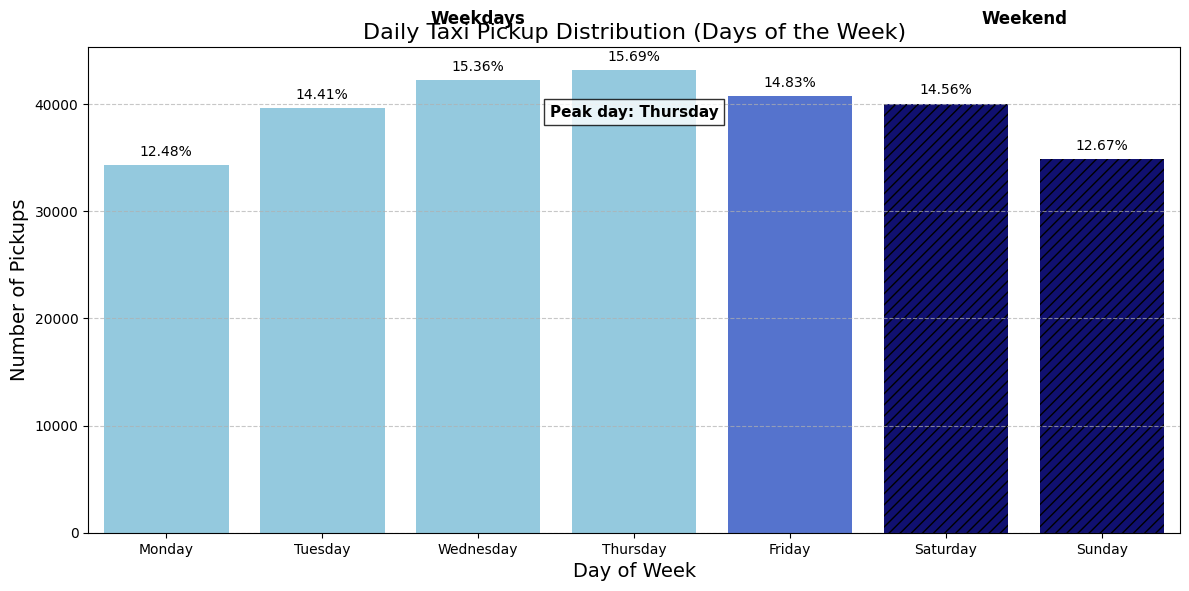


Key Insights:
- Peak pickup day: Thursday with 43151 pickups (15.69% of total)
- Weekdays (Mon-Fri): 200107 pickups (72.78% of total)
- Weekend (Sat-Sun): 74856 pickups (27.22% of total)
- Average pickups per weekday: 40021
- Average pickups per weekend day: 37428
- Weekend days average 6.48% FEWER pickups than weekdays
- Slowest pickup day: Monday with 34326 pickups (12.48% of total)


In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check if tpep_pickup_datetime exists in the DataFrame
if 'tpep_pickup_datetime' in df.columns:
    # Ensure the column is datetime type
    if not hasattr(df['tpep_pickup_datetime'].iloc[0], 'dayofweek'):
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract day of the week (0=Monday, 6=Sunday)
    df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
    df['pickup_day_name'] = df['tpep_pickup_datetime'].dt.day_name()

    # Count pickups by day of week
    daily_pickups = df['pickup_day'].value_counts().sort_index()

    # Create a DataFrame with day names for better display
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_data = pd.DataFrame({
        'Day': day_names,
        'Pickup Count': [daily_pickups.get(i, 0) for i in range(7)]
    })

    # Calculate percentage of total pickups
    total_pickups = len(df)
    daily_data['Percentage'] = (daily_data['Pickup Count'] / total_pickups * 100).round(2)

    print("Daily distribution of taxi pickups:")
    print(daily_data)

    # Visualize daily pickup trends
    plt.figure(figsize=(12, 6))

    # Bar plot
    ax = sns.barplot(x='Day', y='Pickup Count', data=daily_data,
                palette=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'royalblue', 'navy', 'navy'])

    # Add labels and title
    plt.title('Daily Taxi Pickup Distribution (Days of the Week)', fontsize=16)
    plt.xlabel('Day of Week', fontsize=14)
    plt.ylabel('Number of Pickups', fontsize=14)

    # Add percentage labels on top of bars
    for i, row in enumerate(daily_data.itertuples()):
        plt.text(i, row._2 + (max(daily_data['Pickup Count']) * 0.02),
                f"{row.Percentage}%", ha='center', fontsize=10)

    # Color weekdays vs weekends differently
    for i, bar in enumerate(ax.patches):
        if i >= 5:  # Weekend (Saturday and Sunday)
            bar.set_hatch('///')

    # Add labels for weekdays and weekends
    plt.text(2, max(daily_data['Pickup Count']) * 1.1, 'Weekdays',
             ha='center', fontsize=12, fontweight='bold')
    plt.text(5.5, max(daily_data['Pickup Count']) * 1.1, 'Weekend',
             ha='center', fontsize=12, fontweight='bold')

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate peak day
    peak_day_idx = daily_data['Pickup Count'].idxmax()
    peak_day = daily_data.loc[peak_day_idx, 'Day']
    peak_count = daily_data.loc[peak_day_idx, 'Pickup Count']
    plt.text(peak_day_idx, peak_count * 0.9, f"Peak day: {peak_day}",
             fontsize=11, fontweight='bold', ha='center',
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Additional insights
    print("\nKey Insights:")
    print(f"- Peak pickup day: {peak_day} with {peak_count} pickups ({daily_data.loc[peak_day_idx, 'Percentage']}% of total)")

    # Weekday vs Weekend comparison
    weekday_pickups = daily_data.iloc[:5]['Pickup Count'].sum()
    weekend_pickups = daily_data.iloc[5:]['Pickup Count'].sum()

    weekday_avg = weekday_pickups / 5
    weekend_avg = weekend_pickups / 2

    weekday_pct = (weekday_pickups / total_pickups * 100).round(2)
    weekend_pct = (weekend_pickups / total_pickups * 100).round(2)

    print(f"- Weekdays (Mon-Fri): {weekday_pickups} pickups ({weekday_pct}% of total)")
    print(f"- Weekend (Sat-Sun): {weekend_pickups} pickups ({weekend_pct}% of total)")
    print(f"- Average pickups per weekday: {weekday_avg:.0f}")
    print(f"- Average pickups per weekend day: {weekend_avg:.0f}")

    difference_pct = ((weekend_avg - weekday_avg) / weekday_avg * 100).round(2)
    if weekend_avg > weekday_avg:
        print(f"- Weekend days average {abs(difference_pct)}% MORE pickups than weekdays")
    else:
        print(f"- Weekend days average {abs(difference_pct)}% FEWER pickups than weekdays")

    # Find the slowest day
    slowest_day_idx = daily_data['Pickup Count'].idxmin()
    slowest_day = daily_data.loc[slowest_day_idx, 'Day']
    slowest_count = daily_data.loc[slowest_day_idx, 'Pickup Count']
    print(f"- Slowest pickup day: {slowest_day} with {slowest_count} pickups ({daily_data.loc[slowest_day_idx, 'Percentage']}% of total)")
else:
    print("Error: tpep_pickup_datetime column not found in the DataFrame.")


Monthly distribution of taxi pickups:
        Month  Pickup Count  Percentage
0     January         21950        7.98
1    February         21078        7.67
2       March         24501        8.91
3       April         23602        8.58
4         May         25361        9.22
5        June         23785        8.65
6        July         20796        7.56
7      August         20208        7.35
8   September         20484        7.45
9     October         25286        9.20
10   November         23934        8.70
11   December         23978        8.72


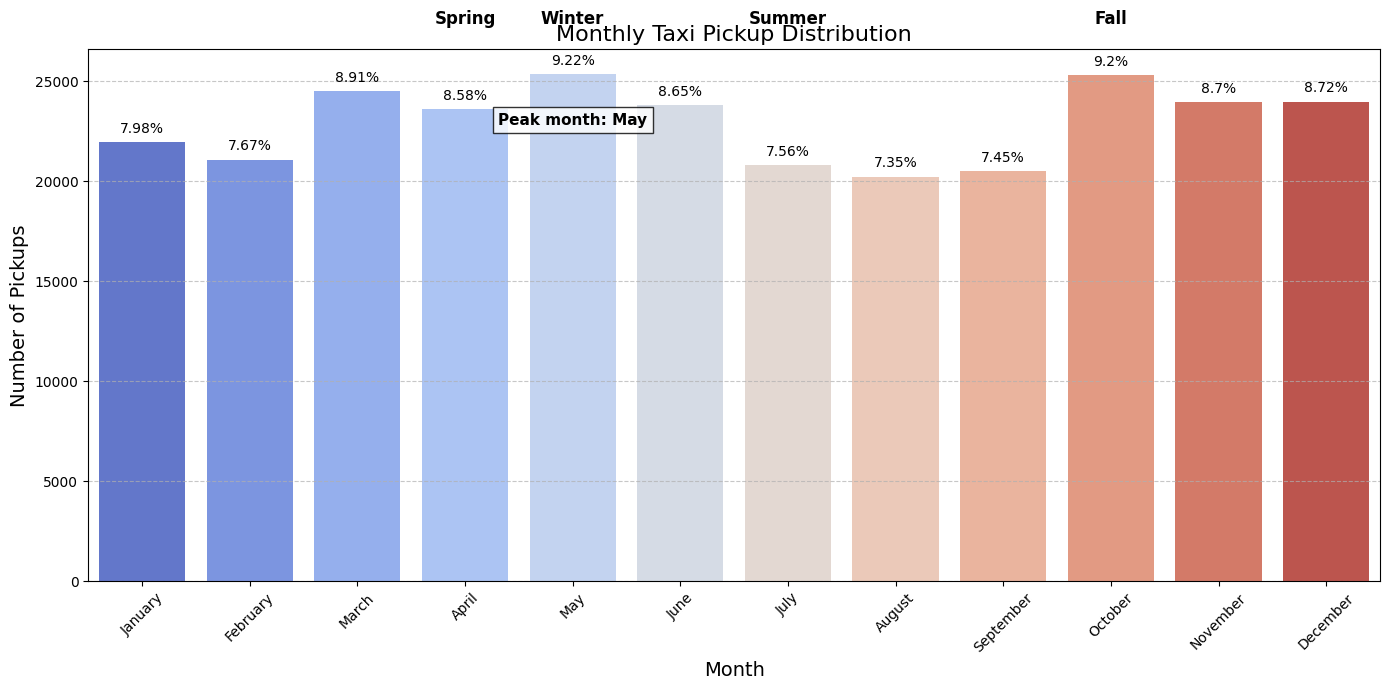


Key Insights:
- Peak pickup month: May with 25361 pickups (9.22% of total)
- Slowest pickup month: August with 20208 pickups (7.35% of total)
- May has 25.5% more pickups than August
- Busiest season: Spring with 73464 pickups
- Slowest season: Summer with 64789 pickups
- Average monthly pickups: 22914
- Highest month-over-month growth: October (23.4%)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Check if tpep_pickup_datetime exists in the DataFrame
if 'tpep_pickup_datetime' in df.columns:
    # Ensure the column is datetime type
    if not hasattr(df['tpep_pickup_datetime'].iloc[0], 'month'):
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract month
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
    df['pickup_month_name'] = df['tpep_pickup_datetime'].dt.strftime('%B')  # Full month name

    # Count pickups by month
    monthly_pickups = df['pickup_month'].value_counts().sort_index()

    # Create a DataFrame with month names for better display
    month_names = [calendar.month_name[i] for i in range(1, 13)]
    monthly_data = pd.DataFrame({
        'Month': month_names,
        'Pickup Count': [monthly_pickups.get(i, 0) for i in range(1, 13)]
    })

    # Calculate percentage of total pickups
    total_pickups = len(df)
    monthly_data['Percentage'] = (monthly_data['Pickup Count'] / total_pickups * 100).round(2)

    # Remove months with zero pickups (might not have data for all months)
    monthly_data = monthly_data[monthly_data['Pickup Count'] > 0]

    print("Monthly distribution of taxi pickups:")
    print(monthly_data)

    # Visualize monthly pickup trends
    plt.figure(figsize=(14, 7))

    # Bar plot - fixed to avoid FutureWarning
    ax = sns.barplot(x='Month', y='Pickup Count', data=monthly_data, hue='Month', palette='coolwarm', legend=False)

    # Add labels and title
    plt.title('Monthly Taxi Pickup Distribution', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Pickups', fontsize=14)
    plt.xticks(rotation=45)

    # Add percentage labels on top of bars - fixed to use direct column access
    for i, row in enumerate(monthly_data.itertuples()):
        plt.text(i, monthly_data.iloc[i]['Pickup Count'] + (max(monthly_data['Pickup Count']) * 0.02),
                f"{monthly_data.iloc[i]['Percentage']}%", ha='center', fontsize=10)

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate peak month
    peak_month_idx = monthly_data['Pickup Count'].idxmax()
    peak_month = monthly_data.loc[peak_month_idx, 'Month']
    peak_count = monthly_data.loc[peak_month_idx, 'Pickup Count']
    plt.text(peak_month_idx, peak_count * 0.9, f"Peak month: {peak_month}",
             fontsize=11, fontweight='bold', ha='center',
             bbox=dict(facecolor='white', alpha=0.8))

    # Seasonal labels
    seasons = {
        'Winter': ['December', 'January', 'February'],
        'Spring': ['March', 'April', 'May'],
        'Summer': ['June', 'July', 'August'],
        'Fall': ['September', 'October', 'November']
    }

    # Add seasonal labels if we have data spanning multiple seasons
    if len(monthly_data) > 3:
        for season, months in seasons.items():
            # Find the months in this season that are in our data
            season_months = [m for m in months if m in monthly_data['Month'].values]
            if season_months:
                # Find indices of these months
                indices = [monthly_data[monthly_data['Month'] == m].index[0] for m in season_months]
                if indices:
                    # Place label at the middle of the season's months
                    mid_idx = sum(indices) / len(indices)
                    y_pos = max(monthly_data['Pickup Count']) * 1.1
                    plt.text(mid_idx, y_pos, season, ha='center', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Additional insights
    print("\nKey Insights:")
    print(f"- Peak pickup month: {peak_month} with {peak_count} pickups ({monthly_data.loc[peak_month_idx, 'Percentage']}% of total)")

    # Find the slowest month
    slowest_month_idx = monthly_data['Pickup Count'].idxmin()
    slowest_month = monthly_data.loc[slowest_month_idx, 'Month']
    slowest_count = monthly_data.loc[slowest_month_idx, 'Pickup Count']
    print(f"- Slowest pickup month: {slowest_month} with {slowest_count} pickups ({monthly_data.loc[slowest_month_idx, 'Percentage']}% of total)")

    # Calculate the difference between peak and slowest months
    difference_pct = ((peak_count - slowest_count) / slowest_count * 100).round(2)
    print(f"- {peak_month} has {difference_pct}% more pickups than {slowest_month}")

    # Seasonal analysis if we have data for all seasons
    if len(monthly_data) >= 12:
        seasonal_data = {}
        for season, months in seasons.items():
            season_pickups = monthly_data[monthly_data['Month'].isin(months)]['Pickup Count'].sum()
            seasonal_data[season] = season_pickups

        # Find busiest and slowest seasons
        busiest_season = max(seasonal_data, key=seasonal_data.get)
        slowest_season = min(seasonal_data, key=seasonal_data.get)

        print(f"- Busiest season: {busiest_season} with {seasonal_data[busiest_season]} pickups")
        print(f"- Slowest season: {slowest_season} with {seasonal_data[slowest_season]} pickups")

    # Average monthly pickups
    avg_monthly = monthly_data['Pickup Count'].mean()
    print(f"- Average monthly pickups: {avg_monthly:.0f}")

    # Calculate month-over-month growth if we have consecutive months
    if len(monthly_data) > 1:
        # Create a temporary copy sorted by actual month order
        month_order = {month: i for i, month in enumerate(calendar.month_name[1:])}
        sorted_data = monthly_data.copy()
        sorted_data['month_num'] = sorted_data['Month'].map(month_order)
        sorted_data = sorted_data.sort_values('month_num')

        # Calculate growth
        sorted_data['prev_count'] = sorted_data['Pickup Count'].shift(1)
        sorted_data['growth'] = (sorted_data['Pickup Count'] - sorted_data['prev_count']) / sorted_data['prev_count'] * 100

        # Find highest growth month
        sorted_data = sorted_data.dropna()
        if not sorted_data.empty:
            max_growth_idx = sorted_data['growth'].idxmax()
            max_growth_month = sorted_data.loc[max_growth_idx, 'Month']
            max_growth = sorted_data.loc[max_growth_idx, 'growth']
            print(f"- Highest month-over-month growth: {max_growth_month} ({max_growth:.1f}%)")
else:
    print("Error: tpep_pickup_datetime column not found in the DataFrame.")

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

# List of financial parameters and trip distance to analyze
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Make sure all columns exist in the DataFrame
available_columns = [col for col in columns_to_check if col in df.columns]

if available_columns:
    print("Analyzing financial parameters and trip distance for zero/negative values:")

    for col in available_columns:
        # Get total count
        total_count = len(df)

        # Count zero values
        zero_count = (df[col] == 0).sum()
        zero_percentage = (zero_count / total_count * 100).round(2)

        # Count negative values
        negative_count = (df[col] < 0).sum()
        negative_percentage = (negative_count / total_count * 100).round(2)

        # Get basic statistics
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        median_val = df[col].median()

        print(f"\n--- {col} ---")
        print(f"Range: {min_val} to {max_val}")
        print(f"Mean: {mean_val:.2f}, Median: {median_val:.2f}")
        print(f"Zero values: {zero_count} ({zero_percentage}% of data)")
        print(f"Negative values: {negative_count} ({negative_percentage}% of data)")

        # Show sample of zero rows if there are any
        if zero_count > 0:
            print("\nSample rows with zero values:")
            zero_rows = df[df[col] == 0].head(3)
            display_cols = [col, 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                           'PULocationID', 'DOLocationID']
            display_cols = [c for c in display_cols if c in df.columns]
            print(zero_rows[display_cols])

        # Show sample of negative rows if there are any
        if negative_count > 0:
            print("\nSample rows with negative values:")
            negative_rows = df[df[col] < 0].head(3)
            print(negative_rows[display_cols])

    # Additional analysis: Check relationship between fare_amount and trip_distance
    if 'fare_amount' in df.columns and 'trip_distance' in df.columns:
        print("\n--- Relationship between fare_amount and trip_distance ---")

        # Count zero distance but non-zero fare
        zero_dist_nonzero_fare = df[(df['trip_distance'] == 0) & (df['fare_amount'] > 0)]
        zero_dist_nonzero_fare_count = len(zero_dist_nonzero_fare)

        # Count non-zero distance but zero fare
        nonzero_dist_zero_fare = df[(df['trip_distance'] > 0) & (df['fare_amount'] == 0)]
        nonzero_dist_zero_fare_count = len(nonzero_dist_zero_fare)

        print(f"Trips with zero distance but non-zero fare: {zero_dist_nonzero_fare_count} ({zero_dist_nonzero_fare_count/total_count*100:.2f}% of data)")
        print(f"Trips with non-zero distance but zero fare: {nonzero_dist_zero_fare_count} ({nonzero_dist_zero_fare_count/total_count*100:.2f}% of data)")

        if zero_dist_nonzero_fare_count > 0:
            print("\nSample rows with zero distance but non-zero fare:")
            print(zero_dist_nonzero_fare[['trip_distance', 'fare_amount', 'total_amount']].head(3))

        if nonzero_dist_zero_fare_count > 0:
            print("\nSample rows with non-zero distance but zero fare:")
            print(nonzero_dist_zero_fare[['trip_distance', 'fare_amount', 'total_amount']].head(3))

    # Additional analysis: Check relationship between total_amount and its components
    if 'total_amount' in df.columns and 'fare_amount' in df.columns and 'tip_amount' in df.columns:
        print("\n--- Consistency of total_amount with components ---")

        # Select some other fee columns that might be available
        fee_columns = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
        available_fees = [col for col in fee_columns if col in df.columns]

        # Calculate sum of components
        component_sum = df['fare_amount'] + df['tip_amount']
        for fee in available_fees:
            component_sum += df[fee]

        # Calculate difference between total_amount and sum of components
        df['total_diff'] = (df['total_amount'] - component_sum).abs()

        # Count inconsistent rows (difference > 0.01 to account for floating point errors)
        inconsistent_rows = df[df['total_diff'] > 0.01]
        inconsistent_count = len(inconsistent_rows)

        print(f"Trips with inconsistent total_amount: {inconsistent_count} ({inconsistent_count/total_count*100:.2f}% of data)")

        if inconsistent_count > 0:
            print("\nSample rows with inconsistent total_amount:")
            display_cols = ['total_amount', 'fare_amount', 'tip_amount'] + available_fees + ['total_diff']
            print(inconsistent_rows[display_cols].head(3))

        # Clean up temporary column
        df = df.drop('total_diff', axis=1)
else:
    print("None of the specified columns found in the DataFrame.")

Analyzing financial parameters and trip distance for zero/negative values:

--- fare_amount ---
Range: 0.0 to 519.6
Mean: 19.77, Median: 13.50
Zero values: 80 (0.03% of data)
Negative values: 0 (0.0% of data)

Sample rows with zero values:
        fare_amount tpep_pickup_datetime tpep_dropoff_datetime  PULocationID  \
277015          0.0  2023-12-22 08:58:22   2023-12-22 08:59:35           264   
363967          0.0  2023-03-17 18:16:47   2023-03-17 18:16:54           113   
306183          0.0  2023-09-25 00:12:38   2023-09-25 01:07:42           138   

        DOLocationID  
277015           264  
363967           113  
306183           265  

--- tip_amount ---
Range: 0.0 to 150.29
Mean: 3.54, Median: 2.85
Zero values: 62988 (22.91% of data)
Negative values: 0 (0.0% of data)

Sample rows with zero values:
        tip_amount tpep_pickup_datetime tpep_dropoff_datetime  PULocationID  \
63147          0.0  2023-11-28 22:11:32   2023-11-28 22:31:42           186   
371281         0.0  20

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
# Define the important parameters to filter on
important_params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check which parameters exist in the DataFrame
available_params = [param for param in important_params if param in df.columns]

if len(available_params) > 0:
    print(f"Creating DataFrame with non-zero entries for: {', '.join(available_params)}")

    # Save original count for comparison
    original_count = len(df)

    # Create a copy of the original DataFrame
    df_nonzero = df.copy()

    # Build a filter mask
    nonzero_mask = pd.Series(True, index=df.index)

    # Apply non-zero filters for financial parameters
    for param in ['fare_amount', 'tip_amount', 'total_amount']:
        if param in df.columns:
            param_zero_mask = df[param] == 0
            zero_count = param_zero_mask.sum()
            nonzero_mask = nonzero_mask & ~param_zero_mask
            print(f"- Filtering {zero_count} rows with zero {param}")

    # Special handling for trip_distance
    if 'trip_distance' in df.columns:
        # Check for suspicious zero distances (different zones or with zero fare)
        suspicious_zero_dist = df['trip_distance'] == 0

        if 'PULocationID' in df.columns and 'DOLocationID' in df.columns:
            different_zones = df['PULocationID'] != df['DOLocationID']
            suspicious_zero_dist = suspicious_zero_dist & different_zones

            # Count suspicious zeros (zero distance between different zones)
            suspicious_count = suspicious_zero_dist.sum()
            print(f"- Filtering {suspicious_count} rows with suspicious zero trip_distance (different zones)")

        if 'fare_amount' in df.columns:
            zero_fare = df['fare_amount'] == 0
            zero_dist_zero_fare = (df['trip_distance'] == 0) & zero_fare

            # Count zero distance with zero fare
            zero_dist_zero_fare_count = zero_dist_zero_fare.sum()
            print(f"- Filtering {zero_dist_zero_fare_count} rows with zero trip_distance and zero fare")

            # Update suspicious zeros to include zero fare cases
            suspicious_zero_dist = suspicious_zero_dist | zero_dist_zero_fare

        # Apply the trip_distance filter
        nonzero_mask = nonzero_mask & ~suspicious_zero_dist

    # Apply the combined filter
    df_nonzero = df_nonzero[nonzero_mask]

    # Report results
    nonzero_count = len(df_nonzero)
    removed_count = original_count - nonzero_count
    removed_percentage = round((removed_count / original_count * 100), 2)

    print(f"\nFiltering results:")
    print(f"- Original dataset: {original_count} rows")
    print(f"- Non-zero dataset: {nonzero_count} rows")
    print(f"- Removed: {removed_count} rows ({removed_percentage}%)")

    # Quick stats on the non-zero DataFrame
    print("\nStats for non-zero DataFrame:")
    for param in available_params:
        min_val = df_nonzero[param].min()
        max_val = df_nonzero[param].max()
        mean_val = df_nonzero[param].mean()
        print(f"- {param}: Min={min_val:.2f}, Max={max_val:.2f}, Mean={mean_val:.2f}")

    # Return the filtered DataFrame
    print("\nNon-zero DataFrame created successfully!")
else:
    print("None of the specified parameters found in the DataFrame.")
    df_nonzero = df.copy()


Creating DataFrame with non-zero entries for: fare_amount, tip_amount, total_amount, trip_distance
- Filtering 80 rows with zero fare_amount
- Filtering 62988 rows with zero tip_amount
- Filtering 33 rows with zero total_amount
- Filtering 3132 rows with suspicious zero trip_distance (different zones)
- Filtering 34 rows with zero trip_distance and zero fare

Filtering results:
- Original dataset: 274963 rows
- Non-zero dataset: 211431 rows
- Removed: 63532 rows (23.11%)

Stats for non-zero DataFrame:
- fare_amount: Min=0.01, Max=353.00, Mean=19.48
- tip_amount: Min=0.01, Max=150.29, Mean=4.59
- total_amount: Min=3.35, Max=473.58, Mean=29.67
- trip_distance: Min=0.00, Max=104.30, Mean=3.43

Non-zero DataFrame created successfully!


In [ ]:
df_nonzero


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined,pickup_hour,pickup_day,pickup_day_name,pickup_month,pickup_month_name
306805,1,2023-09-25 18:44:03,2023-09-25 19:05:40,1.0,3.40,1.0,164,79,1,21.2,...,0.0,1.0,33.20,2.5,0.0,18,0,Monday,9,September
44548,2,2023-11-11 00:26:17,2023-11-11 00:52:18,1.0,2.76,1.0,211,256,1,22.6,...,0.0,1.0,29.60,2.5,0.0,0,5,Saturday,11,November
95813,2,2023-10-27 19:37:42,2023-10-27 20:01:57,1.0,3.44,1.0,161,151,1,24.0,...,0.0,1.0,35.08,2.5,0.0,19,4,Friday,10,October
302814,2,2023-09-18 11:53:40,2023-09-18 12:07:13,6.0,0.36,1.0,141,229,1,12.1,...,0.0,1.0,19.32,2.5,0.0,11,0,Monday,9,September
74375,1,2023-10-08 23:54:36,2023-10-09 00:07:44,1.0,3.40,1.0,186,140,1,16.3,...,0.0,1.0,25.56,2.5,0.0,23,6,Sunday,10,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262503,2,2023-12-10 03:57:21,2023-12-10 04:08:37,1.0,1.72,1.0,68,233,1,12.1,...,0.0,1.0,20.52,2.5,0.0,3,6,Sunday,12,December
274661,2,2023-12-20 07:22:22,2023-12-20 07:27:19,1.0,1.24,1.0,236,163,1,7.9,...,0.0,1.0,14.28,2.5,0.0,7,2,Wednesday,12,December
281723,2,2023-12-28 14:01:38,2023-12-28 14:09:17,4.0,0.70,1.0,100,100,1,8.6,...,0.0,1.0,13.60,2.5,0.0,14,3,Thursday,12,December
164751,2,2023-02-08 15:59:50,2023-02-08 16:25:57,1.0,3.05,1.0,142,170,1,23.3,...,0.0,1.0,35.76,2.5,0.0,15,2,Wednesday,2,February


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Monthly Revenue Analysis:
    month_name  total_revenue  avg_fare  num_trips  revenue_growth  \
0   $604862.64         $27.56     21950  $74741.60             NaN   
1   $573493.79         $27.21     21078  $69406.75          $-1.26   
2   $688184.25         $28.09     24501  $83675.77           $3.23   
3   $673849.32         $28.55     23602  $82466.55           $1.65   
4   $746716.78         $29.44     25361  $89795.41           $3.13   
5   $697160.26         $29.31     23785  $84632.07          $-0.45   
6   $597236.25         $28.72     20796  $73473.75          $-2.02   
7   $586962.45         $29.05     20208  $72158.15           $1.14   
8   $616935.03         $30.12     20484  $71026.33           $3.69   
9   $755079.21         $29.86     25286  $87528.21          $-0.85   
10  $688624.33         $28.77     23934  $77501.31          $-3.65   
11  $693381.97         $28.92     23978  $77746.88           $0.51   

   avg_distance  revenue_per_mile  
0       January            

<ipython-input-45-724122605853>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='total_revenue', data=monthly_revenue, palette='viridis')
<ipython-input-45-724122605853>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='month_name', y='revenue_growth', data=monthly_revenue.iloc[1:], # Skip first month (no growth)


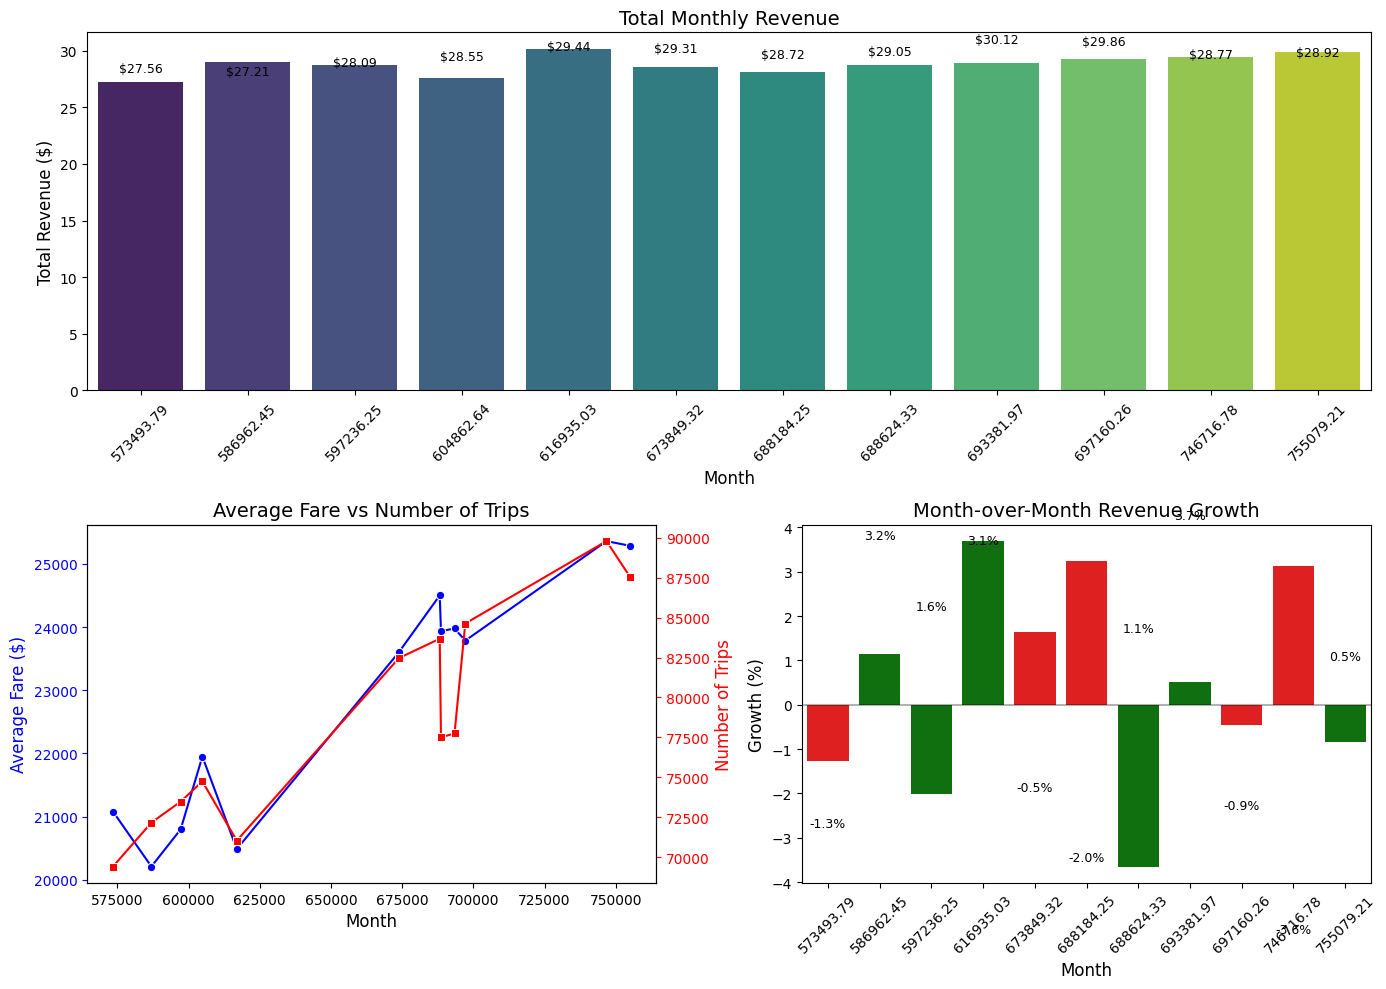


Key Revenue Insights:
1. Highest revenue month: 616935.03 ($30.12)
2. Lowest revenue month: 573493.79 ($27.21)
3. Highest month-over-month growth: 616935.03 (3.7%)
4. Average monthly revenue: $28.80
5. Month with highest revenue per trip: 616935.03 ($0.00 per trip)
6. Highest revenue season: Fall ($88.75)


In [ ]:
# Group data by month and analyse monthly revenue

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Check if we have the necessary columns for revenue analysis
if 'tpep_pickup_datetime' in df.columns and 'total_amount' in df.columns:
    # Ensure the datetime column is the right type
    if not hasattr(df['tpep_pickup_datetime'].iloc[0], 'month'):
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract month
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
    df['pickup_month_name'] = df['tpep_pickup_datetime'].dt.strftime('%B')

    # Group by month and calculate revenue metrics
    monthly_revenue = df.groupby('pickup_month').agg({
        'total_amount': ['sum', 'mean', 'count'],
        'trip_distance': ['sum', 'mean'] if 'trip_distance' in df.columns else ['count'],
        'pickup_month_name': 'first'  # Get month name
    }).reset_index()

    # Flatten the multi-level columns
    monthly_revenue.columns = ['month', 'month_name', 'total_revenue', 'avg_fare', 'num_trips',
                              'total_distance' if 'trip_distance' in df.columns else 'count2',
                              'avg_distance' if 'trip_distance' in df.columns else 'count3']

    # Remove duplicated count columns if trip_distance wasn't available
    if 'trip_distance' not in df.columns:
        monthly_revenue = monthly_revenue.drop(['count2', 'count3'], axis=1)

    # Sort by month
    monthly_revenue = monthly_revenue.sort_values('month')

    # Calculate revenue per mile if distance data is available
    if 'trip_distance' in df.columns:
        monthly_revenue['revenue_per_mile'] = monthly_revenue['total_revenue'] / monthly_revenue['total_distance']

    # Calculate month-over-month growth
    monthly_revenue['revenue_growth'] = monthly_revenue['total_revenue'].pct_change() * 100

    # Print the monthly revenue data
    pd.set_option('display.float_format', '${:.2f}'.format)
    print("Monthly Revenue Analysis:")
    display_cols = ['month_name', 'total_revenue', 'avg_fare', 'num_trips', 'revenue_growth']
    if 'trip_distance' in df.columns:
        display_cols.extend(['avg_distance', 'revenue_per_mile'])
    print(monthly_revenue[display_cols])

    # Reset float format for subsequent operations
    pd.reset_option('display.float_format')

    # Visualize monthly revenue
    plt.figure(figsize=(14, 10))

    # Plot 1: Total Revenue by Month
    plt.subplot(2, 1, 1)
    sns.barplot(x='month_name', y='total_revenue', data=monthly_revenue, palette='viridis')
    plt.title('Total Monthly Revenue', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Revenue ($)', fontsize=12)
    plt.xticks(rotation=45)

    # Add value labels on the bars
    for i, row in enumerate(monthly_revenue.itertuples()):
        plt.text(i, row.total_revenue + (monthly_revenue['total_revenue'].max() * 0.02),
                f"${row.total_revenue:,.2f}", ha='center', fontsize=9)

    # Plot 2: Average Fare and Trips
    plt.subplot(2, 2, 3)
    ax1 = plt.gca()
    ax2 = ax1.twinx()

    # Plot average fare
    sns.lineplot(x='month_name', y='avg_fare', data=monthly_revenue, marker='o', color='blue', ax=ax1)
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Average Fare ($)', fontsize=12, color='blue')
    ax1.tick_params(axis='y', colors='blue')

    # Plot number of trips
    sns.lineplot(x='month_name', y='num_trips', data=monthly_revenue, marker='s', color='red', ax=ax2)
    ax2.set_ylabel('Number of Trips', fontsize=12, color='red')
    ax2.tick_params(axis='y', colors='red')

    plt.title('Average Fare vs Number of Trips', fontsize=14)
    plt.xticks(rotation=45)

    # Plot 3: Month-over-Month Revenue Growth
    plt.subplot(2, 2, 4)
    bars = sns.barplot(x='month_name', y='revenue_growth', data=monthly_revenue.iloc[1:], # Skip first month (no growth)
                      palette=['green' if x >= 0 else 'red' for x in monthly_revenue['revenue_growth'].iloc[1:]])

    plt.title('Month-over-Month Revenue Growth', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Growth (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    # Add value labels on the bars
    for i, row in enumerate(monthly_revenue.iloc[1:].itertuples()):
        color = 'black'
        if hasattr(row, 'revenue_growth'):
            if row.revenue_growth >= 10 or row.revenue_growth <= -10:
                color = 'white'
            plt.text(i, row.revenue_growth + (0.5 if row.revenue_growth >= 0 else -1.5),
                    f"{row.revenue_growth:.1f}%", ha='center', fontsize=9, color=color)

    plt.tight_layout()
    plt.show()

    # Additional insights
    print("\nKey Revenue Insights:")

    # Highest and lowest revenue months
    highest_rev_idx = monthly_revenue['total_revenue'].idxmax()
    highest_rev_month = monthly_revenue.loc[highest_rev_idx, 'month_name']
    highest_rev = monthly_revenue.loc[highest_rev_idx, 'total_revenue']

    lowest_rev_idx = monthly_revenue['total_revenue'].idxmin()
    lowest_rev_month = monthly_revenue.loc[lowest_rev_idx, 'month_name']
    lowest_rev = monthly_revenue.loc[lowest_rev_idx, 'total_revenue']

    print(f"1. Highest revenue month: {highest_rev_month} (${highest_rev:,.2f})")
    print(f"2. Lowest revenue month: {lowest_rev_month} (${lowest_rev:,.2f})")

    # Highest growth month
    growth_data = monthly_revenue.iloc[1:]  # Skip first month (no growth)
    if not growth_data.empty:
        highest_growth_idx = growth_data['revenue_growth'].idxmax()
        highest_growth_month = monthly_revenue.loc[highest_growth_idx, 'month_name']
        highest_growth = monthly_revenue.loc[highest_growth_idx, 'revenue_growth']
        print(f"3. Highest month-over-month growth: {highest_growth_month} ({highest_growth:.1f}%)")

    # Average monthly revenue
    avg_monthly_rev = monthly_revenue['total_revenue'].mean()
    print(f"4. Average monthly revenue: ${avg_monthly_rev:,.2f}")

    # Revenue per trip trends
    monthly_revenue['revenue_per_trip'] = monthly_revenue['total_revenue'] / monthly_revenue['num_trips']
    highest_per_trip_idx = monthly_revenue['revenue_per_trip'].idxmax()
    highest_per_trip_month = monthly_revenue.loc[highest_per_trip_idx, 'month_name']
    highest_per_trip = monthly_revenue.loc[highest_per_trip_idx, 'revenue_per_trip']
    print(f"5. Month with highest revenue per trip: {highest_per_trip_month} (${highest_per_trip:.2f} per trip)")

    # Seasonal revenue patterns
    season_map = {
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    }

    monthly_revenue['season'] = monthly_revenue['month'].map(season_map)
    seasonal_revenue = monthly_revenue.groupby('season').agg({
        'total_revenue': 'sum',
        'num_trips': 'sum'
    }).reset_index()

    if len(seasonal_revenue) > 1:  # Only if we have multiple seasons
        highest_season_idx = seasonal_revenue['total_revenue'].idxmax()
        highest_season = seasonal_revenue.loc[highest_season_idx, 'season']
        highest_season_rev = seasonal_revenue.loc[highest_season_idx, 'total_revenue']
        print(f"6. Highest revenue season: {highest_season} (${highest_season_rev:,.2f})")
else:
    print("Required columns (tpep_pickup_datetime, total_amount) not found in DataFrame.")

Original DataFrame Monthly Revenue Analysis:
    month_name  total_revenue  avg_fare  num_trips  revenue_growth  \
0   $604862.64         $27.56     21950  $74741.60             NaN   
1   $573493.79         $27.21     21078  $69406.75          $-1.26   
2   $688184.25         $28.09     24501  $83675.77           $3.23   
3   $673849.32         $28.55     23602  $82466.55           $1.65   
4   $746716.78         $29.44     25361  $89795.41           $3.13   
5   $697160.26         $29.31     23785  $84632.07          $-0.45   
6   $597236.25         $28.72     20796  $73473.75          $-2.02   
7   $586962.45         $29.05     20208  $72158.15           $1.14   
8   $616935.03         $30.12     20484  $71026.33           $3.69   
9   $755079.21         $29.86     25286  $87528.21          $-0.85   
10  $688624.33         $28.77     23934  $77501.31          $-3.65   
11  $693381.97         $28.92     23978  $77746.88           $0.51   

   avg_distance  revenue_per_mile  
0       

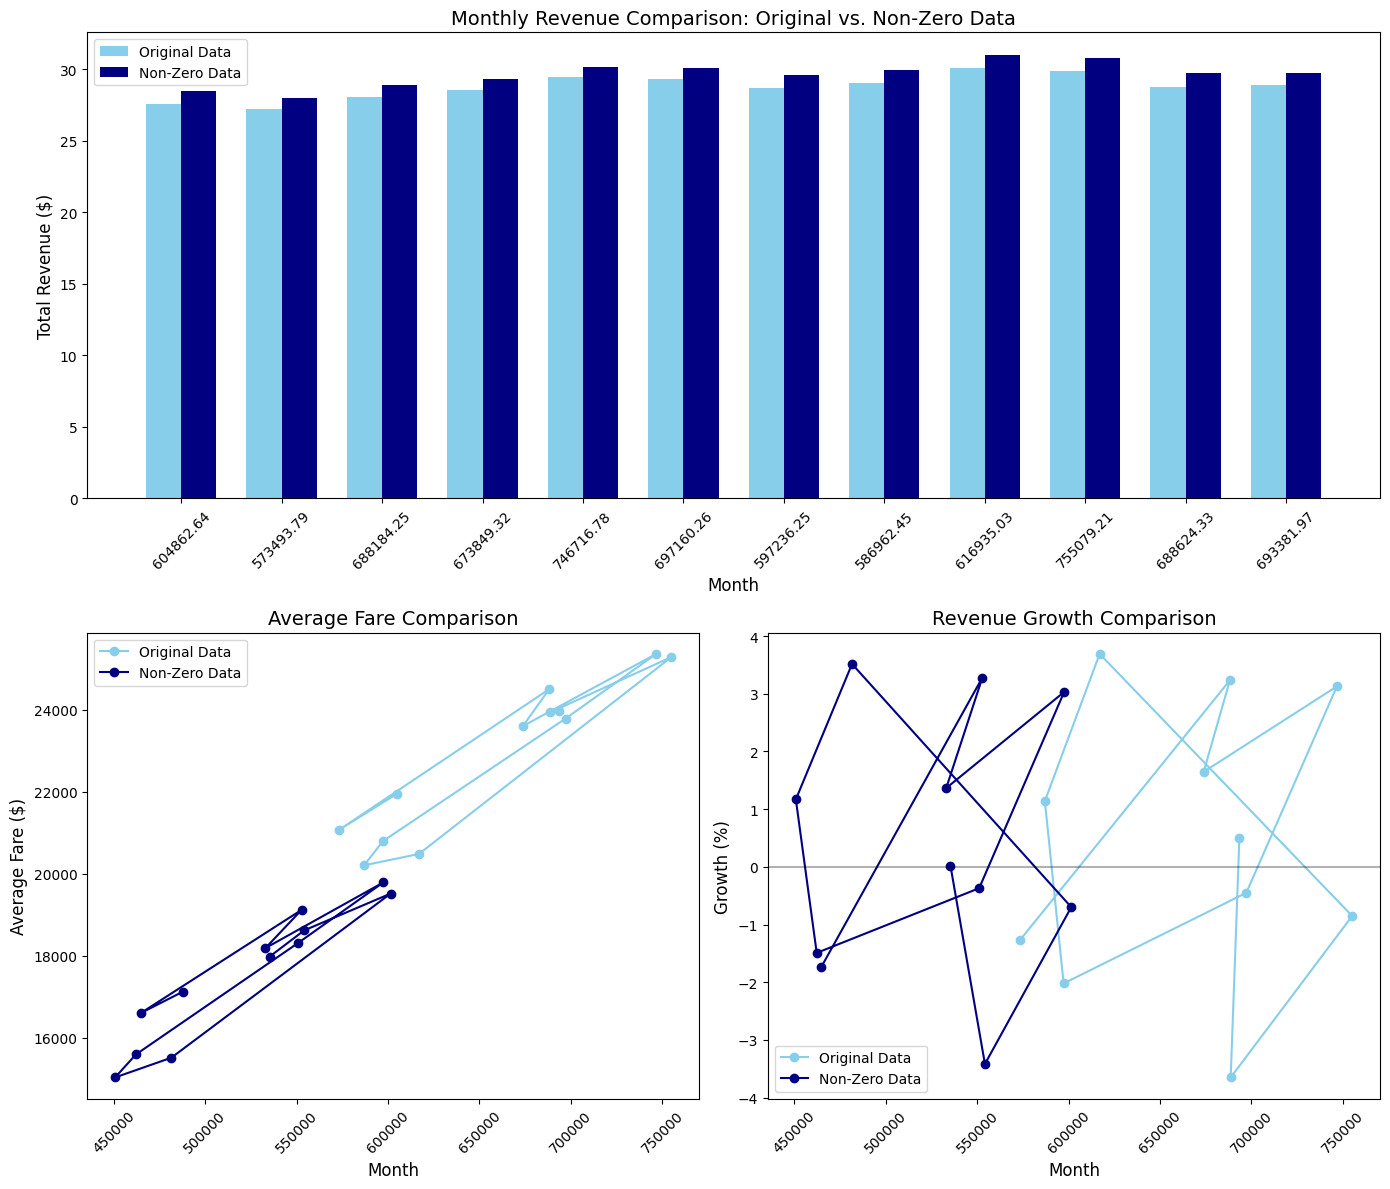


Comparison of Key Metrics (Non-Zero vs Original):
1. Total annual revenue: $355.93 vs $345.59
   Difference: $10.34 (2.99%)
2. Average fare: $17619.25 vs $22913.58
   Difference: $-5294.33 (-23.11%)

3. Monthly ranking changes (by total revenue):
   No changes in monthly rankings

4. Growth pattern changes:
   No months switched between growth and decline


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Function to analyze monthly revenue for any DataFrame
def analyze_monthly_revenue(dataframe, title_prefix=""):
    # Ensure the datetime column is the right type
    if not hasattr(dataframe['tpep_pickup_datetime'].iloc[0], 'month'):
        dataframe['tpep_pickup_datetime'] = pd.to_datetime(dataframe['tpep_pickup_datetime'])

    # Extract month
    dataframe['pickup_month'] = dataframe['tpep_pickup_datetime'].dt.month
    dataframe['pickup_month_name'] = dataframe['tpep_pickup_datetime'].dt.strftime('%B')

    # Group by month and calculate revenue metrics
    monthly_revenue = dataframe.groupby('pickup_month').agg({
        'total_amount': ['sum', 'mean', 'count'],
        'trip_distance': ['sum', 'mean'] if 'trip_distance' in dataframe.columns else ['count'],
        'pickup_month_name': 'first'  # Get month name
    }).reset_index()

    # Flatten the multi-level columns
    monthly_revenue.columns = ['month', 'month_name', 'total_revenue', 'avg_fare', 'num_trips',
                              'total_distance' if 'trip_distance' in dataframe.columns else 'count2',
                              'avg_distance' if 'trip_distance' in dataframe.columns else 'count3']

    # Remove duplicated count columns if trip_distance wasn't available
    if 'trip_distance' not in dataframe.columns:
        monthly_revenue = monthly_revenue.drop(['count2', 'count3'], axis=1)

    # Sort by month
    monthly_revenue = monthly_revenue.sort_values('month')

    # Calculate revenue per mile if distance data is available
    if 'trip_distance' in dataframe.columns:
        monthly_revenue['revenue_per_mile'] = monthly_revenue['total_revenue'] / monthly_revenue['total_distance']

    # Calculate month-over-month growth
    monthly_revenue['revenue_growth'] = monthly_revenue['total_revenue'].pct_change() * 100

    # Print the monthly revenue data
    pd.set_option('display.float_format', '${:.2f}'.format)
    print(f"{title_prefix} Monthly Revenue Analysis:")
    display_cols = ['month_name', 'total_revenue', 'avg_fare', 'num_trips', 'revenue_growth']
    if 'trip_distance' in dataframe.columns:
        display_cols.extend(['avg_distance', 'revenue_per_mile'])
    print(monthly_revenue[display_cols])

    # Reset float format
    pd.reset_option('display.float_format')

    return monthly_revenue

# Check if we have the necessary columns
if 'tpep_pickup_datetime' in df.columns and 'total_amount' in df.columns:
    # Analyze original DataFrame
    original_revenue = analyze_monthly_revenue(df, "Original DataFrame")

    # Analyze non-zero DataFrame if it exists
    if 'df_nonzero' in locals() or 'df_nonzero' in globals():
        nonzero_revenue = analyze_monthly_revenue(df_nonzero, "\nNon-Zero DataFrame")

        # Compare the results
        plt.figure(figsize=(14, 12))

        # Plot 1: Total Revenue Comparison
        plt.subplot(2, 1, 1)

        x = range(len(original_revenue))
        width = 0.35

        plt.bar([i - width/2 for i in x], original_revenue['total_revenue'], width, label='Original Data', color='skyblue')
        plt.bar([i + width/2 for i in x], nonzero_revenue['total_revenue'], width, label='Non-Zero Data', color='navy')

        plt.title('Monthly Revenue Comparison: Original vs. Non-Zero Data', fontsize=14)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Total Revenue ($)', fontsize=12)
        plt.xticks(x, original_revenue['month_name'], rotation=45)
        plt.legend()

        # Plot 2: Average Fare Comparison
        plt.subplot(2, 2, 3)
        plt.plot(original_revenue['month_name'], original_revenue['avg_fare'], '-o', label='Original Data', color='skyblue')
        plt.plot(nonzero_revenue['month_name'], nonzero_revenue['avg_fare'], '-o', label='Non-Zero Data', color='navy')

        plt.title('Average Fare Comparison', fontsize=14)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Average Fare ($)', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend()

        # Plot 3: Month-over-Month Growth Comparison
        plt.subplot(2, 2, 4)
        plt.plot(original_revenue['month_name'].iloc[1:], original_revenue['revenue_growth'].iloc[1:], '-o', label='Original Data', color='skyblue')
        plt.plot(nonzero_revenue['month_name'].iloc[1:], nonzero_revenue['revenue_growth'].iloc[1:], '-o', label='Non-Zero Data', color='navy')

        plt.title('Revenue Growth Comparison', fontsize=14)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Growth (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Compare key metrics
        print("\nComparison of Key Metrics (Non-Zero vs Original):")

        # 1. Total annual revenue difference
        orig_total = original_revenue['total_revenue'].sum()
        nonzero_total = nonzero_revenue['total_revenue'].sum()
        rev_diff = nonzero_total - orig_total
        rev_pct = (rev_diff / orig_total) * 100
        print(f"1. Total annual revenue: ${nonzero_total:,.2f} vs ${orig_total:,.2f}")
        print(f"   Difference: ${rev_diff:,.2f} ({rev_pct:.2f}%)")

        # 2. Average fare difference
        orig_avg = original_revenue['avg_fare'].mean()
        nonzero_avg = nonzero_revenue['avg_fare'].mean()
        avg_diff = nonzero_avg - orig_avg
        avg_pct = (avg_diff / orig_avg) * 100
        print(f"2. Average fare: ${nonzero_avg:.2f} vs ${orig_avg:.2f}")
        print(f"   Difference: ${avg_diff:.2f} ({avg_pct:.2f}%)")

        # 3. Monthly ranking changes
        print("\n3. Monthly ranking changes (by total revenue):")
        orig_ranks = original_revenue[['month_name', 'total_revenue']].sort_values('total_revenue', ascending=False)
        orig_ranks['rank'] = range(1, len(orig_ranks) + 1)

        nonzero_ranks = nonzero_revenue[['month_name', 'total_revenue']].sort_values('total_revenue', ascending=False)
        nonzero_ranks['rank'] = range(1, len(nonzero_ranks) + 1)

        # Merge to compare
        rank_comp = pd.merge(
            orig_ranks[['month_name', 'rank']],
            nonzero_ranks[['month_name', 'rank']],
            on='month_name',
            suffixes=('_orig', '_nonzero')
        )

        rank_comp['rank_change'] = rank_comp['rank_orig'] - rank_comp['rank_nonzero']

        # Find months with ranking changes
        changed_ranks = rank_comp[rank_comp['rank_change'] != 0]
        if len(changed_ranks) > 0:
            for _, row in changed_ranks.iterrows():
                direction = "higher" if row['rank_change'] > 0 else "lower"
                print(f"   {row['month_name']}: Moved {abs(row['rank_change'])} positions {direction}")
        else:
            print("   No changes in monthly rankings")

        # 4. Growth pattern changes
        print("\n4. Growth pattern changes:")
        orig_growth = original_revenue['revenue_growth'].iloc[1:]
        nonzero_growth = nonzero_revenue['revenue_growth'].iloc[1:]

        # Check if any months switched from growth to decline or vice versa
        sign_changes = []
        for i, (month, og, nz) in enumerate(zip(original_revenue['month_name'].iloc[1:], orig_growth, nonzero_growth)):
            if (og >= 0 and nz < 0) or (og < 0 and nz >= 0):
                sign_changes.append(f"{month}: {og:.1f}% to {nz:.1f}%")

        if sign_changes:
            print("   Months that switched between growth and decline:")
            for change in sign_changes:
                print(f"   - {change}")
        else:
            print("   No months switched between growth and decline")
    else:
        print("\nNon-zero DataFrame not found. Please create it first.")
else:
    print("Required columns (tpep_pickup_datetime, total_amount) not found in DataFrame.")

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarterly Revenue Analysis (Non-Zero Dataset):
  quarter     revenue  revenue_pct  num_trips  trips_pct  avg_fare
0      Q1  1505376.18        24.00      52855      25.00     28.48
1      Q2  1681552.11        26.81      56302      26.63     29.87
2      Q3  1394412.42        22.23      46152      21.83     30.21
3      Q4  1690912.85        26.96      56122      26.54     30.13


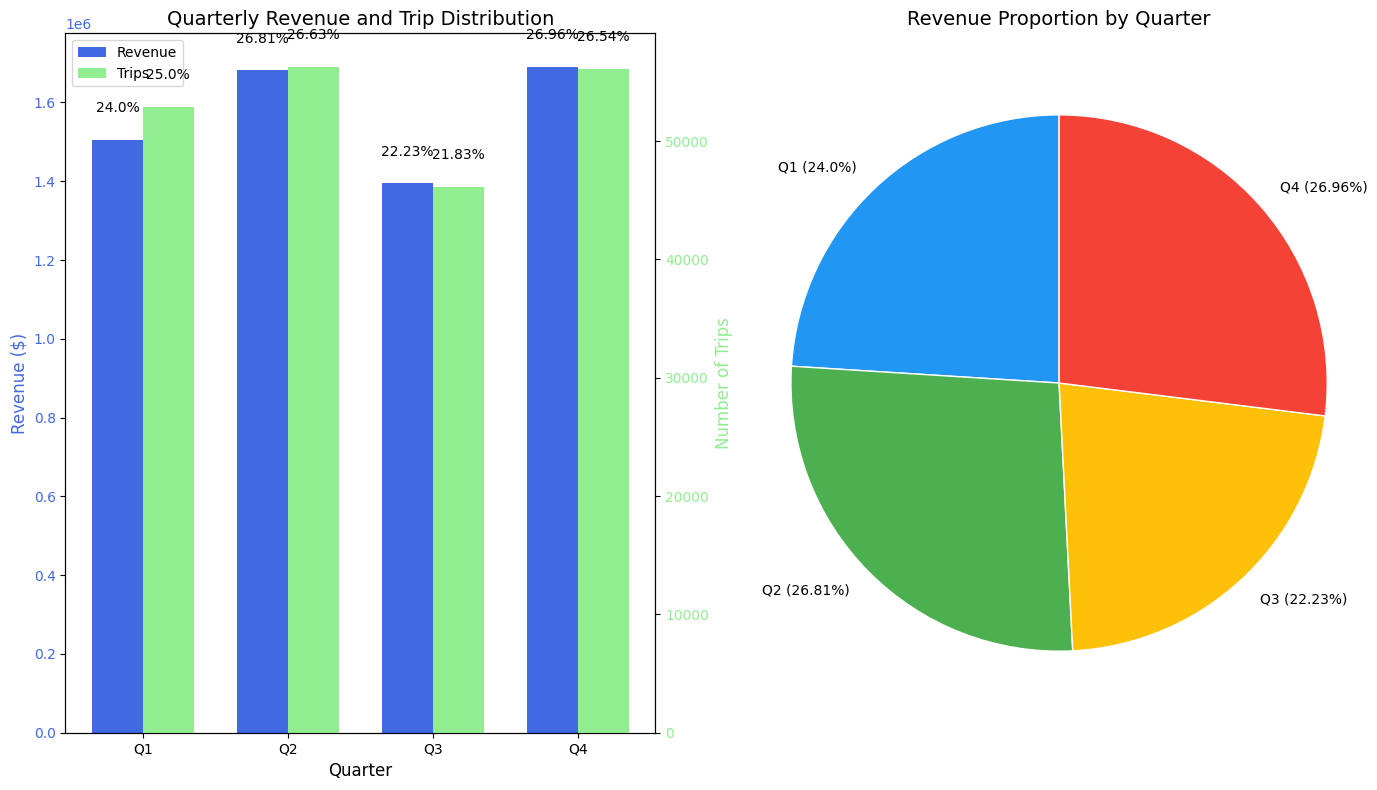


Quarterly Insights:
1. Highest revenue quarter: Q4 ($1,690,912.85, 26.96% of annual revenue)
2. Lowest revenue quarter: Q3 ($1,394,412.42, 22.23% of annual revenue)
3. Revenue difference: $296,500.43 (21.26% higher in Q4 compared to Q3)
4. Average fare range: $28.48 (Q1) to $30.21 (Q3), a 6.07% difference


In [ ]:
# Calculate proportion of each quarter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if we have the necessary columns and the non-zero DataFrame
if 'df_nonzero' in locals() or 'df_nonzero' in globals():
    # Make sure we have the required columns
    if 'tpep_pickup_datetime' in df_nonzero.columns and 'total_amount' in df_nonzero.columns:
        # Ensure pickup_datetime is datetime type
        if not hasattr(df_nonzero['tpep_pickup_datetime'].iloc[0], 'month'):
            df_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime'])

        # Extract month and determine quarter
        df_nonzero['month'] = df_nonzero['tpep_pickup_datetime'].dt.month

        # Map months to quarters
        quarter_map = {
            1: 'Q1', 2: 'Q1', 3: 'Q1',
            4: 'Q2', 5: 'Q2', 6: 'Q2',
            7: 'Q3', 8: 'Q3', 9: 'Q3',
            10: 'Q4', 11: 'Q4', 12: 'Q4'
        }
        df_nonzero['quarter'] = df_nonzero['month'].map(quarter_map)

        # Group by quarter
        quarterly_data = df_nonzero.groupby('quarter').agg({
            'total_amount': 'sum',
            'tpep_pickup_datetime': 'count'
        }).reset_index()

        # Rename columns for clarity
        quarterly_data = quarterly_data.rename(columns={
            'total_amount': 'revenue',
            'tpep_pickup_datetime': 'num_trips'
        })

        # Sort by quarter (Q1, Q2, Q3, Q4)
        quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
        quarterly_data['quarter'] = pd.Categorical(quarterly_data['quarter'], categories=quarter_order, ordered=True)
        quarterly_data = quarterly_data.sort_values('quarter')

        # Calculate percentages
        total_revenue = quarterly_data['revenue'].sum()
        total_trips = quarterly_data['num_trips'].sum()

        quarterly_data['revenue_pct'] = (quarterly_data['revenue'] / total_revenue * 100).round(2)
        quarterly_data['trips_pct'] = (quarterly_data['num_trips'] / total_trips * 100).round(2)
        quarterly_data['avg_fare'] = (quarterly_data['revenue'] / quarterly_data['num_trips']).round(2)

        # Display quarterly breakdown
        print("Quarterly Revenue Analysis (Non-Zero Dataset):")
        print(quarterly_data[['quarter', 'revenue', 'revenue_pct', 'num_trips', 'trips_pct', 'avg_fare']])

        # Visualize quarterly proportions
        plt.figure(figsize=(14, 8))

        # Plot 1: Revenue and Trips by Quarter (Bar Chart)
        plt.subplot(1, 2, 1)

        # Create positions for the bars
        x = range(len(quarterly_data))
        width = 0.35

        # Plot revenue and trip bars
        ax1 = plt.gca()
        ax2 = ax1.twinx()

        bars1 = ax1.bar([i - width/2 for i in x], quarterly_data['revenue'], width, label='Revenue', color='royalblue')
        bars2 = ax2.bar([i + width/2 for i in x], quarterly_data['num_trips'], width, label='Trips', color='lightgreen')

        # Add labels
        ax1.set_xlabel('Quarter', fontsize=12)
        ax1.set_ylabel('Revenue ($)', fontsize=12, color='royalblue')
        ax2.set_ylabel('Number of Trips', fontsize=12, color='lightgreen')
        ax1.set_xticks(x)
        ax1.set_xticklabels(quarterly_data['quarter'])
        ax1.tick_params(axis='y', labelcolor='royalblue')
        ax2.tick_params(axis='y', labelcolor='lightgreen')

        # Add percentage labels
        for i, bar in enumerate(bars1):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + (total_revenue * 0.01),
                    f"{quarterly_data['revenue_pct'].iloc[i]}%",
                    ha='center', va='bottom', fontsize=10)

        for i, bar in enumerate(bars2):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + (total_trips * 0.01),
                    f"{quarterly_data['trips_pct'].iloc[i]}%",
                    ha='center', va='bottom', fontsize=10)

        plt.title('Quarterly Revenue and Trip Distribution', fontsize=14)

        # Create combined legend
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

        # Plot 2: Revenue Distribution Pie Chart
        plt.subplot(1, 2, 2)

        # Prepare labels with percentages
        labels = [f"{q} ({p}%)" for q, p in zip(quarterly_data['quarter'], quarterly_data['revenue_pct'])]

        # Define colors for quarters
        colors = ['#2196F3', '#4CAF50', '#FFC107', '#F44336']

        # Create pie chart
        plt.pie(quarterly_data['revenue'], labels=labels, colors=colors, autopct='', startangle=90,
               wedgeprops={'edgecolor': 'white', 'linewidth': 1})

        # Equal aspect ratio ensures that pie is drawn as a circle
        plt.axis('equal')
        plt.title('Revenue Proportion by Quarter', fontsize=14)

        plt.tight_layout()
        plt.show()

        # Additional analysis
        print("\nQuarterly Insights:")

        # Find highest and lowest quarters
        highest_rev_quarter = quarterly_data.loc[quarterly_data['revenue'].idxmax(), 'quarter']
        highest_rev = quarterly_data.loc[quarterly_data['revenue'].idxmax(), 'revenue']
        highest_pct = quarterly_data.loc[quarterly_data['revenue'].idxmax(), 'revenue_pct']

        lowest_rev_quarter = quarterly_data.loc[quarterly_data['revenue'].idxmin(), 'quarter']
        lowest_rev = quarterly_data.loc[quarterly_data['revenue'].idxmin(), 'revenue']
        lowest_pct = quarterly_data.loc[quarterly_data['revenue'].idxmin(), 'revenue_pct']

        print(f"1. Highest revenue quarter: {highest_rev_quarter} (${highest_rev:,.2f}, {highest_pct}% of annual revenue)")
        print(f"2. Lowest revenue quarter: {lowest_rev_quarter} (${lowest_rev:,.2f}, {lowest_pct}% of annual revenue)")

        # Calculate the difference between highest and lowest quarters
        rev_difference = highest_rev - lowest_rev
        rev_diff_pct = (rev_difference / lowest_rev * 100).round(2)
        print(f"3. Revenue difference: ${rev_difference:,.2f} ({rev_diff_pct}% higher in {highest_rev_quarter} compared to {lowest_rev_quarter})")

        # Look at average fare differences
        highest_avg_quarter = quarterly_data.loc[quarterly_data['avg_fare'].idxmax(), 'quarter']
        highest_avg = quarterly_data.loc[quarterly_data['avg_fare'].idxmax(), 'avg_fare']

        lowest_avg_quarter = quarterly_data.loc[quarterly_data['avg_fare'].idxmin(), 'quarter']
        lowest_avg = quarterly_data.loc[quarterly_data['avg_fare'].idxmin(), 'avg_fare']

        avg_diff_pct = ((highest_avg - lowest_avg) / lowest_avg * 100).round(2)
        print(f"4. Average fare range: ${lowest_avg} ({lowest_avg_quarter}) to ${highest_avg} ({highest_avg_quarter}), a {avg_diff_pct}% difference")
    else:
        print("Required columns (tpep_pickup_datetime, total_amount) not found in the non-zero DataFrame.")
else:
    print("Non-zero DataFrame not found. Please create it first.")

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Using a sample of 10000 records for faster processing
Correlation between fare and duration: 0.8141
Correlation between fare and passengers: 0.0250
Correlation between tip and distance: 0.5278


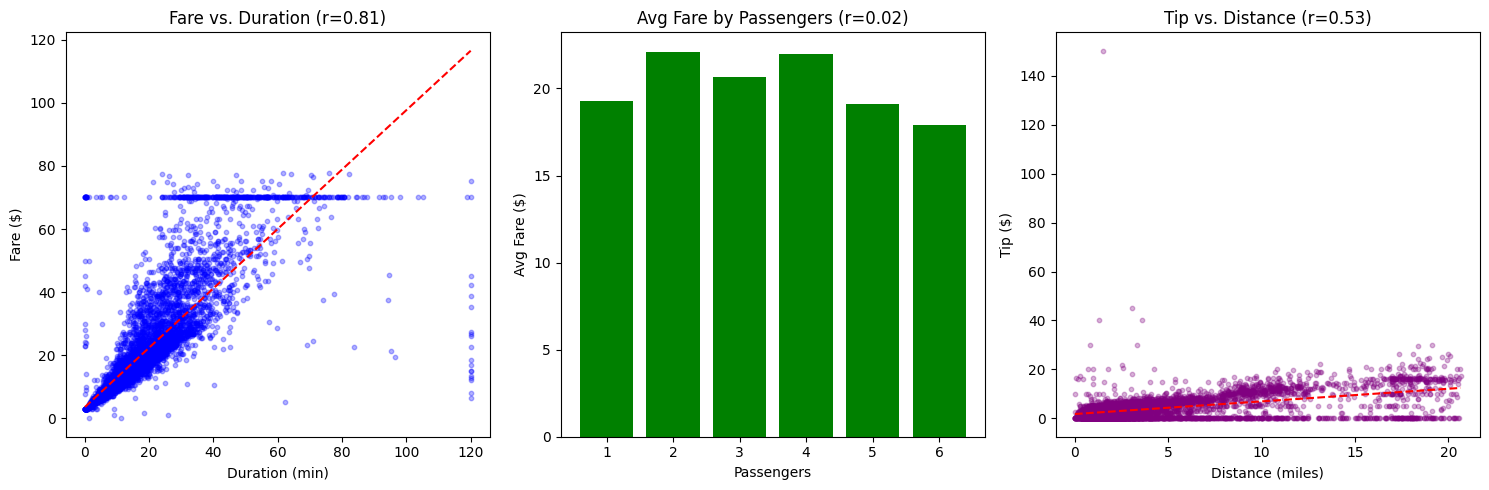

In [ ]:
# Show how trip fare is affected by distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Create a sample if dataset is large (speeds up processing significantly)
sample_size = 10000
if len(df) > sample_size:
    df_sample = df.sample(sample_size, random_state=42)
    print(f"Using a sample of {sample_size} records for faster processing")
else:
    df_sample = df.copy()
    print(f"Using all {len(df_sample)} records")

# Calculate trip duration
if 'tpep_pickup_datetime' in df_sample.columns and 'tpep_dropoff_datetime' in df_sample.columns:
    if not pd.api.types.is_datetime64_dtype(df_sample['tpep_pickup_datetime']):
        df_sample['tpep_pickup_datetime'] = pd.to_datetime(df_sample['tpep_pickup_datetime'])
    if not pd.api.types.is_datetime64_dtype(df_sample['tpep_dropoff_datetime']):
        df_sample['tpep_dropoff_datetime'] = pd.to_datetime(df_sample['tpep_dropoff_datetime'])

    # Calculate trip duration and remove negative durations
    df_sample['trip_duration_min'] = (df_sample['tpep_dropoff_datetime'] -
                                     df_sample['tpep_pickup_datetime']).dt.total_seconds() / 60
    df_sample = df_sample[df_sample['trip_duration_min'] > 0]

    # Cap extreme values for better visualization
    df_sample['trip_duration_min_capped'] = df_sample['trip_duration_min'].clip(upper=120)

# Create a single figure with 3 subplots
plt.figure(figsize=(15, 5))

# 1. Fare amount vs. Trip Duration
if 'fare_amount' in df_sample.columns and 'trip_duration_min' in df_sample.columns:
    # Filter for analysis
    valid_data = df_sample[(df_sample['fare_amount'] > 0) &
                           (df_sample['trip_duration_min'] > 0) &
                           (df_sample['fare_amount'] < df_sample['fare_amount'].quantile(0.99))]

    # Calculate correlation
    corr, _ = pearsonr(valid_data['trip_duration_min_capped'], valid_data['fare_amount'])
    print(f"Correlation between fare and duration: {corr:.4f}")

    # Plot
    plt.subplot(1, 3, 1)
    plt.scatter(valid_data['trip_duration_min_capped'], valid_data['fare_amount'],
                alpha=0.3, s=10, c='blue')

    # Add trend line (using numpy for speed instead of seaborn regplot)
    z = np.polyfit(valid_data['trip_duration_min_capped'], valid_data['fare_amount'], 1)
    p = np.poly1d(z)
    plt.plot(np.sort(valid_data['trip_duration_min_capped']),
             p(np.sort(valid_data['trip_duration_min_capped'])), 'r--')

    plt.title(f'Fare vs. Duration (r={corr:.2f})')
    plt.xlabel('Duration (min)')
    plt.ylabel('Fare ($)')

# 2. Fare amount vs. Passenger Count
if 'fare_amount' in df_sample.columns and 'passenger_count' in df_sample.columns:
    valid_data = df_sample[(df_sample['fare_amount'] > 0) &
                           (df_sample['passenger_count'] > 0) &
                           (df_sample['passenger_count'] <= 6)]

    # Calculate average fare by passenger count (faster than boxplot)
    fare_by_pax = valid_data.groupby('passenger_count')['fare_amount'].mean().reset_index()

    # Calculate correlation
    corr, _ = pearsonr(valid_data['passenger_count'], valid_data['fare_amount'])
    print(f"Correlation between fare and passengers: {corr:.4f}")

    # Plot
    plt.subplot(1, 3, 2)
    plt.bar(fare_by_pax['passenger_count'], fare_by_pax['fare_amount'], color='green')

    plt.title(f'Avg Fare by Passengers (r={corr:.2f})')
    plt.xlabel('Passengers')
    plt.ylabel('Avg Fare ($)')
    plt.xticks(fare_by_pax['passenger_count'])

# 3. Tip amount vs. Trip Distance
if 'tip_amount' in df_sample.columns and 'trip_distance' in df_sample.columns:
    valid_data = df_sample[(df_sample['trip_distance'] > 0) &
                          (df_sample['trip_distance'] < df_sample['trip_distance'].quantile(0.99))]

    # Calculate correlation
    corr, _ = pearsonr(valid_data['trip_distance'], valid_data['tip_amount'])
    print(f"Correlation between tip and distance: {corr:.4f}")

    # Plot
    plt.subplot(1, 3, 3)
    plt.scatter(valid_data['trip_distance'], valid_data['tip_amount'],
                alpha=0.3, s=10, c='purple')

    # Add trend line
    z = np.polyfit(valid_data['trip_distance'], valid_data['tip_amount'], 1)
    p = np.poly1d(z)
    plt.plot(np.sort(valid_data['trip_distance']),
             p(np.sort(valid_data['trip_distance'])), 'r--')

    plt.title(f'Tip vs. Distance (r={corr:.2f})')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Tip ($)')

plt.tight_layout()
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Using a sample of 10000 records for faster processing
Correlation between fare and duration: 0.8141
Correlation between fare and passengers: 0.0250
Correlation between tip and distance: 0.5278


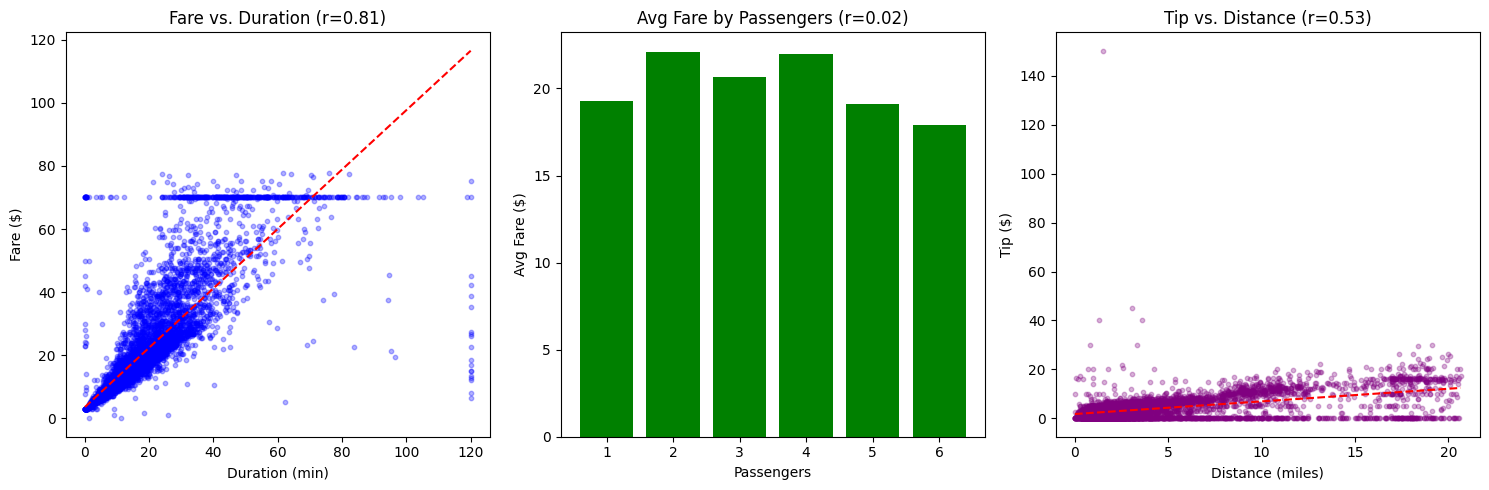

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Create a sample if dataset is large (speeds up processing significantly)
sample_size = 10000
if len(df) > sample_size:
    df_sample = df.sample(sample_size, random_state=42)
    print(f"Using a sample of {sample_size} records for faster processing")
else:
    df_sample = df.copy()
    print(f"Using all {len(df_sample)} records")

# Calculate trip duration
if 'tpep_pickup_datetime' in df_sample.columns and 'tpep_dropoff_datetime' in df_sample.columns:
    if not pd.api.types.is_datetime64_dtype(df_sample['tpep_pickup_datetime']):
        df_sample['tpep_pickup_datetime'] = pd.to_datetime(df_sample['tpep_pickup_datetime'])
    if not pd.api.types.is_datetime64_dtype(df_sample['tpep_dropoff_datetime']):
        df_sample['tpep_dropoff_datetime'] = pd.to_datetime(df_sample['tpep_dropoff_datetime'])

    # Calculate trip duration and remove negative durations
    df_sample['trip_duration_min'] = (df_sample['tpep_dropoff_datetime'] -
                                     df_sample['tpep_pickup_datetime']).dt.total_seconds() / 60
    df_sample = df_sample[df_sample['trip_duration_min'] > 0]

    # Cap extreme values for better visualization
    df_sample['trip_duration_min_capped'] = df_sample['trip_duration_min'].clip(upper=120)

# Create a single figure with 3 subplots
plt.figure(figsize=(15, 5))

# 1. Fare amount vs. Trip Duration
if 'fare_amount' in df_sample.columns and 'trip_duration_min' in df_sample.columns:
    # Filter for analysis
    valid_data = df_sample[(df_sample['fare_amount'] > 0) &
                           (df_sample['trip_duration_min'] > 0) &
                           (df_sample['fare_amount'] < df_sample['fare_amount'].quantile(0.99))]

    # Calculate correlation
    corr, _ = pearsonr(valid_data['trip_duration_min_capped'], valid_data['fare_amount'])
    print(f"Correlation between fare and duration: {corr:.4f}")

    # Plot
    plt.subplot(1, 3, 1)
    plt.scatter(valid_data['trip_duration_min_capped'], valid_data['fare_amount'],
                alpha=0.3, s=10, c='blue')

    # Add trend line (using numpy for speed instead of seaborn regplot)
    z = np.polyfit(valid_data['trip_duration_min_capped'], valid_data['fare_amount'], 1)
    p = np.poly1d(z)
    plt.plot(np.sort(valid_data['trip_duration_min_capped']),
             p(np.sort(valid_data['trip_duration_min_capped'])), 'r--')

    plt.title(f'Fare vs. Duration (r={corr:.2f})')
    plt.xlabel('Duration (min)')
    plt.ylabel('Fare ($)')

# 2. Fare amount vs. Passenger Count
if 'fare_amount' in df_sample.columns and 'passenger_count' in df_sample.columns:
    valid_data = df_sample[(df_sample['fare_amount'] > 0) &
                           (df_sample['passenger_count'] > 0) &
                           (df_sample['passenger_count'] <= 6)]

    # Calculate average fare by passenger count (faster than boxplot)
    fare_by_pax = valid_data.groupby('passenger_count')['fare_amount'].mean().reset_index()

    # Calculate correlation
    corr, _ = pearsonr(valid_data['passenger_count'], valid_data['fare_amount'])
    print(f"Correlation between fare and passengers: {corr:.4f}")

    # Plot
    plt.subplot(1, 3, 2)
    plt.bar(fare_by_pax['passenger_count'], fare_by_pax['fare_amount'], color='green')

    plt.title(f'Avg Fare by Passengers (r={corr:.2f})')
    plt.xlabel('Passengers')
    plt.ylabel('Avg Fare ($)')
    plt.xticks(fare_by_pax['passenger_count'])

# 3. Tip amount vs. Trip Distance
if 'tip_amount' in df_sample.columns and 'trip_distance' in df_sample.columns:
    valid_data = df_sample[(df_sample['trip_distance'] > 0) &
                          (df_sample['trip_distance'] < df_sample['trip_distance'].quantile(0.99))]

    # Calculate correlation
    corr, _ = pearsonr(valid_data['trip_distance'], valid_data['tip_amount'])
    print(f"Correlation between tip and distance: {corr:.4f}")

    # Plot
    plt.subplot(1, 3, 3)
    plt.scatter(valid_data['trip_distance'], valid_data['tip_amount'],
                alpha=0.3, s=10, c='purple')

    # Add trend line
    z = np.polyfit(valid_data['trip_distance'], valid_data['tip_amount'], 1)
    p = np.poly1d(z)
    plt.plot(np.sort(valid_data['trip_distance']),
             p(np.sort(valid_data['trip_distance'])), 'r--')

    plt.title(f'Tip vs. Distance (r={corr:.2f})')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Tip ($)')

plt.tight_layout()
plt.show()

Using a sample of 30000 records for faster processing
Correlation between fare_amount and passenger_count: 0.0368
P-value: 2.1972e-10


<ipython-input-42-babebe8b8064>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='passenger_count', y='fare_amount', data=valid_data, palette='Blues')


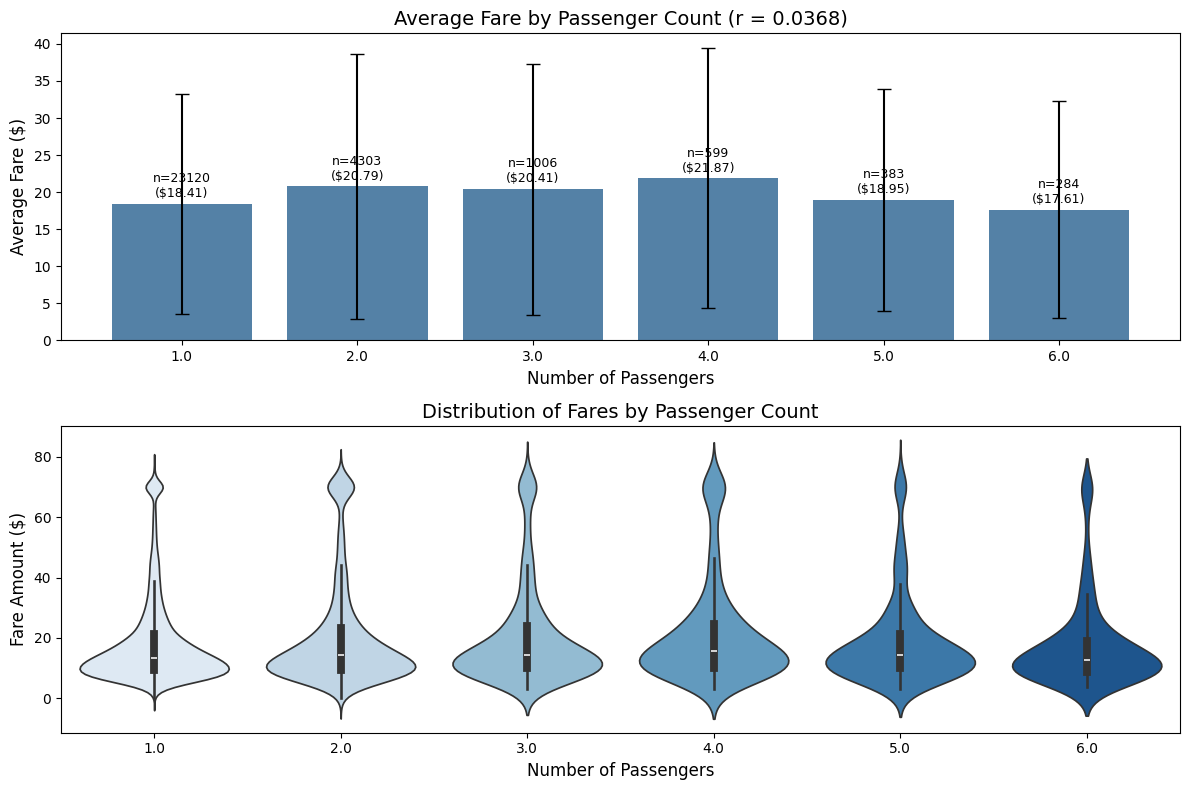


Detailed Analysis:
1. Solo rides (1 passenger): $18.41 average fare
2. Group rides (2+ passengers): $20.59 average fare
   Group rides are 11.8% more expensive than solo rides

3. Fares do NOT consistently increase with more passengers

4. Average fare per passenger:
   1.0 passenger(s): $18.41 per person
   2.0 passenger(s): $10.40 per person
   3.0 passenger(s): $6.80 per person
   4.0 passenger(s): $5.47 per person
   5.0 passenger(s): $3.79 per person
   6.0 passenger(s): $2.94 per person

5. Most cost-efficient: 6.0 passenger(s) ($2.94 per person)


In [ ]:
# Show relationship between fare and number of passengers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Create a sample if dataset is large
sample_size = 30000
if len(df) > sample_size:
    df_sample = df.sample(sample_size, random_state=42)
    print(f"Using a sample of {sample_size} records for faster processing")
else:
    df_sample = df.copy()
    print(f"Using all {len(df_sample)} records")

# Check if we have the required columns
if 'fare_amount' in df_sample.columns and 'passenger_count' in df_sample.columns:
    # Filter for valid data
    valid_data = df_sample[(df_sample['fare_amount'] > 0) &
                           (df_sample['passenger_count'] > 0) &
                           (df_sample['passenger_count'] <= 6) &
                           (df_sample['fare_amount'] < df_sample['fare_amount'].quantile(0.99))]

    # Calculate correlation
    corr, p_value = pearsonr(valid_data['passenger_count'], valid_data['fare_amount'])
    print(f"Correlation between fare_amount and passenger_count: {corr:.4f}")
    print(f"P-value: {p_value:.4e}")

    # Create visualization
    plt.figure(figsize=(12, 8))

    # Plot 1: Average fare by passenger count
    plt.subplot(2, 1, 1)

    # Calculate stats by passenger count
    fare_by_passengers = valid_data.groupby('passenger_count')['fare_amount'].agg(
        ['mean', 'median', 'count', 'std']).reset_index()

    # Create bar chart
    sns.barplot(x='passenger_count', y='mean', data=fare_by_passengers, color='steelblue')

    # Add error bars
    plt.errorbar(x=range(len(fare_by_passengers)),
                 y=fare_by_passengers['mean'],
                 yerr=fare_by_passengers['std'],
                 fmt='none', color='black', capsize=5)

    # Add count labels
    for i, row in enumerate(fare_by_passengers.itertuples()):
        plt.text(i, row.mean + 0.5, f"n={row.count}\n(${row.mean:.2f})",
                ha='center', va='bottom', fontsize=9)

    plt.title(f'Average Fare by Passenger Count (r = {corr:.4f})', fontsize=14)
    plt.xlabel('Number of Passengers', fontsize=12)
    plt.ylabel('Average Fare ($)', fontsize=12)
    plt.xticks(range(len(fare_by_passengers)), fare_by_passengers['passenger_count'])

    # Plot 2: Distribution of fares by passenger count
    plt.subplot(2, 1, 2)

    # Create violin plot
    sns.violinplot(x='passenger_count', y='fare_amount', data=valid_data, palette='Blues')

    plt.title('Distribution of Fares by Passenger Count', fontsize=14)
    plt.xlabel('Number of Passengers', fontsize=12)
    plt.ylabel('Fare Amount ($)', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Additional analysis
    print("\nDetailed Analysis:")

    # Compare solo vs group rides
    solo_rides = valid_data[valid_data['passenger_count'] == 1]
    group_rides = valid_data[valid_data['passenger_count'] > 1]

    solo_avg_fare = solo_rides['fare_amount'].mean()
    group_avg_fare = group_rides['fare_amount'].mean()

    print(f"1. Solo rides (1 passenger): ${solo_avg_fare:.2f} average fare")
    print(f"2. Group rides (2+ passengers): ${group_avg_fare:.2f} average fare")

    diff_pct = ((group_avg_fare / solo_avg_fare) - 1) * 100
    if diff_pct > 0:
        print(f"   Group rides are {diff_pct:.1f}% more expensive than solo rides")
    else:
        print(f"   Group rides are {abs(diff_pct):.1f}% less expensive than solo rides")

    # Check if fare increases with passenger count
    sorted_fares = fare_by_passengers.sort_values('passenger_count')
    is_monotonic = sorted_fares['mean'].is_monotonic_increasing

    if is_monotonic:
        print("\n3. Fares consistently increase with more passengers")
    else:
        print("\n3. Fares do NOT consistently increase with more passengers")

    # Calculate the average fare per passenger
    fare_by_passengers['fare_per_passenger'] = fare_by_passengers['mean'] / fare_by_passengers['passenger_count']

    print("\n4. Average fare per passenger:")
    for _, row in fare_by_passengers.iterrows():
        print(f"   {row['passenger_count']} passenger(s): ${row['fare_per_passenger']:.2f} per person")

    most_efficient = fare_by_passengers.loc[fare_by_passengers['fare_per_passenger'].idxmin()]
    print(f"\n5. Most cost-efficient: {most_efficient['passenger_count']} passenger(s) " +
          f"(${most_efficient['fare_per_passenger']:.2f} per person)")

else:
    print("Required columns (fare_amount, passenger_count) not found in DataFrame")


Using a sample of 30000 records for faster processing
Correlation between tip_amount and trip_distance: 0.5698
P-value: 0.0000e+00


<ipython-input-43-e61a939786aa>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['tip_percentage'] = np.where(
<ipython-input-43-e61a939786aa>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['distance_bin'] = pd.cut(valid_data['trip_distance'], bins=bins, labels=labels)
<ipython-input-43-e61a939786aa>:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tru

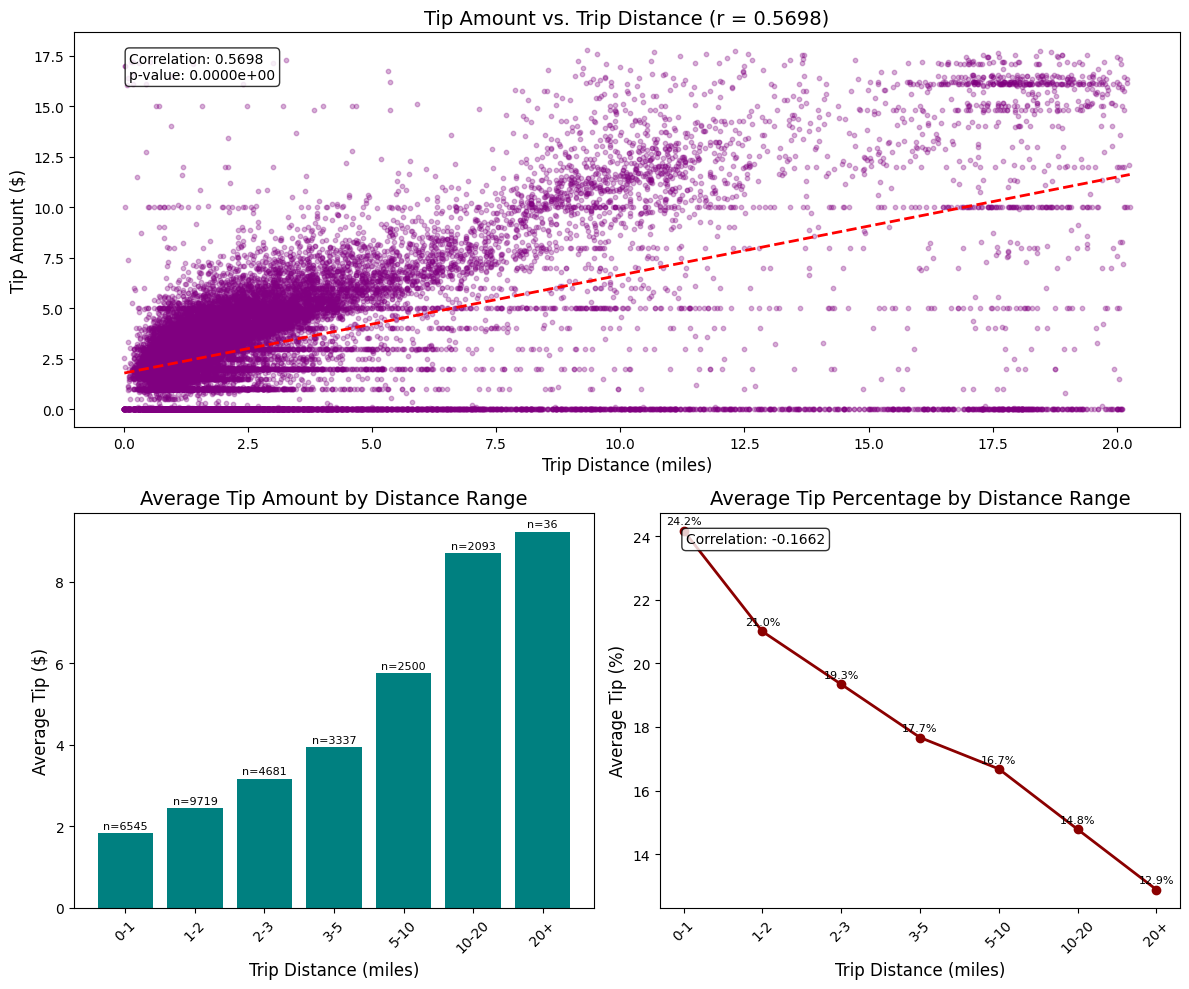


Tip and Distance Analysis:
1. Short trips (≤3 miles): $2.41 average tip
2. Long trips (>3 miles): $5.79 average tip
   Long trips receive 140.4% higher tips than short trips

3. Average tip percentage for short trips: 21.62%
4. Average tip percentage for long trips: 16.58%
   Short trips receive 5.04 percentage points higher tip rates

5. Average tip percentage for card payments: 24.65%
6. Average tip percentage for cash payments: 0.00%

7. Correlation for card payments only: 0.7315


In [ ]:
# Show relationship between tip and trip distance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Create a sample if dataset is large
sample_size = 30000
if len(df) > sample_size:
    df_sample = df.sample(sample_size, random_state=42)
    print(f"Using a sample of {sample_size} records for faster processing")
else:
    df_sample = df.copy()
    print(f"Using all {len(df_sample)} records")

# Check if we have the required columns
if 'tip_amount' in df_sample.columns and 'trip_distance' in df_sample.columns:
    # Filter for valid data (non-zero distance and remove extreme outliers)
    valid_data = df_sample[(df_sample['trip_distance'] > 0) &
                          (df_sample['trip_distance'] < df_sample['trip_distance'].quantile(0.99)) &
                          (df_sample['tip_amount'] < df_sample['tip_amount'].quantile(0.99))]

    # Calculate correlation
    corr, p_value = pearsonr(valid_data['trip_distance'], valid_data['tip_amount'])
    print(f"Correlation between tip_amount and trip_distance: {corr:.4f}")
    print(f"P-value: {p_value:.4e}")

    # Calculate tip percentage if fare_amount is available
    if 'fare_amount' in valid_data.columns:
        valid_data['tip_percentage'] = np.where(
            valid_data['fare_amount'] > 0,
            (valid_data['tip_amount'] / valid_data['fare_amount']) * 100,
            0
        )

        # Create distance bins for analysis
        bins = [0, 1, 2, 3, 5, 10, 20, np.inf]
        labels = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20+']
        valid_data['distance_bin'] = pd.cut(valid_data['trip_distance'], bins=bins, labels=labels)

        # Aggregate by distance bin
        tip_by_distance = valid_data.groupby('distance_bin').agg({
            'tip_amount': ['mean', 'median', 'count'],
            'tip_percentage': 'mean',
            'trip_distance': 'mean'
        }).reset_index()

        # Flatten the multi-level columns
        tip_by_distance.columns = ['distance_bin', 'mean_tip', 'median_tip', 'count', 'mean_tip_pct', 'mean_distance']

    # Create visualizations
    plt.figure(figsize=(12, 10))

    # Plot 1: Scatter plot with trend line
    plt.subplot(2, 1, 1)
    plt.scatter(valid_data['trip_distance'], valid_data['tip_amount'], alpha=0.3, s=10, c='purple')

    # Add trend line using numpy (faster than seaborn)
    z = np.polyfit(valid_data['trip_distance'], valid_data['tip_amount'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(valid_data['trip_distance'].min(), valid_data['trip_distance'].max(), 100)
    plt.plot(x_trend, p(x_trend), 'r--', linewidth=2)

    plt.title(f'Tip Amount vs. Trip Distance (r = {corr:.4f})', fontsize=14)
    plt.xlabel('Trip Distance (miles)', fontsize=12)
    plt.ylabel('Tip Amount ($)', fontsize=12)

    # Add a text box with correlation info
    plt.text(0.05, 0.95, f'Correlation: {corr:.4f}\np-value: {p_value:.4e}',
             transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # If we have tip percentage data, show that too
    if 'fare_amount' in valid_data.columns:
        # Plot 2: Bar chart of average tip by distance bin
        plt.subplot(2, 2, 3)
        plt.bar(range(len(tip_by_distance)), tip_by_distance['mean_tip'], color='teal')
        plt.xticks(range(len(tip_by_distance)), tip_by_distance['distance_bin'], rotation=45)

        # Add count labels
        for i, row in enumerate(tip_by_distance.itertuples()):
            plt.text(i, row.mean_tip + 0.1, f"n={row.count}", ha='center', fontsize=8)

        plt.title('Average Tip Amount by Distance Range', fontsize=14)
        plt.xlabel('Trip Distance (miles)', fontsize=12)
        plt.ylabel('Average Tip ($)', fontsize=12)

        # Plot 3: Line chart of tip percentage by distance
        plt.subplot(2, 2, 4)
        plt.plot(range(len(tip_by_distance)), tip_by_distance['mean_tip_pct'], 'o-', color='darkred', linewidth=2)
        plt.xticks(range(len(tip_by_distance)), tip_by_distance['distance_bin'], rotation=45)

        # Add percentage labels
        for i, row in enumerate(tip_by_distance.itertuples()):
            plt.text(i, row.mean_tip_pct + 0.2, f"{row.mean_tip_pct:.1f}%", ha='center', fontsize=8)

        plt.title('Average Tip Percentage by Distance Range', fontsize=14)
        plt.xlabel('Trip Distance (miles)', fontsize=12)
        plt.ylabel('Average Tip (%)', fontsize=12)

        # Calculate correlation between distance and tip percentage
        tip_pct_corr, tip_pct_p = pearsonr(valid_data['trip_distance'], valid_data['tip_percentage'])
        plt.text(0.05, 0.95, f'Correlation: {tip_pct_corr:.4f}',
                transform=plt.gca().transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Additional analysis
    print("\nTip and Distance Analysis:")

    # Short vs long trips
    short_trips = valid_data[valid_data['trip_distance'] <= 3]
    long_trips = valid_data[valid_data['trip_distance'] > 3]

    short_avg_tip = short_trips['tip_amount'].mean()
    long_avg_tip = long_trips['tip_amount'].mean()

    print(f"1. Short trips (≤3 miles): ${short_avg_tip:.2f} average tip")
    print(f"2. Long trips (>3 miles): ${long_avg_tip:.2f} average tip")

    tip_diff_pct = ((long_avg_tip / short_avg_tip) - 1) * 100
    print(f"   Long trips receive {tip_diff_pct:.1f}% higher tips than short trips")

    # Tip percentage analysis if available
    if 'fare_amount' in valid_data.columns:
        short_tip_pct = short_trips['tip_percentage'].mean()
        long_tip_pct = long_trips['tip_percentage'].mean()

        print(f"\n3. Average tip percentage for short trips: {short_tip_pct:.2f}%")
        print(f"4. Average tip percentage for long trips: {long_tip_pct:.2f}%")

        pct_diff = long_tip_pct - short_tip_pct
        if pct_diff > 0:
            print(f"   Long trips receive {pct_diff:.2f} percentage points higher tip rates")
        else:
            print(f"   Short trips receive {abs(pct_diff):.2f} percentage points higher tip rates")

        # Payment method analysis if available
        if 'payment_type' in valid_data.columns:
            card_payments = valid_data[valid_data['payment_type'] == 1]
            cash_payments = valid_data[valid_data['payment_type'] == 2]

            if len(card_payments) > 0 and len(cash_payments) > 0:
                card_tip_pct = card_payments['tip_percentage'].mean()
                cash_tip_pct = cash_payments['tip_percentage'].mean()

                print(f"\n5. Average tip percentage for card payments: {card_tip_pct:.2f}%")
                print(f"6. Average tip percentage for cash payments: {cash_tip_pct:.2f}%")

                # Check correlation specifically for card payments
                card_corr, _ = pearsonr(card_payments['trip_distance'], card_payments['tip_amount'])
                print(f"\n7. Correlation for card payments only: {card_corr:.4f}")
else:
    print("Required columns (tip_amount, trip_distance) not found in DataFrame")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
               Count  Percentage       Method
payment_type                                 
1             225881       82.15  Credit Card
2              45837       16.67         Cash
3               1265        0.46    No Charge
4               1980        0.72      Dispute


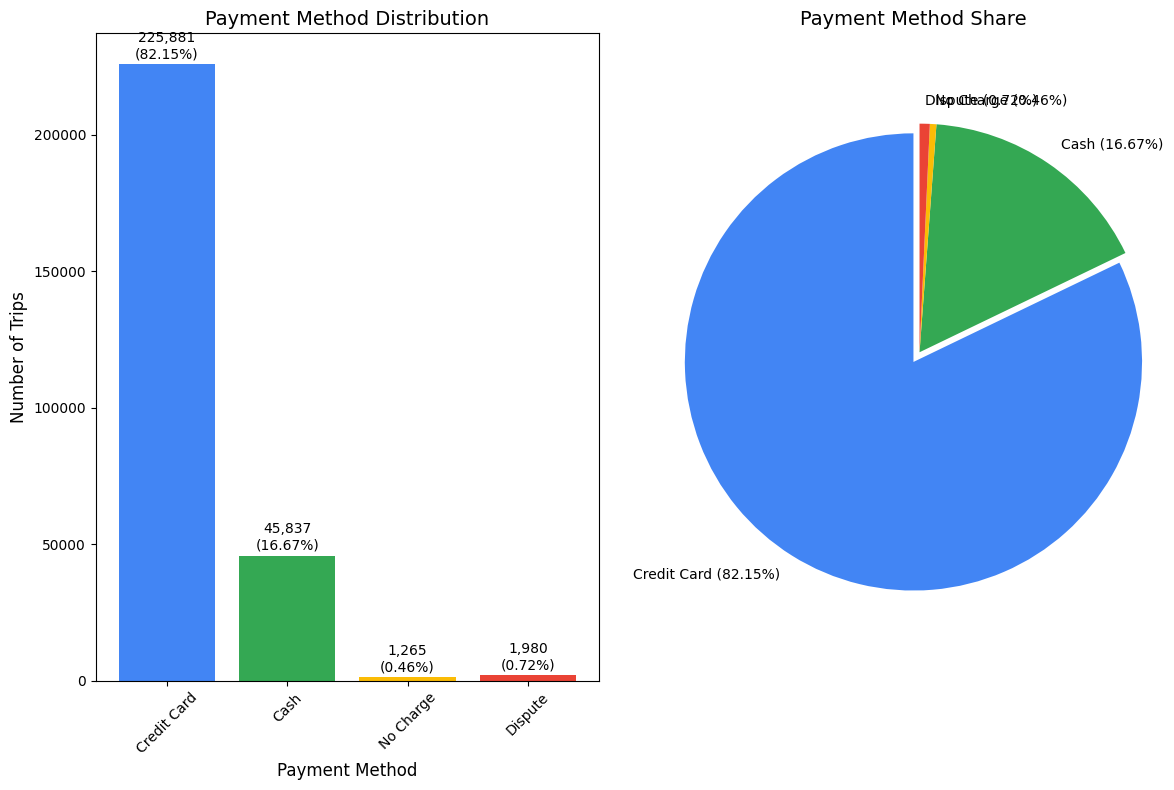


Payment Method Insights:
1. Most common payment method: Credit Card (82.15% of trips)
2. Credit card payments: 225,881 (82.15%)
3. Cash payments: 45,837 (16.67%)
4. Credit card to cash ratio: 4.93 to 1
5. Unusual payment types (not cash or credit): 3,245 (1.18%)
   - No Charge: 1,265 (0.46%)
   - Dispute: 1,980 (0.72%)

Average fare by payment method:
- Credit Card: $19.81
- Cash: $19.62
- No Charge: $16.60
- Dispute: $21.05

Statistical comparison of fares (Credit Card vs Cash):
- Credit Card average: $19.81
- Cash average: $19.62
- Difference is not statistically significant (p=0.0527)


In [ ]:
# Analyse the distribution of different payment types (payment_type).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check if payment_type exists in the DataFrame
if 'payment_type' in df.columns:
    # Get payment type counts
    payment_counts = df['payment_type'].value_counts().sort_index()
    total_trips = len(df)

    # Create percentages
    payment_pcts = (payment_counts / total_trips * 100).round(2)

    # Create a DataFrame for better display
    payment_data = pd.DataFrame({
        'Count': payment_counts,
        'Percentage': payment_pcts
    })

    # Add payment method names based on NYC TLC data dictionary
    payment_names = {
        1: 'Credit Card',
        2: 'Cash',
        3: 'No Charge',
        4: 'Dispute',
        5: 'Unknown',
        6: 'Voided Trip'
    }

    # Map names to index
    payment_data['Method'] = payment_data.index.map(
        lambda x: payment_names.get(x, f'Type {x}')
    )

    # Display the distribution
    print("Payment Type Distribution:")
    print(payment_data)

    # Create visualization
    plt.figure(figsize=(12, 8))

    # Plot 1: Bar chart
    plt.subplot(1, 2, 1)
    colors = ['#4285F4', '#34A853', '#FBBC05', '#EA4335', '#9C27B0', '#FF5722']

    # Ensure we have enough colors
    if len(payment_counts) > len(colors):
        colors = colors * (len(payment_counts) // len(colors) + 1)

    bars = plt.bar(
        payment_data['Method'],
        payment_data['Count'],
        color=colors[:len(payment_counts)]
    )

    plt.title('Payment Method Distribution', fontsize=14)
    plt.xlabel('Payment Method', fontsize=12)
    plt.ylabel('Number of Trips', fontsize=12)
    plt.xticks(rotation=45)

    # Add count and percentage labels to bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2.,
            height + (max(payment_counts) * 0.01),
            f"{payment_counts.iloc[i]:,}\n({payment_pcts.iloc[i]}%)",
            ha='center',
            fontsize=10
        )

    # Plot 2: Pie chart
    plt.subplot(1, 2, 2)

    # Create labels with percentages
    labels = [f"{method} ({pct}%)" for method, pct in
              zip(payment_data['Method'], payment_data['Percentage'])]

    plt.pie(
        payment_data['Count'],
        labels=labels if len(payment_data) <= 5 else None,  # Only show labels if few categories
        colors=colors[:len(payment_counts)],
        autopct='' if len(payment_data) <= 5 else '%1.1f%%',
        startangle=90,
        shadow=False,
        explode=[0.05 if i == payment_counts.idxmax() else 0 for i in payment_counts.index]
    )

    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.title('Payment Method Share', fontsize=14)

    # Add legend if we have many categories
    if len(payment_data) > 5:
        plt.legend(labels, loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

    # Additional analysis
    print("\nPayment Method Insights:")

    # Most common payment method
    most_common = payment_data.loc[payment_counts.idxmax()]
    print(f"1. Most common payment method: {most_common['Method']} "
          f"({most_common['Percentage']}% of trips)")

    # Cash vs. Card comparison
    if 1 in payment_counts.index and 2 in payment_counts.index:
        card_count = payment_counts[1]
        cash_count = payment_counts[2]
        card_pct = payment_pcts[1]
        cash_pct = payment_pcts[2]

        print(f"2. Credit card payments: {card_count:,} ({card_pct}%)")
        print(f"3. Cash payments: {cash_count:,} ({cash_pct}%)")

        ratio = card_count / cash_count if cash_count > 0 else float('inf')
        print(f"4. Credit card to cash ratio: {ratio:.2f} to 1")

    # Unusual payment types
    unusual = payment_data[~payment_data.index.isin([1, 2])]
    if not unusual.empty:
        unusual_total = unusual['Count'].sum()
        unusual_pct = (unusual_total / total_trips * 100).round(2)
        print(f"5. Unusual payment types (not cash or credit): {unusual_total:,} ({unusual_pct}%)")

        for idx, row in unusual.iterrows():
            print(f"   - {row['Method']}: {row['Count']:,} ({row['Percentage']}%)")

    # Further insights based on payment type
    if 'fare_amount' in df.columns:
        payment_fare = df.groupby('payment_type')['fare_amount'].mean().reindex(payment_counts.index)

        print("\nAverage fare by payment method:")
        for i, avg_fare in enumerate(payment_fare):
            if i < len(payment_data):
                print(f"- {payment_data['Method'].iloc[i]}: ${avg_fare:.2f}")

        # Statistical test for fare differences between payment types
        if 1 in df['payment_type'].values and 2 in df['payment_type'].values:
            from scipy.stats import ttest_ind

            card_fares = df[df['payment_type'] == 1]['fare_amount']
            cash_fares = df[df['payment_type'] == 2]['fare_amount']

            t_stat, p_value = ttest_ind(card_fares, cash_fares, equal_var=False)

            print(f"\nStatistical comparison of fares (Credit Card vs Cash):")
            print(f"- Credit Card average: ${card_fares.mean():.2f}")
            print(f"- Cash average: ${cash_fares.mean():.2f}")
            print(f"- Difference is {'statistically significant' if p_value < 0.05 else 'not statistically significant'} "
                  f"(p={p_value:.4f})")
else:
    print("payment_type column not found in the DataFrame")


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

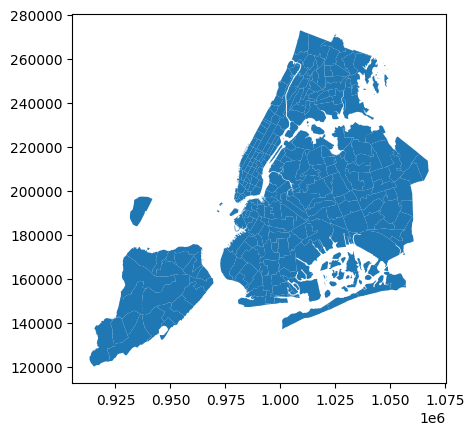

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

Successfully merged trip counts with zones
Number of zones with data: 237
Number of zones with no trips: 26


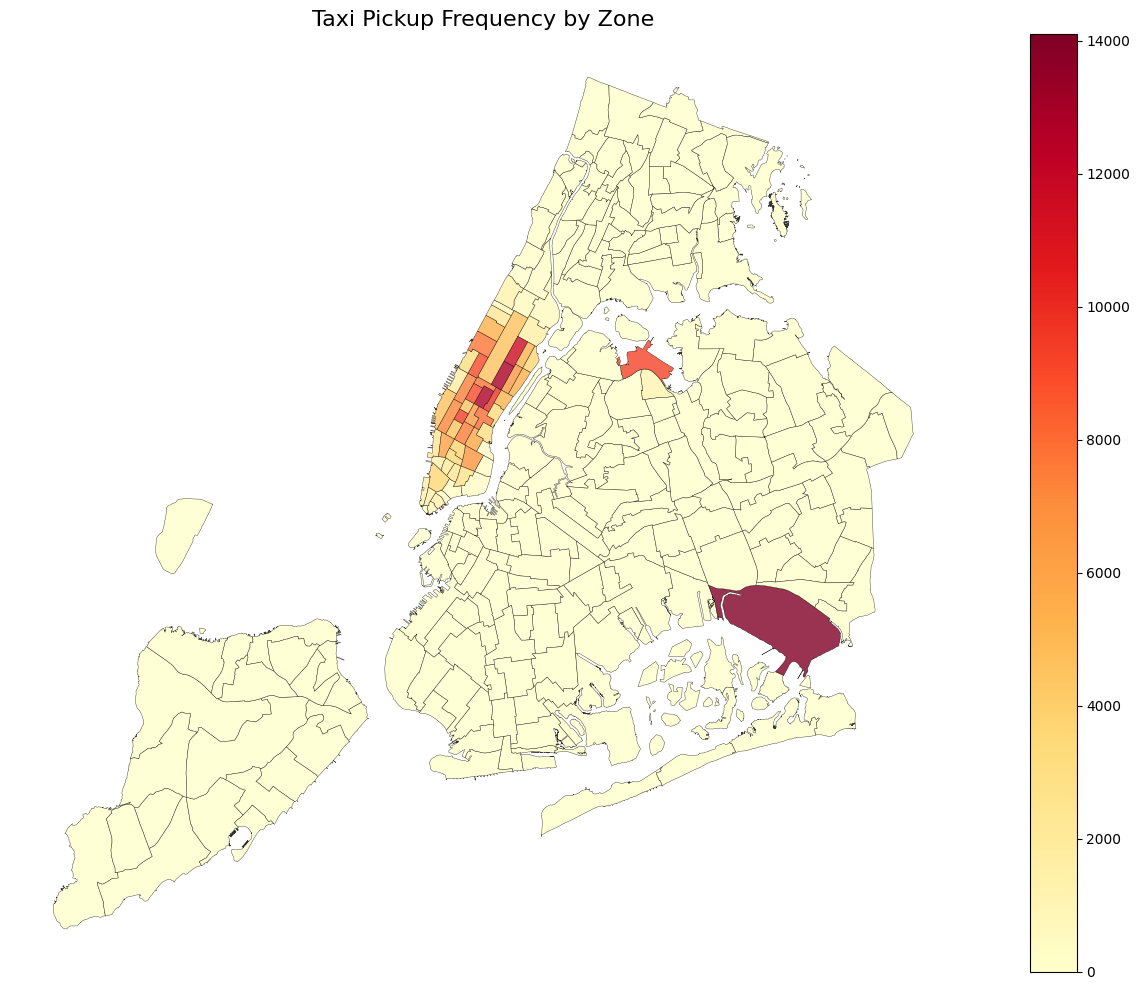


Top 10 Pickup Zones:
- JFK Airport (Queens): 14,096 pickups
- Upper East Side South (Manhattan): 12,790 pickups
- Midtown Center (Manhattan): 12,765 pickups
- Upper East Side North (Manhattan): 11,580 pickups
- Midtown East (Manhattan): 9,776 pickups
- Penn Station/Madison Sq West (Manhattan): 9,385 pickups
- LaGuardia Airport (Queens): 9,249 pickups
- Lincoln Square East (Manhattan): 9,011 pickups
- Times Sq/Theatre District (Manhattan): 8,936 pickups
- Murray Hill (Manhattan): 7,965 pickups


In [ ]:
# First, install the missing package
!pip install mapclassify>=2.4.0

# Now try again with a modified approach
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'zones' is your GeoDataFrame and 'df' is your taxi trip DataFrame

# Group by pickup location to get counts
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'trip_count']

# Convert LocationID to integer if it's not already
zones['LocationID'] = zones['LocationID'].astype(int)
pickup_counts['LocationID'] = pickup_counts['LocationID'].astype(int)

# Merge the counts with the zone geometry
zone_trips = zones.merge(pickup_counts, on='LocationID', how='left')

# Fill NaN values with 0 (zones with no pickups)
zone_trips['trip_count'] = zone_trips['trip_count'].fillna(0)

print(f"Successfully merged trip counts with zones")
print(f"Number of zones with data: {len(zone_trips[zone_trips['trip_count'] > 0])}")
print(f"Number of zones with no trips: {len(zone_trips[zone_trips['trip_count'] == 0])}")

# Create a choropleth map of pickup counts by zone
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot with a simple quantile-based classification
# This approach doesn't require mapclassify
zone_trips.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    cmap='YlOrRd',
    edgecolor='black',
    linewidth=0.3,
    alpha=0.8
)

# Add title and labels
plt.title('Taxi Pickup Frequency by Zone', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Remove axes for cleaner map
ax.set_axis_off()

plt.tight_layout()
plt.show()

# Additional analysis: find top pickup zones
if 'zone' in zone_trips.columns or 'Zone' in zone_trips.columns:
    zone_col = 'zone' if 'zone' in zone_trips.columns else 'Zone'
    borough_col = 'borough' if 'borough' in zone_trips.columns else 'Borough'

    top_zones = zone_trips.sort_values('trip_count', ascending=False).head(10)
    print("\nTop 10 Pickup Zones:")
    for idx, row in top_zones.iterrows():
        zone_name = row.get(zone_col, 'Unknown')
        borough = row.get(borough_col, 'Unknown')
        print(f"- {zone_name} ({borough}): {int(row['trip_count']):,} pickups")
else:
    # If we don't have zone names, just show the location IDs
    top_zones = zone_trips.sort_values('trip_count', ascending=False).head(10)
    print("\nTop 10 Pickup Locations by ID:")
    for idx, row in top_zones.iterrows():
        print(f"- Location ID {row['LocationID']}: {int(row['trip_count']):,} pickups")

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

Total number of unique pickup locations: 238
Total number of trips: 274,963

Top 10 pickup locations:
   PULocationID  trip_count  percentage
0           132       14096        5.13
1           237       12790        4.65
2           161       12765        4.64
3           236       11580        4.21
4           162        9776        3.56
5           186        9385        3.41
6           138        9249        3.36
7           142        9011        3.28
8           230        8936        3.25
9           170        7965        2.90

Bottom 10 pickup locations:
     PULocationID  trip_count  percentage
228            31           1         0.0
229           183           1         0.0
230            73           1         0.0
231           204           1         0.0
232           253           1         0.0
233           120           1         0.0
234           221           1         0.0
235            96           1         0.0
236           187           1         0.0
237      

<ipython-input-50-1e63c69d2851>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='PULocationID', y='trip_count', data=top_20, palette='viridis')


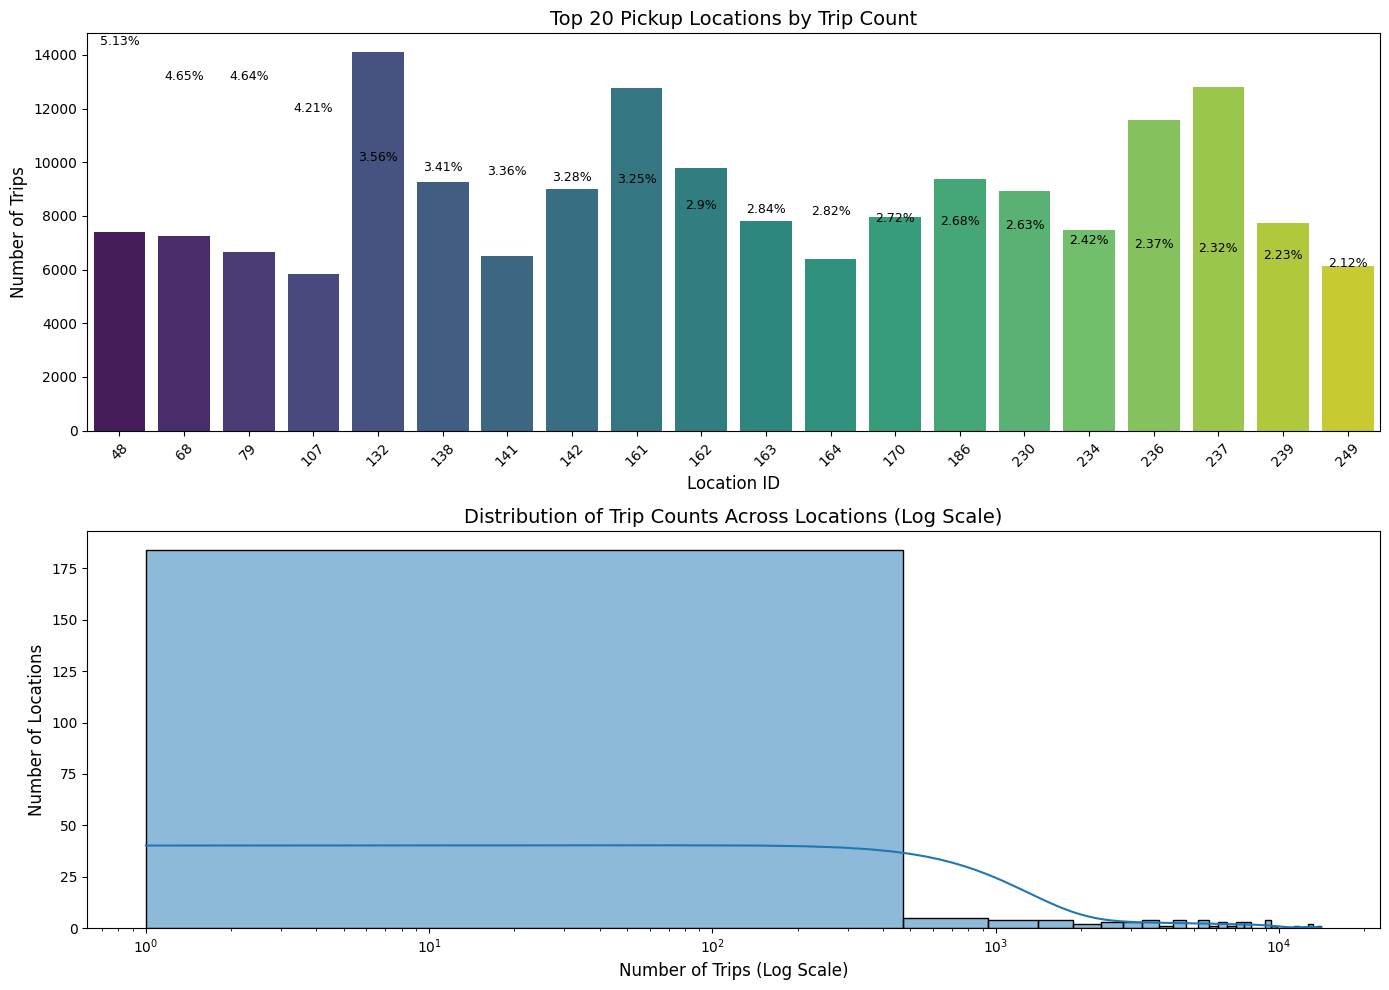


Top 10 locations by revenue:
     PULocationID  total_revenue   avg_fare  trip_count
114           132      890011.36  63.139285       14096
120           138      398811.47  43.119415        9249
142           161      212728.05  16.664947       12765
205           230      172688.40  19.325022        8936
212           237      170193.51  13.306764       12790
164           186      163412.54  17.412098        9385
211           236      158485.76  13.686162       11580
143           162      155444.56  15.900630        9776
124           142      131288.54  14.569808        9011
144           163      130635.12  16.735219        7806

Top 10 locations by average fare:
     PULocationID    avg_fare  trip_count
94            109  120.000000           1
0               1   93.696216          37
26             31   90.000000           1
237           265   79.177560         209
194           219   72.600588          34
106           124   71.588889           9
225           253   70.00

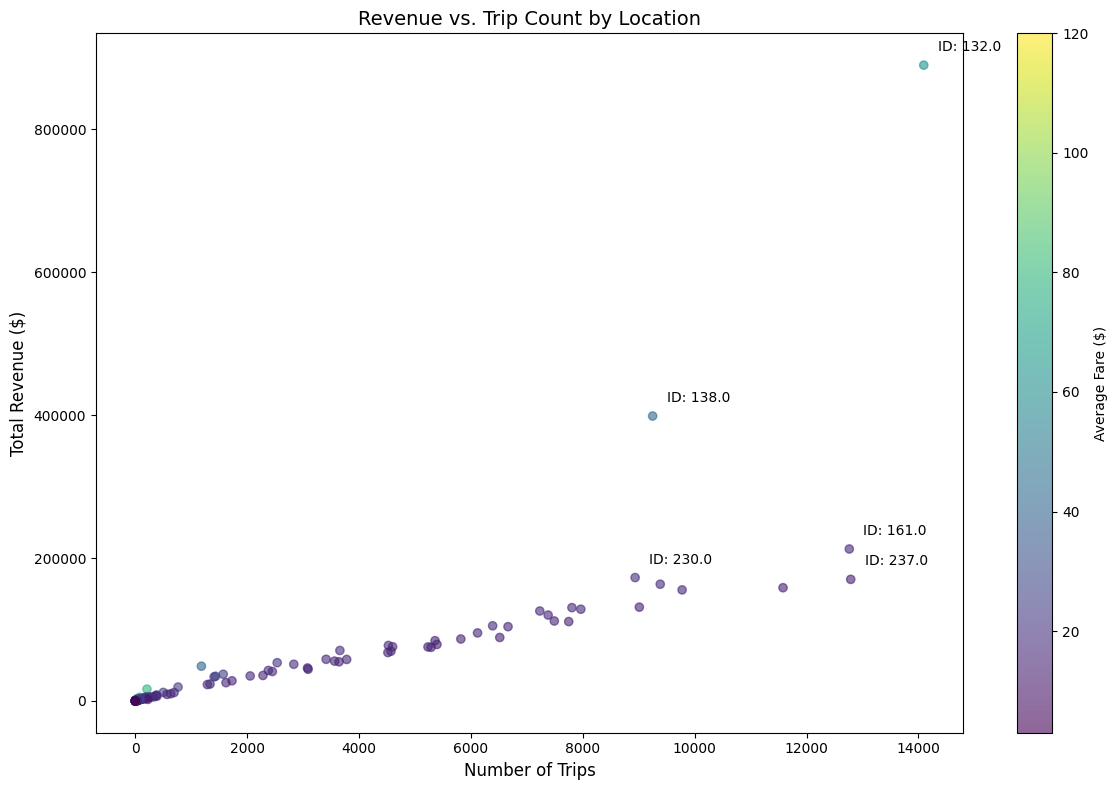

In [ ]:
# Group data by location and calculate the number of trips
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check if PULocationID is in the DataFrame
if 'PULocationID' in df.columns:
    # Group by pickup location
    location_trips = df['PULocationID'].value_counts().reset_index()
    location_trips.columns = ['PULocationID', 'trip_count']

    # Calculate percentage of total trips
    total_trips = len(df)
    location_trips['percentage'] = (location_trips['trip_count'] / total_trips * 100).round(2)

    # Sort by trip count descending
    location_trips = location_trips.sort_values('trip_count', ascending=False)

    print(f"Total number of unique pickup locations: {len(location_trips)}")
    print(f"Total number of trips: {total_trips:,}")

    # Display top and bottom locations
    print("\nTop 10 pickup locations:")
    print(location_trips.head(10))

    print("\nBottom 10 pickup locations:")
    print(location_trips.tail(10))

    # Calculate distribution statistics
    print("\nPickup location distribution stats:")
    stats = location_trips['trip_count'].describe()
    print(stats)

    # Calculate concentration metrics
    top_10_pct = location_trips.head(10)['trip_count'].sum() / total_trips * 100
    top_20_pct = location_trips.head(20)['trip_count'].sum() / total_trips * 100
    top_50_pct = location_trips.head(50)['trip_count'].sum() / total_trips * 100

    print(f"\nTrip concentration:")
    print(f"Top 10 locations account for {top_10_pct:.2f}% of all trips")
    print(f"Top 20 locations account for {top_20_pct:.2f}% of all trips")
    print(f"Top 50 locations account for {top_50_pct:.2f}% of all trips")

    # Create visualizations
    plt.figure(figsize=(14, 10))

    # Plot 1: Bar chart of top 20 locations
    plt.subplot(2, 1, 1)
    top_20 = location_trips.head(20)

    # Create bar plot
    bars = sns.barplot(x='PULocationID', y='trip_count', data=top_20, palette='viridis')

    # Add percentage labels
    for i, row in enumerate(top_20.itertuples()):
        plt.text(i, row.trip_count + (max(top_20['trip_count']) * 0.02),
                f"{row.percentage}%", ha='center', fontsize=9)

    plt.title('Top 20 Pickup Locations by Trip Count', fontsize=14)
    plt.xlabel('Location ID', fontsize=12)
    plt.ylabel('Number of Trips', fontsize=12)
    plt.xticks(rotation=45)

    # Plot 2: Distribution histogram
    plt.subplot(2, 1, 2)

    # Create histogram with log scale for better visualization
    sns.histplot(location_trips['trip_count'], bins=30, kde=True)
    plt.xscale('log')

    plt.title('Distribution of Trip Counts Across Locations (Log Scale)', fontsize=14)
    plt.xlabel('Number of Trips (Log Scale)', fontsize=12)
    plt.ylabel('Number of Locations', fontsize=12)

    plt.tight_layout()
    plt.show()

    # If we have fare data, analyze revenue by location too
    if 'fare_amount' in df.columns:
        # Group by location and calculate fare metrics
        location_revenue = df.groupby('PULocationID').agg({
            'fare_amount': ['sum', 'mean', 'count']
        }).reset_index()

        # Flatten the hierarchical columns
        location_revenue.columns = ['PULocationID', 'total_revenue', 'avg_fare', 'trip_count']

        # Sort by total revenue
        location_revenue = location_revenue.sort_values('total_revenue', ascending=False)

        print("\nTop 10 locations by revenue:")
        print(location_revenue.head(10))

        # Calculate revenue per trip
        location_revenue['revenue_per_trip'] = location_revenue['total_revenue'] / location_revenue['trip_count']

        # Find locations with highest average fares
        high_fare_locations = location_revenue.sort_values('avg_fare', ascending=False).head(10)

        print("\nTop 10 locations by average fare:")
        print(high_fare_locations[['PULocationID', 'avg_fare', 'trip_count']])

        # Plot revenue vs. trip count
        plt.figure(figsize=(12, 8))
        plt.scatter(location_revenue['trip_count'], location_revenue['total_revenue'],
                   alpha=0.6, c=location_revenue['avg_fare'], cmap='viridis')

        plt.colorbar(label='Average Fare ($)')
        plt.title('Revenue vs. Trip Count by Location', fontsize=14)
        plt.xlabel('Number of Trips', fontsize=12)
        plt.ylabel('Total Revenue ($)', fontsize=12)

        # Add annotations for some extreme points
        for _, row in location_revenue.head(5).iterrows():
            plt.annotate(f"ID: {row['PULocationID']}",
                         xy=(row['trip_count'], row['total_revenue']),
                         xytext=(10, 10), textcoords='offset points')

        plt.tight_layout()
        plt.show()
else:
    print("PULocationID column not found in the DataFrame")


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

Generated trip counts for 238 unique pickup locations
Successfully merged trip counts with zones
Number of zones with trips: 237
Number of zones with no trips: 26


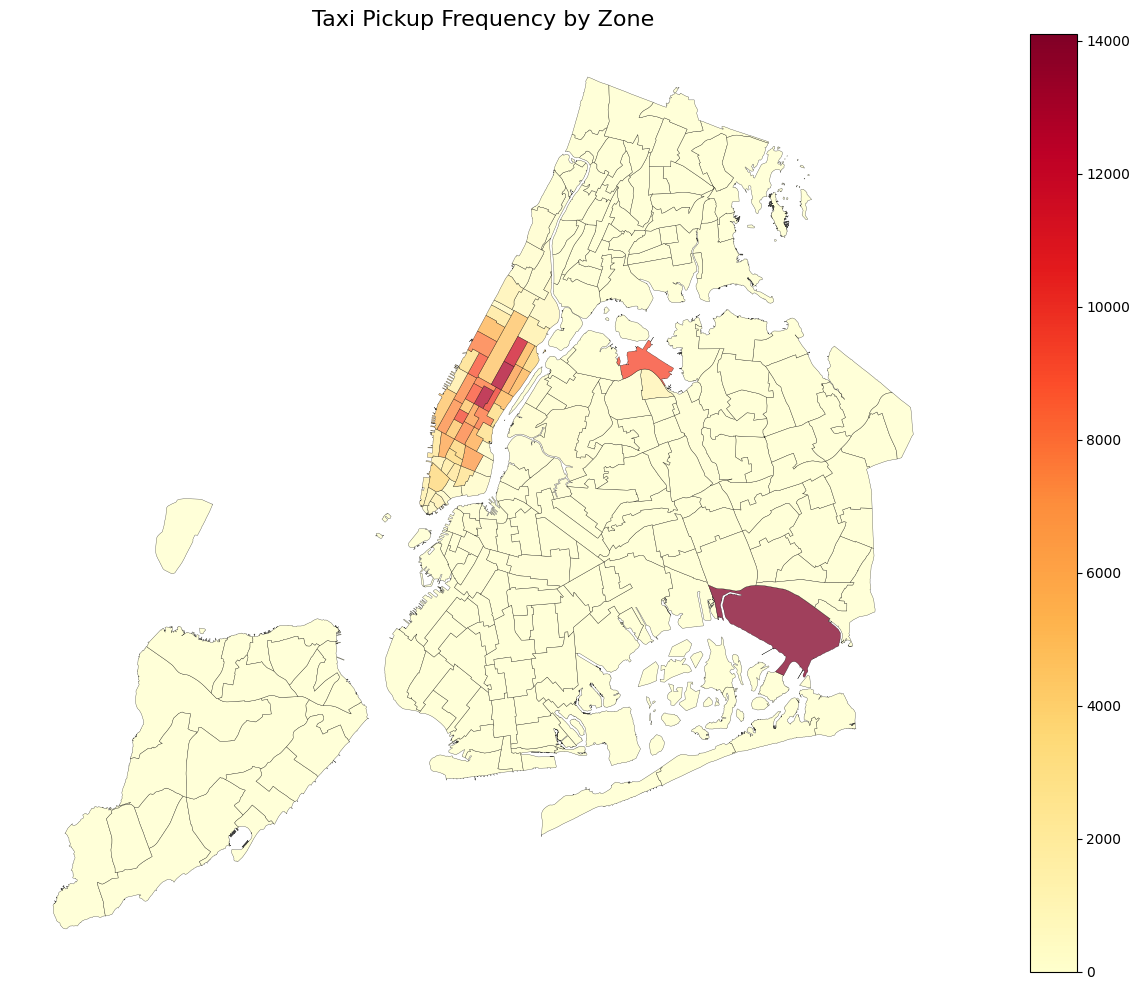

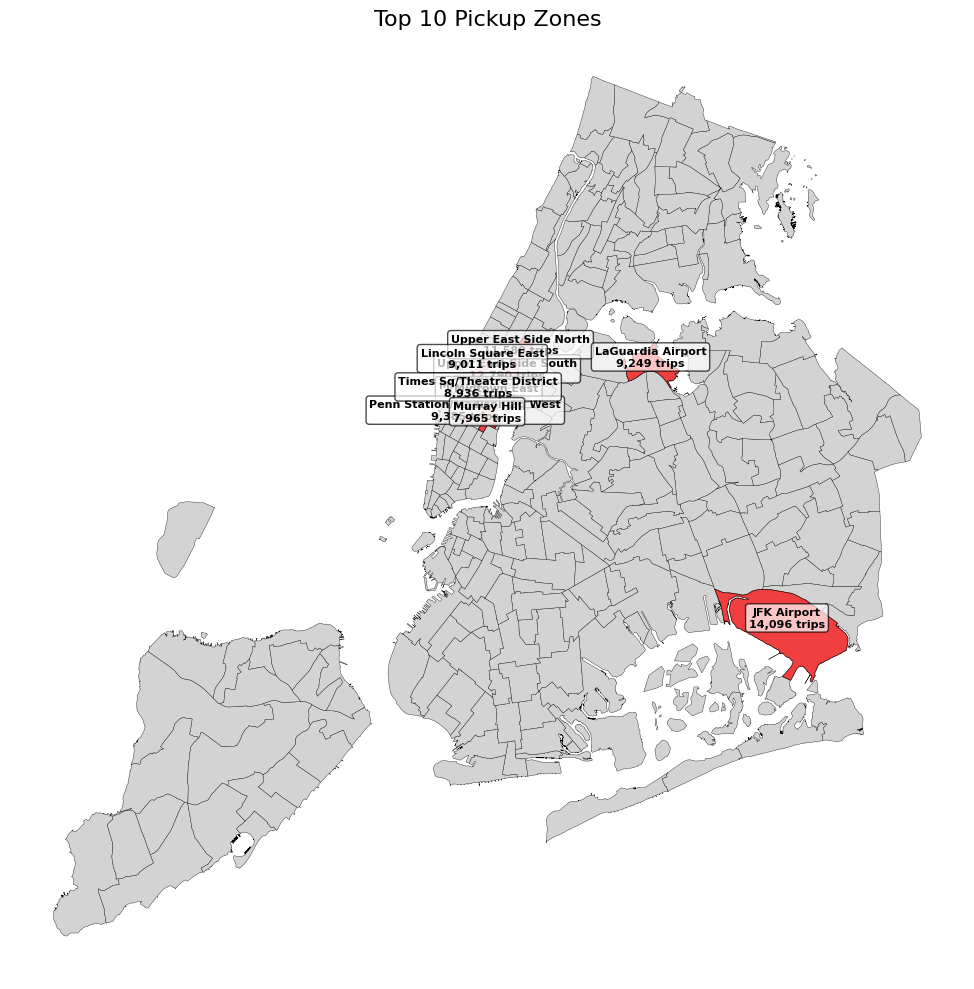


Top 10 Pickup Zones:
- JFK Airport (Queens): 14,096 trips (5.13%)
- Upper East Side South (Manhattan): 12,790 trips (4.65%)
- Midtown Center (Manhattan): 12,765 trips (4.64%)
- Upper East Side North (Manhattan): 11,580 trips (4.21%)
- Midtown East (Manhattan): 9,776 trips (3.56%)
- Penn Station/Madison Sq West (Manhattan): 9,385 trips (3.41%)
- LaGuardia Airport (Queens): 9,249 trips (3.36%)
- Lincoln Square East (Manhattan): 9,011 trips (3.28%)
- Times Sq/Theatre District (Manhattan): 8,936 trips (3.25%)
- Murray Hill (Manhattan): 7,965 trips (2.90%)


In [ ]:
# Merge trip counts back to the zones GeoDataFrame

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# First, group trips by location ID and get counts
if 'PULocationID' in df.columns:
    # Calculate trip counts for each location
    location_trips = df['PULocationID'].value_counts().reset_index()
    location_trips.columns = ['LocationID', 'trip_count']

    # Add percentage of total trips
    total_trips = len(df)
    location_trips['percentage'] = (location_trips['trip_count'] / total_trips * 100).round(2)

    print(f"Generated trip counts for {len(location_trips)} unique pickup locations")

    # Make sure LocationID is the correct data type for joining
    if not pd.api.types.is_numeric_dtype(location_trips['LocationID']):
        location_trips['LocationID'] = pd.to_numeric(location_trips['LocationID'], errors='coerce')

    # Ensure zones LocationID is also numeric
    if 'LocationID' in zones.columns:
        if not pd.api.types.is_numeric_dtype(zones['LocationID']):
            zones['LocationID'] = pd.to_numeric(zones['LocationID'], errors='coerce')

        # Merge trip counts with zones
        zones_with_trips = zones.merge(location_trips, on='LocationID', how='left')

        # Fill NaN values with 0 for zones with no trips
        zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)
        zones_with_trips['percentage'] = zones_with_trips['percentage'].fillna(0)

        print(f"Successfully merged trip counts with zones")
        print(f"Number of zones with trips: {len(zones_with_trips[zones_with_trips['trip_count'] > 0])}")
        print(f"Number of zones with no trips: {len(zones_with_trips[zones_with_trips['trip_count'] == 0])}")

        # Create a choropleth map
        fig, ax = plt.subplots(1, 1, figsize=(15, 10))

        # Create a custom color map for better visualization
        # Define number of classes
        n_classes = 5

        # Create a quantile-based classification
        # This is a simpler approach that doesn't require mapclassify
        zones_with_trips['quantile'] = pd.qcut(
            zones_with_trips['trip_count'].rank(method='first'),  # Rank to handle ties
            n_classes,
            labels=False
        )

        # Plot with custom colormap
        zones_with_trips.plot(
            column='trip_count',
            cmap='YlOrRd',
            ax=ax,
            edgecolor='black',
            linewidth=0.25,
            alpha=0.75,
            legend=True
        )

        # Add title and labels
        plt.title('Taxi Pickup Frequency by Zone', fontsize=16)

        # Remove axes for cleaner map
        ax.set_axis_off()

        plt.tight_layout()
        plt.show()

        # Identify and label top pickup zones if zone name information is available
        zone_name_col = None
        for col in ['zone', 'Zone', 'name', 'NAME', 'ZONE']:
            if col in zones_with_trips.columns:
                zone_name_col = col
                break

        borough_col = None
        for col in ['borough', 'Borough', 'BOROUGH']:
            if col in zones_with_trips.columns:
                borough_col = col
                break

        if zone_name_col:
            # Create a new figure for the top zones
            fig, ax = plt.subplots(1, 1, figsize=(15, 10))

            # Plot all zones as base
            zones_with_trips.plot(
                color='lightgrey',
                edgecolor='black',
                linewidth=0.25,
                ax=ax
            )

            # Highlight top 10 zones
            top_10_zones = zones_with_trips.nlargest(10, 'trip_count')
            top_10_zones.plot(
                color='red',
                edgecolor='black',
                linewidth=0.5,
                ax=ax,
                alpha=0.7
            )

            # Label the top zones
            for idx, row in top_10_zones.iterrows():
                # Get centroid coordinates
                centroid = row.geometry.centroid
                # Add text label
                zone_name = row[zone_name_col]
                borough = row[borough_col] if borough_col else ""
                trips = int(row['trip_count'])

                # Format label
                label = f"{zone_name}\n{trips:,} trips"

                # Add text with white outline for visibility
                ax.annotate(
                    label,
                    xy=(centroid.x, centroid.y),
                    ha='center',
                    fontsize=8,
                    fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7)
                )

            plt.title('Top 10 Pickup Zones', fontsize=16)
            ax.set_axis_off()
            plt.tight_layout()
            plt.show()

            # Print top zones
            print("\nTop 10 Pickup Zones:")
            for idx, row in top_10_zones.iterrows():
                zone_name = row[zone_name_col]
                borough = row[borough_col] if borough_col else "N/A"
                print(f"- {zone_name} ({borough}): {int(row['trip_count']):,} trips ({row['percentage']:.2f}%)")
        else:
            # If zone names aren't available, just print the location IDs
            top_10_zones = zones_with_trips.nlargest(10, 'trip_count')
            print("\nTop 10 Pickup Zones by ID:")
            for idx, row in top_10_zones.iterrows():
                print(f"- Location ID {row['LocationID']}: {int(row['trip_count']):,} trips ({row['percentage']:.2f}%)")
    else:
        print("Error: LocationID column not found in zones GeoDataFrame")
        print("Available columns in zones:", zones.columns.tolist())
        print("Please ensure your zones GeoDataFrame has a LocationID column that matches PULocationID")
else:
    print("Error: PULocationID column not found in the trip DataFrame")


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

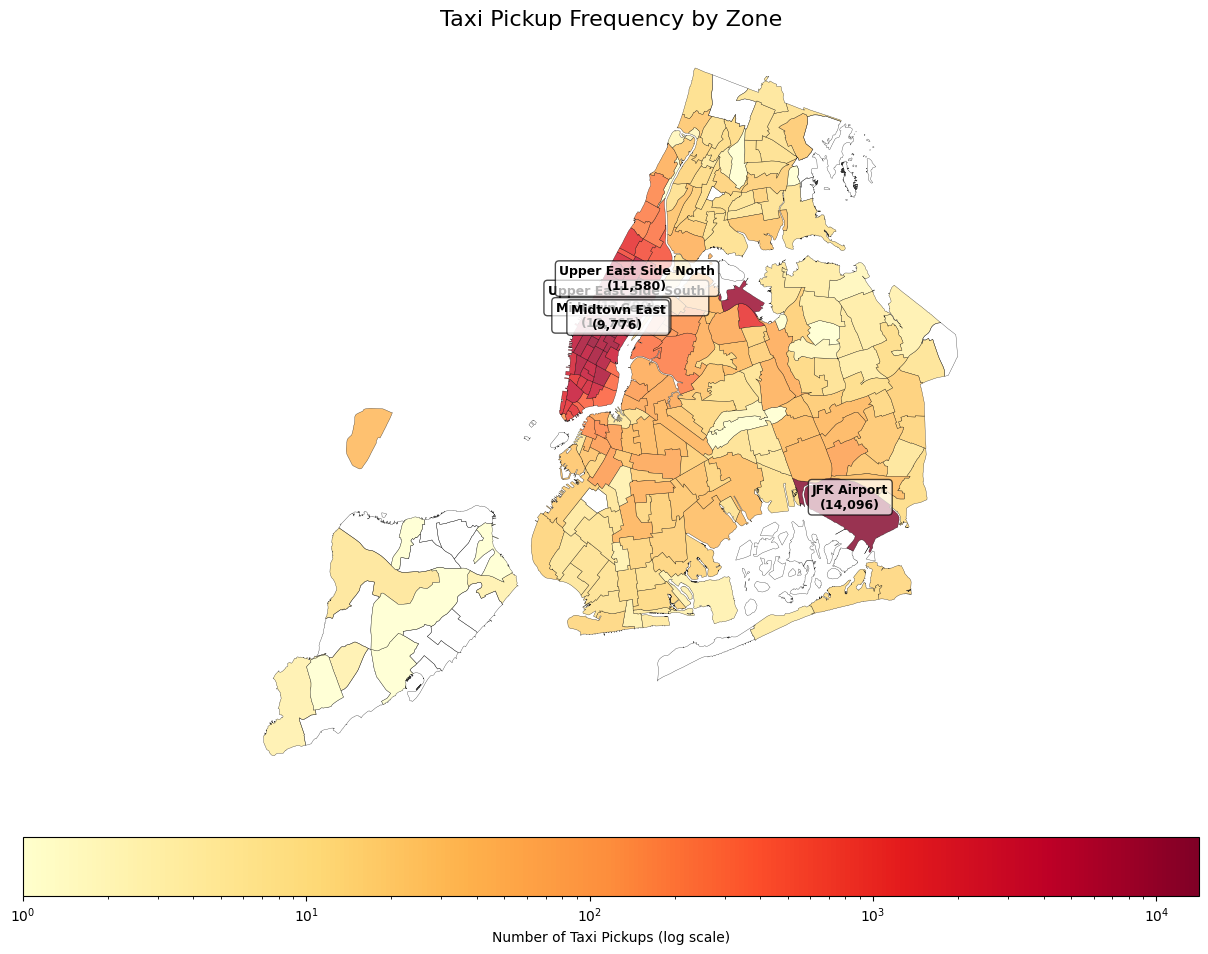

In [ ]:
# Define figure and axis


# Plot the map and display it

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a custom colormap for better visualization
# Using a sequential colormap that goes from light to dark
cmap = plt.cm.YlOrRd

# Create a normalization based on the data
# Using a log normalization to better show the range of values
# Adding a small value to avoid log(0)
min_trips = 1  # Minimum value for the colorbar (avoid log(0))
max_trips = zones_with_trips['trip_count'].max()
norm = colors.LogNorm(vmin=min_trips, vmax=max_trips)

# Plot the zones with trip counts
zones_with_trips.plot(
    column='trip_count',
    cmap=cmap,
    norm=norm,
    edgecolor='black',
    linewidth=0.25,
    alpha=0.8,
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Taxi Pickups (log scale)",
        'orientation': "horizontal",
        'shrink': 0.8,
        'pad': 0.05
    }
)

# Add title
plt.title('Taxi Pickup Frequency by Zone', fontsize=16)

# Remove grid lines and axes for a cleaner map
ax.set_axis_off()

# Identify and label top pickup zones
top_5_zones = zones_with_trips.nlargest(5, 'trip_count')

# Label the top 5 zones
for idx, row in top_5_zones.iterrows():
    # Get centroid coordinates
    centroid = row.geometry.centroid

    # Get zone name if available
    zone_name = None
    for col in ['zone', 'Zone', 'name', 'NAME']:
        if col in row and pd.notna(row[col]):
            zone_name = row[col]
            break

    # Use ID if name not available
    if not zone_name:
        zone_name = f"Zone {row['LocationID']}"

    # Format label with number of trips
    label = f"{zone_name}\n({int(row['trip_count']):,})"

    # Add text with white outline for visibility
    ax.annotate(
        label,
        xy=(centroid.x, centroid.y),
        ha='center',
        fontsize=9,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7)
    )

plt.tight_layout()
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

# Make sure we have the zones_with_trips DataFrame
if 'zones_with_trips' in locals() or 'zones_with_trips' in globals():
    # Sort the DataFrame by trip_count in descending order
    sorted_zones = zones_with_trips.sort_values('trip_count', ascending=False).reset_index(drop=True)

    # Identify the columns to display
    display_cols = ['LocationID', 'trip_count', 'percentage']

    # Check for zone name and borough columns using common naming patterns
    for col in ['zone', 'Zone', 'name', 'NAME', 'ZONE']:
        if col in sorted_zones.columns:
            display_cols.insert(1, col)  # Insert after LocationID
            break

    for col in ['borough', 'Borough', 'BOROUGH']:
        if col in sorted_zones.columns:
            display_cols.insert(2 if len(display_cols) > 2 else 2, col)  # Insert after zone name or LocationID
            break

    # Select only the display columns and exclude geometry
    sorted_zones_display = sorted_zones[display_cols].copy()

    # Format the trip_count and percentage columns
    sorted_zones_display['trip_count'] = sorted_zones_display['trip_count'].astype(int).map('{:,}'.format)
    sorted_zones_display['percentage'] = sorted_zones_display['percentage'].map('{:.2f}%'.format)

    # Print total number of zones
    print(f"Displaying all {len(sorted_zones_display)} zones sorted by number of trips")

    # Show the sorted DataFrame
    print(sorted_zones_display)

    # Calculate some statistics
    total_zones = len(sorted_zones)
    zones_with_trips = (sorted_zones['trip_count'] > 0).sum()
    zones_no_trips = total_zones - zones_with_trips

    print(f"\nSummary:")
    print(f"Total zones: {total_zones}")
    print(f"Zones with trips: {zones_with_trips} ({zones_with_trips/total_zones*100:.1f}%)")
    print(f"Zones with no trips: {zones_no_trips} ({zones_no_trips/total_zones*100:.1f}%)")

    # Calculate trip concentration
    zones_50_pct = len(sorted_zones.loc[sorted_zones['percentage'].cumsum() <= 50])
    zones_80_pct = len(sorted_zones.loc[sorted_zones['percentage'].cumsum() <= 80])

    print(f"\nConcentration:")
    print(f"Top {zones_50_pct} zones account for 50% of all trips")
    print(f"Top {zones_80_pct} zones account for 80% of all trips")
else:
    print("Error: zones_with_trips DataFrame not found. Please run the code to merge trip counts with zones first.")

Displaying all 263 zones sorted by number of trips
     LocationID                               zone        borough trip_count  \
0           132                        JFK Airport         Queens     14,096   
1           237              Upper East Side South      Manhattan     12,790   
2           161                     Midtown Center      Manhattan     12,765   
3           236              Upper East Side North      Manhattan     11,580   
4           162                       Midtown East      Manhattan      9,776   
..          ...                                ...            ...        ...   
258         206          Saint George/New Brighton  Staten Island          0   
259         214           South Beach/Dongan Hills  Staten Island          0   
260          30                      Broad Channel         Queens          0   
261           8                       Astoria Park         Queens          0   
262          84  Eltingville/Annadale/Prince's Bay  Staten Island    

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.